# <font color='green'>Import modules</font>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

%matplotlib inline

In [2]:
# Configure Pandas to show all columns
pd.set_option("display.max.columns", None)

# <font color='green'>Read Train and Test datasets</font>

In [3]:
# read train and test datasets
# renamed columns to lowercase, replace spaces with underscores
train_set = pd.read_csv("../datasets/Input Data/train.csv")
train_set.columns = [x.lower().replace(' ','_') for x in train_set.columns]

test_set = pd.read_csv("../datasets/Input Data/test.csv")
test_set.columns = [x.lower().replace(' ','_') for x in test_set.columns]

In [4]:
# inspect rows and columns count
print(train_set.shape)
print(test_set.shape)

(2051, 81)
(879, 80)


In [5]:
# check dtypes and nulls in train set
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            140 non-null    object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

In [6]:
# check dtypes and nulls in test set
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               879 non-null    int64  
 1   pid              879 non-null    int64  
 2   ms_subclass      879 non-null    int64  
 3   ms_zoning        879 non-null    object 
 4   lot_frontage     719 non-null    float64
 5   lot_area         879 non-null    int64  
 6   street           879 non-null    object 
 7   alley            58 non-null     object 
 8   lot_shape        879 non-null    object 
 9   land_contour     879 non-null    object 
 10  utilities        879 non-null    object 
 11  lot_config       879 non-null    object 
 12  land_slope       879 non-null    object 
 13  neighborhood     879 non-null    object 
 14  condition_1      879 non-null    object 
 15  condition_2      879 non-null    object 
 16  bldg_type        879 non-null    object 
 17  house_style     

In [7]:
train_set.head()

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  lot_shape land_contour utilities lot_config land_slope neighborhood  \
0       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3       Reg          Lvl    AllPub     Inside        Gtl       Timber   
4       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   

  condition_1 condition_2 bldg_type house_style  overall_qual  overall_cond  \
0        RRAe        Norm      1Fam      2Story             6             8   
1        Norm        Norm      1Fam      2Story             7             5   
2        Norm        Norm      1Fam      1Story             5             7   
3        Norm        Norm      1Fam      2Story             5             5   
4        Norm        Norm      1Fam      1.5Fin             6             8   

   year_built  year_remod/add roof_style roof_matl exterior_1st exterior_2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   
1        1996            1997      Gable   CompShg      VinylSd      VinylSd   
2        1953            2007      Gable   CompShg      VinylSd      VinylSd   
3        2006            2007      Gable   CompShg      VinylSd      VinylSd   
4        1900            1993      Gable   CompShg      Wd Sdng      Plywood   

  mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation bsmt_qual  \
0      BrkFace         289.0         Gd         TA     CBlock        TA   
1      BrkFace         132.0         Gd         TA      PConc        Gd   
2         None           0.0         TA         Gd     CBlock        TA   
3         None           0.0         TA         TA      PConc        Gd   
4         None           0.0         TA         TA      PConc        Fa   

  bsmt_cond bsmt_exposure bsmtfin_type_1  bsmtfin_sf_1 bsmtfin_type_2  \
0        TA            No            GLQ         533.0            Unf   
1        TA            No            GLQ         637.0            Unf   
2        TA            No            GLQ         731.0            Unf   
3        TA            No            Unf           0.0            Unf   
4        Gd            No            Unf           0.0            Unf   

   bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf heating heating_qc central_air  \
0           0.0        192.0          725.0    GasA         Ex           Y   
1           0.0        276.0          913.0    GasA         Ex           Y   
2           0.0        326.0         1057.0    GasA         TA           Y   
3           0.0        384.0          384.0    GasA         Gd           Y   
4           0.0        676.0          676.0    GasA         TA           Y   

  electrical  1st_flr_sf  2nd_flr_sf  low_qual_fin_sf  gr_liv_area  \
0      SBrkr         725         754                0         1479   
1      SBrkr         913        1209                0         2122   
2      SBrkr        1057           0                0         1057   
3      SBrkr         744         700                0         1444   
4      SBrkr         831         614                0         1445   

   bsmt_full_bath  bsmt_half_bath  full_bath  half_bath  bedroom_abvgr  \
0             0.0             0.0          2          1              3   
1             1.0             0.0          2          1              4   
2             1.0             0.0          1          0              3   
3             0.0             0.0          2  

In [8]:
test_set.head()

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL           NaN      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   
3  1989  902207150           30        RM          60.0      8520   Pave   
4   625  535105100           20        RL           NaN      9500   Pave   

  alley lot_shape land_contour utilities lot_config land_slope neighborhood  \
0  Grvl       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
1   NaN       IR1          Lvl    AllPub     Inside        Gtl       Sawyer   
2   NaN       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   
3   NaN       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
4   NaN       IR1          Lvl    AllPub     Inside        Gtl        NAmes   

  condition_1 condition_2 bldg_type house_style  overall_qual  overall_cond  \
0        Norm        Norm    2fmCon      2Story             6             8   
1        Norm        Norm    Duplex      1Story             5             4   
2        Norm        Norm      1Fam      2Story             7             5   
3        Norm        Norm      1Fam      1Story             5             6   
4        Norm        Norm      1Fam      1Story             6             5   

   year_built  year_remod/add roof_style roof_matl exterior_1st exterior_2nd  \
0        1910            1950      Gable   CompShg      AsbShng      AsbShng   
1        1977            1977      Gable   CompShg      Plywood      Plywood   
2        2006            2006      Gable   CompShg      VinylSd      VinylSd   
3        1923            2006      Gable   CompShg      Wd Sdng      Wd Sdng   
4        1963            1963      Gable   CompShg      Plywood      Plywood   

  mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation bsmt_qual  \
0         None           0.0         TA         Fa      Stone        Fa   
1         None           0.0         TA         TA     CBlock        Gd   
2         None           0.0         Gd         TA      PConc        Gd   
3         None           0.0         Gd         TA     CBlock        TA   
4      BrkFace         247.0         TA         TA     CBlock        Gd   

  bsmt_cond bsmt_exposure bsmtfin_type_1  bsmtfin_sf_1 bsmtfin_type_2  \
0        TA            No            Unf             0            Unf   
1        TA            No            Unf             0            Unf   
2        Gd            Av            GLQ           554            Unf   
3        TA            No            Unf             0            Unf   
4        TA            No            BLQ           609            Unf   

   bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf heating heating_qc central_air  \
0             0         1020           1020    GasA         Gd           N   
1             0         1967           1967    GasA         TA           Y   
2             0          100            654    GasA         Ex           Y   
3             0          968            968    GasA         TA           Y   
4             0          785           1394    GasA         Gd           Y   

  electrical  1st_flr_sf  2nd_flr_sf  low_qual_fin_sf  gr_liv_area  \
0      FuseP         908        1020                0         1928   
1      SBrkr        1967           0                0         1967   
2      SBrkr         664         832                0         1496   
3      SBrkr         968           0                0          968   
4      SBrkr        1394           0                0         1394   

   bsmt_full_bath  bsmt_half_bath  full_bath  half_bath  bedroom_abvgr  \
0               0               0          2          0              4   
1               0               0          2          0              6   
2               1               0          2          1              3   
3               0               0        

# <font color='green'>Review all train/test sets columns nulls/distribution/relationship with Sales price</font>

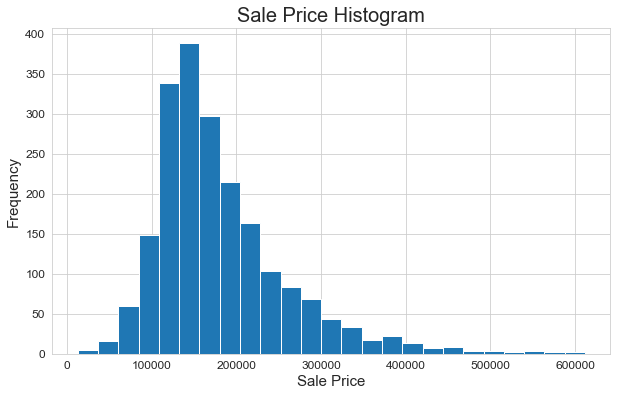

In [9]:
# Train_set saleprices

plt.figure(figsize=(10,6))

plt.hist(train_set['saleprice'], bins=25);

plt.xticks(fontsize=12);
plt.yticks(fontsize=12);
plt.xlabel("Sale Price", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.title("Sale Price Histogram", fontsize=20);
# plt.legend(["Others", "Real"], fontsize=10)

<font color='green'>Almost normally distributed with some very high price right skew</font>

In [10]:
train_set['saleprice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: saleprice, dtype: float64

In [11]:
# function for plotting train/test sets variable histograms and 
# train set scatter plot against saleprice
def var_hist_scatter(var_col):

    plt.figure(figsize=(10,6))

    plt.hist(train_set[var_col], bins=20, label="train_set", alpha=0.5)
    plt.hist(test_set[var_col], bins=20, label="test_set", alpha=0.5);

    plt.xticks(fontsize=12);
    plt.yticks(fontsize=12);
    plt.xlabel(var_col, fontsize=15)
    plt.ylabel("Frequency", fontsize=15)
    plt.title(var_col+" Histogram", fontsize=20)
    plt.legend(fontsize=15)

    plt.figure(figsize=(10,6))

    plt.scatter(train_set[var_col], train_set['saleprice'], s=5)

    plt.xticks(fontsize=12);
    plt.yticks(fontsize=12);
    plt.xlabel(var_col, fontsize=15)
    plt.ylabel("Sale Price", fontsize=15)
    plt.title("Sales Price Scatter Chart", fontsize=20);

In [12]:
# function for plotting train set boxplot against saleprice
def var_boxplot(var_col):
    train_set.boxplot(column=["saleprice"], by=[var_col], figsize = (10,6), rot=90)

    plt.xticks(fontsize=12);
    plt.yticks(fontsize=12);
    plt.xlabel(var_col+" Values", fontsize=15)
    plt.ylabel("Sale Price", fontsize=15);

## <font color='red'>Although all 81 variables were reviewed, not every variables' plots will be presented in this workbook. A summary table of cleaning history is available [here](#Summary-of-data-handling)</font>

# <font color='green'>Null Cleaning</font> 

## <font color='green'>id: Random property identification</font>
## <font color='green'>pid: Parcel identification number for property search.</font>

#### <font color='green'>No corr to price. Exclude from modelling.</font> 

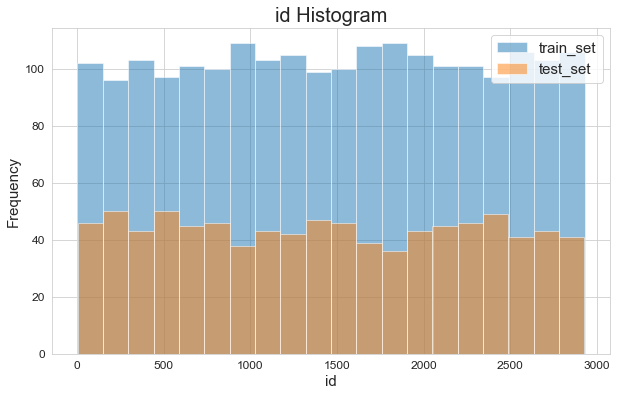

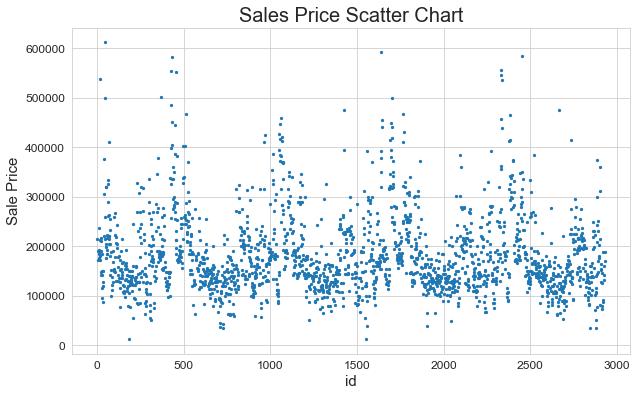

In [13]:
var_hist_scatter("id")

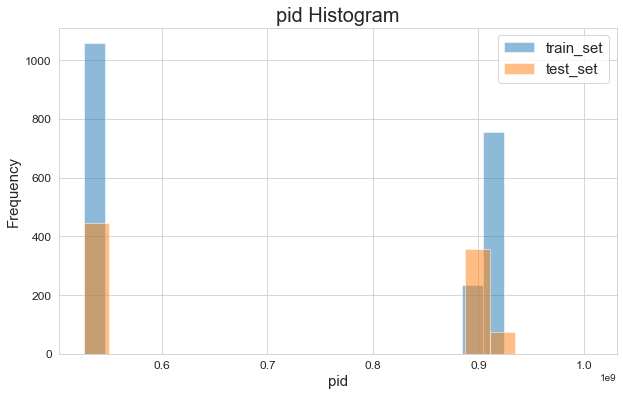

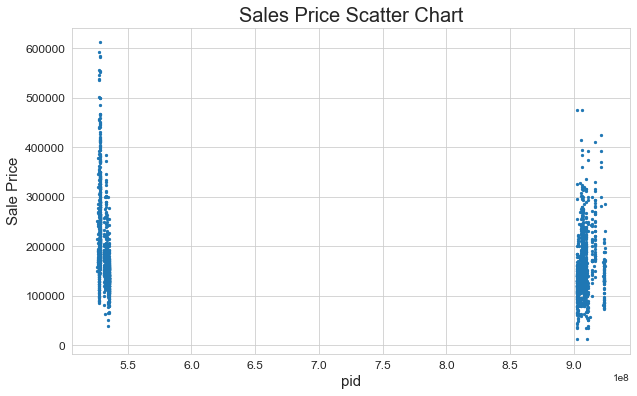

In [14]:
var_hist_scatter("pid")

## <font color='green'>lot_frontage: Linear feet of street connected to property</font>

#### <font color='green'>Both Train and Test sets have up to 20% null values. At the time of EDA, there was insufficient domain knowledge to do null values imputation. Therefore it is best to exclude this variable from the model</font>

/Users/chuahb/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/chuahb/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


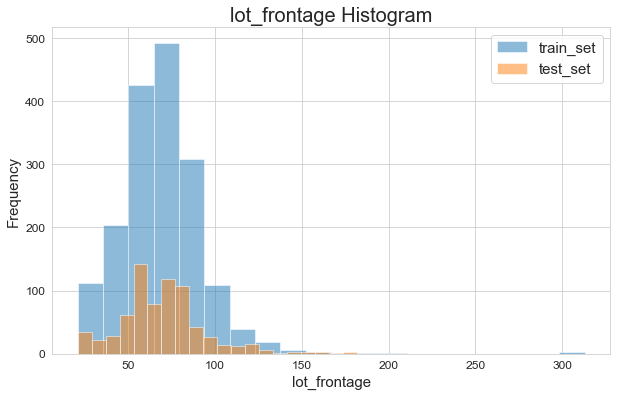

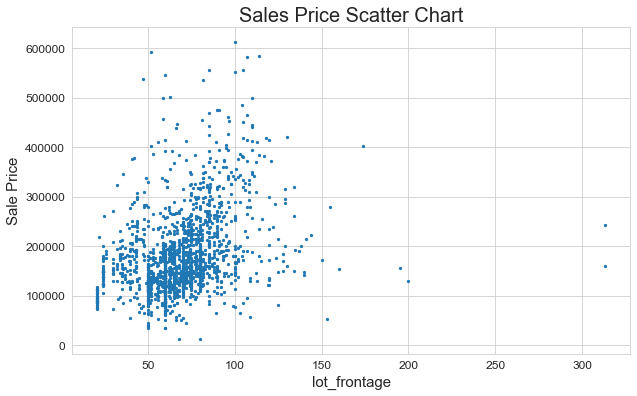

In [15]:
var_hist_scatter("lot_frontage")

In [16]:
train_set['lot_frontage'].describe()

count    1721.000000
mean       69.055200
std        23.260653
min        21.000000
25%        58.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: lot_frontage, dtype: float64

In [17]:
test_set['lot_frontage'].describe()

count    719.000000
mean      69.630042
std       23.625372
min       21.000000
25%       59.000000
50%       68.000000
75%       80.000000
max      182.000000
Name: lot_frontage, dtype: float64

In [18]:
train_set['lot_frontage'].isnull().value_counts()

False    1721
True      330
Name: lot_frontage, dtype: int64

In [19]:
test_set['lot_frontage'].isnull().value_counts()

False    719
True     160
Name: lot_frontage, dtype: int64

In [20]:
# drop lot_frontage
train_set.drop(['lot_frontage'], axis=1, inplace=True)
test_set.drop(['lot_frontage'], axis=1, inplace=True)

## <font color='green'>alley: Type of alley access to property</font>

#### <font color='green'>Both Train and Test sets have up to 93% null values. At the time of EDA, there was insufficient domain knowledge to do null values imputation. Therefore it is best to exclude this variable from the model</font>

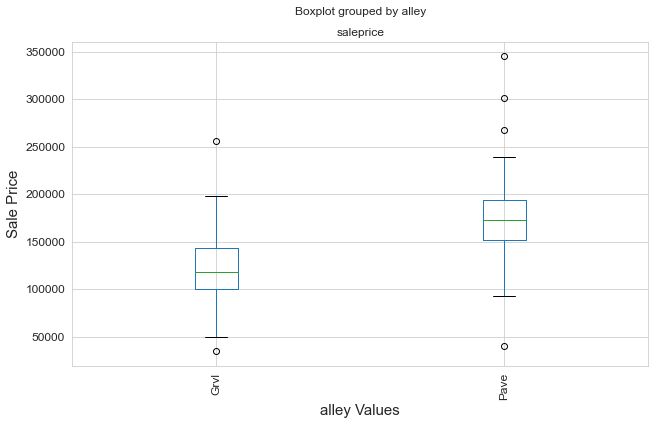

In [21]:
var_boxplot("alley")

In [22]:
train_set['alley'].unique()

array([nan, 'Pave', 'Grvl'], dtype=object)

In [23]:
test_set['alley'].unique()

array(['Grvl', nan, 'Pave'], dtype=object)

In [24]:
train_set['alley'].value_counts()

Grvl    85
Pave    55
Name: alley, dtype: int64

In [25]:
test_set['alley'].value_counts()

Grvl    35
Pave    23
Name: alley, dtype: int64

In [26]:
train_set['alley'].isnull().value_counts()

True     1911
False     140
Name: alley, dtype: int64

In [27]:
test_set['alley'].isnull().value_counts()

True     821
False     58
Name: alley, dtype: int64

In [28]:
# drop lot_frontage
train_set.drop(['alley'], axis=1, inplace=True)
test_set.drop(['alley'], axis=1, inplace=True)

## <font color='green'>mas_vnr_type: Masonry veneer type</font>

#### <font color='green'>Train set has 1% null, 59% None / Test set has 0.1% null, 60% None.</font>
#### <font color='green'>Replace null with None</font>

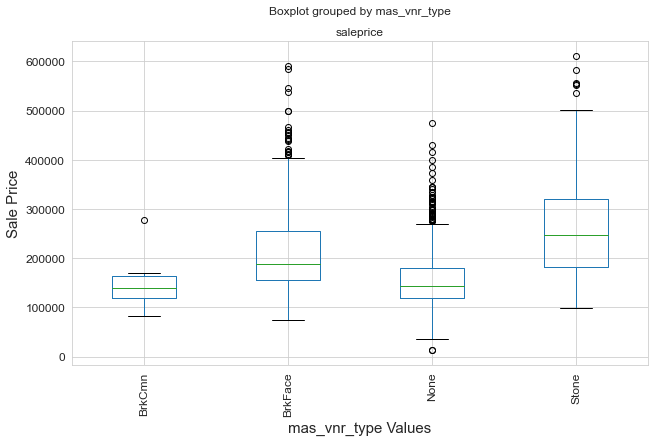

In [29]:
var_boxplot("mas_vnr_type")

In [30]:
train_set['mas_vnr_type'].unique()

array(['BrkFace', 'None', nan, 'Stone', 'BrkCmn'], dtype=object)

In [31]:
test_set['mas_vnr_type'].unique()

array(['None', 'BrkFace', 'Stone', 'BrkCmn', 'CBlock', nan], dtype=object)

In [32]:
train_set['mas_vnr_type'].value_counts()

None       1218
BrkFace     630
Stone       168
BrkCmn       13
Name: mas_vnr_type, dtype: int64

In [33]:
test_set['mas_vnr_type'].value_counts()

None       534
BrkFace    250
Stone       81
BrkCmn      12
CBlock       1
Name: mas_vnr_type, dtype: int64

In [34]:
train_set['mas_vnr_type'].isnull().value_counts()

False    2029
True       22
Name: mas_vnr_type, dtype: int64

In [35]:
test_set['mas_vnr_type'].isnull().value_counts()

False    878
True       1
Name: mas_vnr_type, dtype: int64

In [36]:
train_set[train_set["mas_vnr_type"].isnull()]

id        pid  ms_subclass ms_zoning  lot_area street lot_shape  \
22    2393  528142010           60        RL     12867   Pave       IR1   
41    2383  528110050           20        RL     13891   Pave       Reg   
86     539  531371050           20        RL     10083   Pave       Reg   
212    518  528458020           20        FV      7993   Pave       IR1   
276   2824  908130020           20        RL      8050   Pave       Reg   
338   1800  528458150           60        FV     12217   Pave       IR1   
431   1455  907251090           60        RL      9473   Pave       Reg   
451   1120  528439010           20        RL     10037   Pave       Reg   
591   1841  533208040          120        FV      4274   Pave       IR1   
844   1840  533208030          120        FV      5330   Pave       IR2   
913   2230  909475070           20        RL     32668   Pave       IR1   
939   1123  528462040           20        FV     11639   Pave       Reg   
1025  1784  528435010           20        RL      9965   Pave       Reg   
1244   485  528275160           60        RL     12891   Pave       IR1   
1306  1752  528250010           80        RL     11950   Pave       IR1   
1430  1185  534104100           60        FV      7500   Pave       Reg   
1434  1128  528480160           60        FV      8125   Pave       Reg   
1606  1096  528290090           60        RL      7750   Pave       Reg   
1699  2261  916384070           20        RL      8298   Pave       IR1   
1815  2456  528429100           20        RL     15218   Pave       IR1   
1820  1728  528218010           60        RL     15810   Pave       IR1   
1941    56  528240070           60        RL      7851   Pave       Reg   

     land_contour utilities lot_config land_slope neighborhood condition_1  \
22            Lvl    AllPub     Corner        Gtl      NridgHt        Norm   
41            Lvl    AllPub     Inside        Gtl      NridgHt        Norm   
86            Lvl    AllPub     Inside        Gtl      SawyerW        Norm   
212           Lvl    AllPub     Inside        Gtl      Somerst        Norm   
276           Lvl    AllPub     Inside        Gtl      Edwards        Norm   
338           Lvl    AllPub     Inside        Gtl      Somerst        Norm   
431           Lvl    AllPub     Inside        Gtl      CollgCr        Norm   
451           Lvl    AllPub     Corner        Gtl      Somerst       Feedr   
591           Lvl    AllPub     Inside        Gtl      Somerst        Norm   
844           Lvl    AllPub     Inside        Gtl      Somerst        Norm   
913           Lvl    AllPub    CulDSac        Gtl      Crawfor        Norm   
939           Lvl    AllPub     Corner        Gtl      Somerst        Norm   
1025          Lvl    AllPub        FR2        Gtl      Somerst       Feedr   
1244          Lvl    AllPub     Corner        Gtl      Gilbert        Norm   
1306          Lvl    AllPub     Corner        Gtl      Gilbert        Norm   
1430          Lvl    AllPub     Inside        Gtl      Somerst        Norm   
1434          Lvl    AllPub     Inside        Gtl      Somerst        Norm   
1606          Lvl    AllPub     Inside        Gtl      Gilbert        RRAn   
1699          HLS    AllPub     Inside        Gtl       Timber        Norm   
1815          Lvl    AllPub    CulDSac        Gtl      Somerst        RRAn   
1820          Lvl    AllPub     Inside        Gtl      Gilbert        RRAn   
1941          Lvl    AllPub     Inside        Gtl      Gilbert        Norm   

     condition_2 bldg_type house_style  overall_qual  overall_cond  \
22          Norm      1Fam      2Story             8             5   
41          Norm      1Fam      1Story            10             5   
86          Norm      1Fam      1Story             7             5   
212         Norm      1Fam      1Story             7             5   
276         Norm      1Fam      1Story             6             5   
338         Norm      1Fam      2Story             8             5 

In [37]:
test_set[test_set["mas_vnr_type"].isnull()]

id        pid  ms_subclass ms_zoning  lot_area street lot_shape  \
866  868  907260030           60        RL      8749   Pave       Reg   

    land_contour utilities lot_config land_slope neighborhood condition_1  \
866          Lvl    AllPub     Inside        Gtl      CollgCr        Norm   

    condition_2 bldg_type house_style  overall_qual  overall_cond  year_built  \
866        Norm      1Fam      2Story             7             5        2002   

     year_remod/add roof_style roof_matl exterior_1st exterior_2nd  \
866            2002      Gable   CompShg      VinylSd      VinylSd   

    mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation bsmt_qual  \
866          NaN           NaN         Gd         TA      PConc        Gd   

    bsmt_cond bsmt_exposure bsmtfin_type_1  bsmtfin_sf_1 bsmtfin_type_2  \
866        TA            No            Unf             0            Unf   

     bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf heating heating_qc central_air  \
866             0          840            840    GasA         Ex           Y   

    electrical  1st_flr_sf  2nd_flr_sf  low_qual_fin_sf  gr_liv_area  \
866      SBrkr         840         885                0         1725   

     bsmt_full_bath  bsmt_half_bath  full_bath  half_bath  bedroom_abvgr  \
866               0               0          2          1              3   

     kitchen_abvgr kitchen_qual  totrms_abvgrd functional  fireplaces  \
866              1           Gd              6        Typ           0   

    fireplace_qu garage_type  garage_yr_blt garage_finish  garage_cars  \
866          NaN      Attchd         2002.0           RFn            2   

     garage_area garage_qual garage_cond paved_drive  wood_deck_sf  \
866          550          TA          TA           Y             0   

     open_porch_sf  enclosed_porch  3ssn_porch  screen_porch  pool_area  \
866             48               0           0             0          0   

    pool_qc fence misc_feature  misc_val  mo_sold  yr_sold sale_type  
866     NaN   NaN          NaN         0       11     2009       WD

In [38]:
# replace nulls to None
train_set['mas_vnr_type'] = train_set['mas_vnr_type'].map(lambda cell: "None" if pd.isnull(cell) else cell)
test_set['mas_vnr_type'] = test_set['mas_vnr_type'].map(lambda cell: "None" if pd.isnull(cell) else cell)

## <font color='green'>mas_vnr_area: Masonry veneer area in square feet</font>

#### <font color='green'>mas_vnr_area: Masonry veneer area in square feet</font>
#### <font color='green'>Train set has 1% null, 59% None / Test set has 0.1% null, 60% None. SAME as mas_vnr_type</font>
#### <font color='green'>Replace null with 0</font>

/Users/chuahb/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/chuahb/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


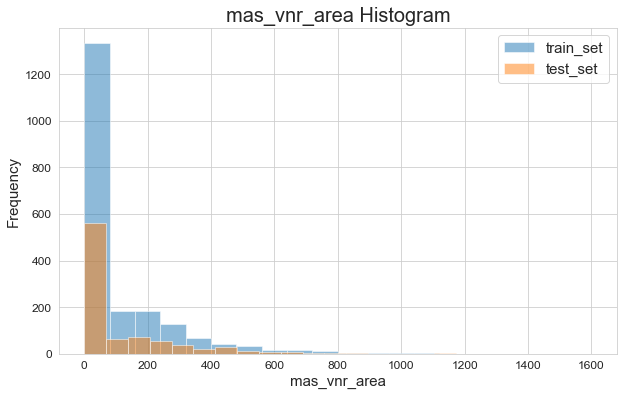

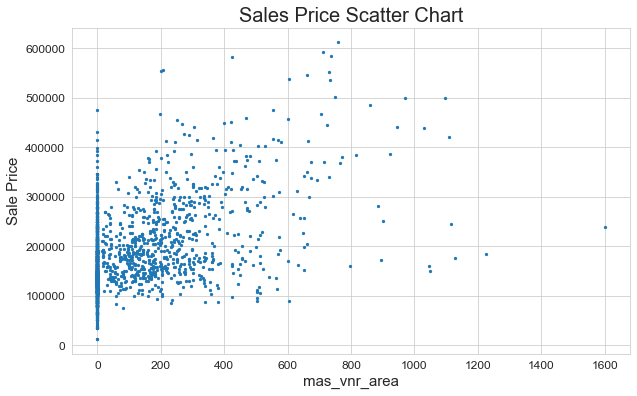

In [39]:
var_hist_scatter("mas_vnr_area")

In [40]:
train_set['mas_vnr_area'].describe()

count    2029.000000
mean       99.695909
std       174.963129
min         0.000000
25%         0.000000
50%         0.000000
75%       161.000000
max      1600.000000
Name: mas_vnr_area, dtype: float64

In [41]:
test_set['mas_vnr_area'].describe()

count     878.000000
mean      106.982916
std       188.356829
min         0.000000
25%         0.000000
50%         0.000000
75%       173.500000
max      1378.000000
Name: mas_vnr_area, dtype: float64

In [42]:
train_set['mas_vnr_area'].value_counts()

0.0      1216
120.0      11
176.0      10
200.0      10
180.0       9
         ... 
57.0        1
572.0       1
65.0        1
567.0       1
161.0       1
Name: mas_vnr_area, Length: 373, dtype: int64

In [43]:
test_set['mas_vnr_area'].value_counts()

0.0      532
216.0      7
80.0       5
196.0      5
420.0      5
        ... 
464.0      1
312.0      1
101.0      1
238.0      1
264.0      1
Name: mas_vnr_area, Length: 233, dtype: int64

In [44]:
train_set['mas_vnr_area'].isnull().value_counts()

False    2029
True       22
Name: mas_vnr_area, dtype: int64

In [45]:
test_set['mas_vnr_area'].isnull().value_counts()

False    878
True       1
Name: mas_vnr_area, dtype: int64

In [46]:
train_set[train_set["mas_vnr_area"].isnull()]

id        pid  ms_subclass ms_zoning  lot_area street lot_shape  \
22    2393  528142010           60        RL     12867   Pave       IR1   
41    2383  528110050           20        RL     13891   Pave       Reg   
86     539  531371050           20        RL     10083   Pave       Reg   
212    518  528458020           20        FV      7993   Pave       IR1   
276   2824  908130020           20        RL      8050   Pave       Reg   
338   1800  528458150           60        FV     12217   Pave       IR1   
431   1455  907251090           60        RL      9473   Pave       Reg   
451   1120  528439010           20        RL     10037   Pave       Reg   
591   1841  533208040          120        FV      4274   Pave       IR1   
844   1840  533208030          120        FV      5330   Pave       IR2   
913   2230  909475070           20        RL     32668   Pave       IR1   
939   1123  528462040           20        FV     11639   Pave       Reg   
1025  1784  528435010           20        RL      9965   Pave       Reg   
1244   485  528275160           60        RL     12891   Pave       IR1   
1306  1752  528250010           80        RL     11950   Pave       IR1   
1430  1185  534104100           60        FV      7500   Pave       Reg   
1434  1128  528480160           60        FV      8125   Pave       Reg   
1606  1096  528290090           60        RL      7750   Pave       Reg   
1699  2261  916384070           20        RL      8298   Pave       IR1   
1815  2456  528429100           20        RL     15218   Pave       IR1   
1820  1728  528218010           60        RL     15810   Pave       IR1   
1941    56  528240070           60        RL      7851   Pave       Reg   

     land_contour utilities lot_config land_slope neighborhood condition_1  \
22            Lvl    AllPub     Corner        Gtl      NridgHt        Norm   
41            Lvl    AllPub     Inside        Gtl      NridgHt        Norm   
86            Lvl    AllPub     Inside        Gtl      SawyerW        Norm   
212           Lvl    AllPub     Inside        Gtl      Somerst        Norm   
276           Lvl    AllPub     Inside        Gtl      Edwards        Norm   
338           Lvl    AllPub     Inside        Gtl      Somerst        Norm   
431           Lvl    AllPub     Inside        Gtl      CollgCr        Norm   
451           Lvl    AllPub     Corner        Gtl      Somerst       Feedr   
591           Lvl    AllPub     Inside        Gtl      Somerst        Norm   
844           Lvl    AllPub     Inside        Gtl      Somerst        Norm   
913           Lvl    AllPub    CulDSac        Gtl      Crawfor        Norm   
939           Lvl    AllPub     Corner        Gtl      Somerst        Norm   
1025          Lvl    AllPub        FR2        Gtl      Somerst       Feedr   
1244          Lvl    AllPub     Corner        Gtl      Gilbert        Norm   
1306          Lvl    AllPub     Corner        Gtl      Gilbert        Norm   
1430          Lvl    AllPub     Inside        Gtl      Somerst        Norm   
1434          Lvl    AllPub     Inside        Gtl      Somerst        Norm   
1606          Lvl    AllPub     Inside        Gtl      Gilbert        RRAn   
1699          HLS    AllPub     Inside        Gtl       Timber        Norm   
1815          Lvl    AllPub    CulDSac        Gtl      Somerst        RRAn   
1820          Lvl    AllPub     Inside        Gtl      Gilbert        RRAn   
1941          Lvl    AllPub     Inside        Gtl      Gilbert        Norm   

     condition_2 bldg_type house_style  overall_qual  overall_cond  \
22          Norm      1Fam      2Story             8             5   
41          Norm      1Fam      1Story            10             5   
86          Norm      1Fam      1Story             7             5   
212         Norm      1Fam      1Story             7             5   
276         Norm      1Fam      1Story             6             5   
338         Norm      1Fam      2Story             8             5 

In [47]:
test_set[test_set["mas_vnr_area"].isnull()]

id        pid  ms_subclass ms_zoning  lot_area street lot_shape  \
866  868  907260030           60        RL      8749   Pave       Reg   

    land_contour utilities lot_config land_slope neighborhood condition_1  \
866          Lvl    AllPub     Inside        Gtl      CollgCr        Norm   

    condition_2 bldg_type house_style  overall_qual  overall_cond  year_built  \
866        Norm      1Fam      2Story             7             5        2002   

     year_remod/add roof_style roof_matl exterior_1st exterior_2nd  \
866            2002      Gable   CompShg      VinylSd      VinylSd   

    mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation bsmt_qual  \
866         None           NaN         Gd         TA      PConc        Gd   

    bsmt_cond bsmt_exposure bsmtfin_type_1  bsmtfin_sf_1 bsmtfin_type_2  \
866        TA            No            Unf             0            Unf   

     bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf heating heating_qc central_air  \
866             0          840            840    GasA         Ex           Y   

    electrical  1st_flr_sf  2nd_flr_sf  low_qual_fin_sf  gr_liv_area  \
866      SBrkr         840         885                0         1725   

     bsmt_full_bath  bsmt_half_bath  full_bath  half_bath  bedroom_abvgr  \
866               0               0          2          1              3   

     kitchen_abvgr kitchen_qual  totrms_abvgrd functional  fireplaces  \
866              1           Gd              6        Typ           0   

    fireplace_qu garage_type  garage_yr_blt garage_finish  garage_cars  \
866          NaN      Attchd         2002.0           RFn            2   

     garage_area garage_qual garage_cond paved_drive  wood_deck_sf  \
866          550          TA          TA           Y             0   

     open_porch_sf  enclosed_porch  3ssn_porch  screen_porch  pool_area  \
866             48               0           0             0          0   

    pool_qc fence misc_feature  misc_val  mo_sold  yr_sold sale_type  
866     NaN   NaN          NaN         0       11     2009       WD

In [48]:
# replace nulls to 0
train_set['mas_vnr_area'] = train_set['mas_vnr_area'].map(lambda cell: 0 if pd.isnull(cell) else cell)
test_set['mas_vnr_area'] = test_set['mas_vnr_area'].map(lambda cell: 0 if pd.isnull(cell) else cell)

## <font color='green'>bsmt_qual: Evaluates the height of the basement</font>

#### <font color='green'>Train set has 2.6% null, 0% NA / Test set has 2.8% null, 0% NA.</font>
#### <font color='green'>Replace null with NA: legend for No Basement</font>

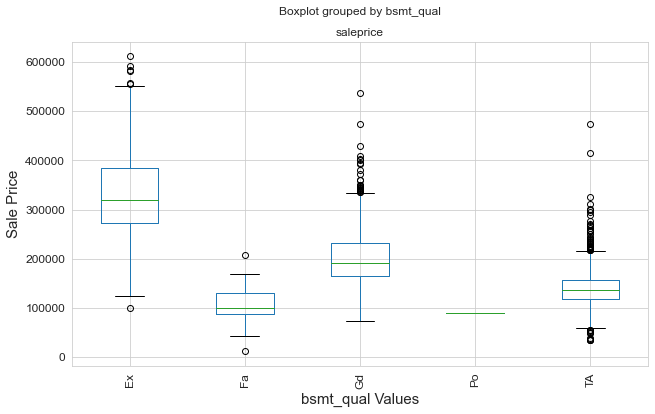

In [49]:
var_boxplot("bsmt_qual")

In [50]:
train_set['bsmt_qual'].unique()

array(['TA', 'Gd', 'Fa', nan, 'Ex', 'Po'], dtype=object)

In [51]:
test_set['bsmt_qual'].unique()

array(['Fa', 'Gd', 'TA', 'Ex', nan, 'Po'], dtype=object)

In [52]:
train_set['bsmt_qual'].value_counts()

TA    887
Gd    864
Ex    184
Fa     60
Po      1
Name: bsmt_qual, dtype: int64

In [53]:
test_set['bsmt_qual'].value_counts()

TA    396
Gd    355
Ex     74
Fa     28
Po      1
Name: bsmt_qual, dtype: int64

In [54]:
train_set['bsmt_qual'].isnull().value_counts()

False    1996
True       55
Name: bsmt_qual, dtype: int64

In [55]:
test_set['bsmt_qual'].isnull().value_counts()

False    854
True      25
Name: bsmt_qual, dtype: int64

In [56]:
train_set[train_set["bsmt_qual"].isnull()]

id        pid  ms_subclass ms_zoning  lot_area street lot_shape  \
12     807  906226060           70        RL     26400   Pave       Reg   
93     811  906226100           90        RL      7018   Pave       Reg   
114    781  905228050           20        RL      9000   Pave       Reg   
146    888  908128060           85        RL      7301   Pave       Reg   
183   1554  910251050           20   A (agr)     14584   Pave       Reg   
240   2740  905451050           20        RL     12048   Pave       Reg   
249   2242  910206010           50        RM     11067   Pave       Reg   
256   2745  905477010           20        RL      8335   Pave       Reg   
390     84  532351140           90        RM      8930   Pave       Reg   
437   1501  908201100           90        RL      6040   Pave       Reg   
485    155  535327140           20        RL      7200   Pave       Reg   
499    812  906226110           90        RL      7018   Pave       Reg   
514   2082  905475520           30        RL     11515   Pave       IR1   
580   1504  908204160           90        RL      6845   Pave       Reg   
581    946  912251110           30   I (all)     21780   Grvl       Reg   
616   1498  908154080           20        RL     47007   Pave       IR1   
635   2904  923125030           20   A (agr)     31250   Pave       Reg   
642    953  914476020           90        RL     10125   Pave       Reg   
696    274  908102060           30        RL      8777   Pave       Reg   
700    207  903454060          190        RM      5600   Pave       Reg   
737    788  905402070           20        RL     15635   Pave       IR1   
772    679  535451170           90        RL      7200   Pave       Reg   
790   1205  534276190           20        RL      7785   Pave       IR1   
794   1255  535375140           20        RL     10122   Pave       Reg   
924    677  535450160           90        RL      8544   Pave       Reg   
933   1375  904101170           50        RL     17120   Pave       Reg   
954   2622  535451190           20        RL      7200   Pave       Reg   
1007  1880  534252070           90        RL     10899   Pave       IR1   
1022  2703  904301410           30        RL      8250   Pave       Reg   
1049  2177  908152180           90        RL      9555   Pave       IR1   
1089   709  902205010           30        RM      5925   Pave       Reg   
1098  1260  535383100          190        RL     10800   Pave       Reg   
1125  2626  535454050           90        RL      8544   Pave       Reg   
1157   897  908225370           50        RL      8405   Pave       Reg   
1211  2893  916252170          120        RM      8239   Pave       IR1   
1222  1326  902427045           20        RM     12702   Pave       Reg   
1252   244  905478190           20        RL     11100   Pave       Reg   
1256   813  906226120           90        RL      7018   Pave       Reg   
1270  1569  914476080           90        RL     10260   Pave       Reg   
1327  1342  903230120           20        RM      5940   Pave       IR1   
1331   650  535353060           20        RL      9533   Pave       Reg   
1377  2707  905101330           90        RL     10791   Pave       Reg   
1387   787  905402060           20        RL     13680   Pave       IR1   
1428  1902  534450090           20        RL      5000   Pave       Reg   
1481  2701  904100170           20        RL     21370   Pave       Reg   
1594  1502  908201110           90        RL      6012   Pave       Reg   
1620   815  906226140           90        RL      7007   Pave       Reg   
1681  1899  534429030           90        RL      9842   Pave       Reg   
1684  2004  902427140           20        RM      8626   Pave       Reg   
1686  2627  535454060           90        RL      8544   Pave       Reg   
1859  2625  535454030           90        RL      8544   Pave       Reg   
1875  2279  923202220           20        RL     43500   Pave       Reg   
1889   810  906226090           9

In [57]:
test_set[test_set["bsmt_qual"].isnull()]

id        pid  ms_subclass ms_zoning  lot_area street lot_shape  \
15   2089  905480180           20        RL      9060   Pave       Reg   
37   2071  905228020           20        RL      9000   Pave       Reg   
77    971  923202060           20        RL     21750   Pave       Reg   
79   1887  534276290           20        RL      8339   Pave       IR1   
113  2005  902427180           80        RM     11800   Pave       Reg   
145  1507  908250040           50        RL      8050   Pave       Reg   
190   899  908250030           20        RL     10206   Pave       Reg   
206  2623  535451210           20        RL      7200   Pave       Reg   
279  1269  535451230           20        RL      7200   Pave       Reg   
292  2488  532351150           90        RM      8927   Pave       Reg   
294  1969  535457050           20        RL      7000   Pave       Reg   
315   291  909177100           90        RH      7200   Pave       Reg   
321  2680  903232170           50        RM      6240   Pave       Reg   
414  1252  535327230           20        RL      8838   Pave       Reg   
431   885  908102050           20        RL      8777   Pave       Reg   
481   795  905475500           20        RL     11500   Pave       IR1   
528   276  908102130           90        RL      9825   Pave       Reg   
553  1344  903232030           30        RM      6120   Pave       Reg   
614  2213  909275160           20        RL     13108   Pave       IR2   
619  2185  908204180           90        RL      6882   Pave       Reg   
622   808  906226070           90        RL      7018   Pave       Reg   
626  1818  531477040           90        RH      8400   Pave       Reg   
655  1220  534451080           20        RL      6627   Pave       IR1   
703   552  531475220           90        RL      8250   Pave       Reg   
772  2617  535425050           20        RL     11650   Pave       Reg   

    land_contour utilities lot_config land_slope neighborhood condition_1  \
15           Lvl    AllPub     Inside        Gtl      Edwards      Artery   
37           Lvl    AllPub     Inside        Gtl       Sawyer        Norm   
77           Lvl    AllPub     Inside        Gtl      Mitchel        Norm   
79           Lvl    AllPub     Inside        Gtl        NAmes        Norm   
113          Lvl    AllPub     Inside        Gtl      OldTown        Norm   
145          Lvl    AllPub     Inside        Gtl      Edwards        Norm   
190          Lvl    AllPub     Corner        Gtl      Edwards        Norm   
206          Lvl    AllPub     Inside        Gtl        NAmes        Norm   
279          Lvl    AllPub     Inside        Gtl        NAmes        Norm   
292          Lvl    AllPub     Inside        Gtl       Sawyer        RRAe   
294          Lvl    AllPub     Corner        Gtl        NAmes       Feedr   
315          Lvl    AllPub     Inside        Gtl        SWISU        Norm   
321          Lvl    AllPub     Inside        Gtl      BrkSide        Norm   
414          Lvl    AllPub     Inside        Gtl        NAmes        Norm   
431          Lvl    AllPub     Inside        Gtl      Edwards       Feedr   
481          Lvl    AllPub    CulDSac        Gtl      Edwards        Norm   
528          Lvl    AllPub     Inside        Gtl      Edwards        Norm   
553          Lvl    AllPub     Inside        Gtl      BrkSide        Norm   
614          HLS    AllPub     Inside        Gtl      Crawfor        Norm   
619          Lvl    AllPub     Corner        Gtl      Edwards        Norm   
622          Bnk    AllPub     Inside        Gtl      SawyerW        Norm   
626          Lvl    AllPub     Inside        Gtl      SawyerW       Feedr   
655          Lvl    AllPub     Corner        Gtl      BrkSide       Feedr   
703          Lvl    AllPub     Inside        Gtl      SawyerW        Norm   
772          Lvl    AllPub     Corner        Gtl        NAmes        PosA   

    condition_2 bldg_type house_style  overall_qual  overall_cond  year_built  

In [58]:
# replace nulls to None
train_set['bsmt_qual'] = train_set['bsmt_qual'].map(lambda cell: "None" if pd.isnull(cell) else cell)
test_set['bsmt_qual'] = test_set['bsmt_qual'].map(lambda cell: "None" if pd.isnull(cell) else cell)

## <font color='green'>bsmt_cond: Evaluates the general condition of the basement</font>

#### <font color='green'>Train set has 2.6% null, 0% NA / Test set has 2.8% null, 0% NA.</font>
#### <font color='green'>Replace null with NA: legend for No Basement</font>

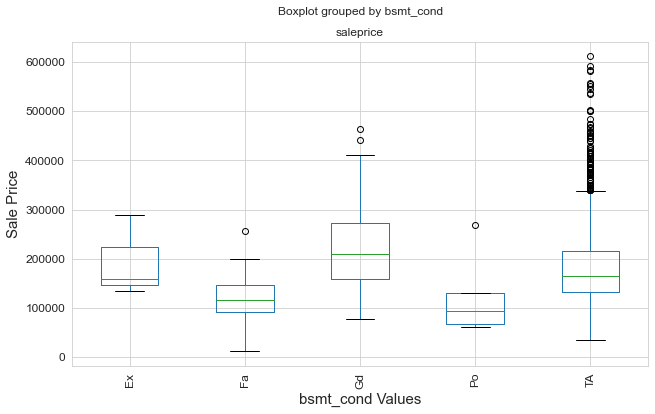

In [59]:
var_boxplot("bsmt_cond")

In [60]:
train_set['bsmt_cond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po', 'Ex'], dtype=object)

In [61]:
test_set['bsmt_cond'].unique()

array(['TA', 'Gd', nan, 'Fa'], dtype=object)

In [62]:
train_set['bsmt_cond'].value_counts()

TA    1834
Gd      89
Fa      65
Po       5
Ex       3
Name: bsmt_cond, dtype: int64

In [63]:
test_set['bsmt_cond'].value_counts()

TA    782
Fa     39
Gd     33
Name: bsmt_cond, dtype: int64

In [64]:
train_set['bsmt_cond'].isnull().value_counts()

False    1996
True       55
Name: bsmt_cond, dtype: int64

In [65]:
test_set['bsmt_cond'].isnull().value_counts()

False    854
True      25
Name: bsmt_cond, dtype: int64

In [66]:
train_set[train_set["bsmt_cond"].isnull()]

id        pid  ms_subclass ms_zoning  lot_area street lot_shape  \
12     807  906226060           70        RL     26400   Pave       Reg   
93     811  906226100           90        RL      7018   Pave       Reg   
114    781  905228050           20        RL      9000   Pave       Reg   
146    888  908128060           85        RL      7301   Pave       Reg   
183   1554  910251050           20   A (agr)     14584   Pave       Reg   
240   2740  905451050           20        RL     12048   Pave       Reg   
249   2242  910206010           50        RM     11067   Pave       Reg   
256   2745  905477010           20        RL      8335   Pave       Reg   
390     84  532351140           90        RM      8930   Pave       Reg   
437   1501  908201100           90        RL      6040   Pave       Reg   
485    155  535327140           20        RL      7200   Pave       Reg   
499    812  906226110           90        RL      7018   Pave       Reg   
514   2082  905475520           30        RL     11515   Pave       IR1   
580   1504  908204160           90        RL      6845   Pave       Reg   
581    946  912251110           30   I (all)     21780   Grvl       Reg   
616   1498  908154080           20        RL     47007   Pave       IR1   
635   2904  923125030           20   A (agr)     31250   Pave       Reg   
642    953  914476020           90        RL     10125   Pave       Reg   
696    274  908102060           30        RL      8777   Pave       Reg   
700    207  903454060          190        RM      5600   Pave       Reg   
737    788  905402070           20        RL     15635   Pave       IR1   
772    679  535451170           90        RL      7200   Pave       Reg   
790   1205  534276190           20        RL      7785   Pave       IR1   
794   1255  535375140           20        RL     10122   Pave       Reg   
924    677  535450160           90        RL      8544   Pave       Reg   
933   1375  904101170           50        RL     17120   Pave       Reg   
954   2622  535451190           20        RL      7200   Pave       Reg   
1007  1880  534252070           90        RL     10899   Pave       IR1   
1022  2703  904301410           30        RL      8250   Pave       Reg   
1049  2177  908152180           90        RL      9555   Pave       IR1   
1089   709  902205010           30        RM      5925   Pave       Reg   
1098  1260  535383100          190        RL     10800   Pave       Reg   
1125  2626  535454050           90        RL      8544   Pave       Reg   
1157   897  908225370           50        RL      8405   Pave       Reg   
1211  2893  916252170          120        RM      8239   Pave       IR1   
1222  1326  902427045           20        RM     12702   Pave       Reg   
1252   244  905478190           20        RL     11100   Pave       Reg   
1256   813  906226120           90        RL      7018   Pave       Reg   
1270  1569  914476080           90        RL     10260   Pave       Reg   
1327  1342  903230120           20        RM      5940   Pave       IR1   
1331   650  535353060           20        RL      9533   Pave       Reg   
1377  2707  905101330           90        RL     10791   Pave       Reg   
1387   787  905402060           20        RL     13680   Pave       IR1   
1428  1902  534450090           20        RL      5000   Pave       Reg   
1481  2701  904100170           20        RL     21370   Pave       Reg   
1594  1502  908201110           90        RL      6012   Pave       Reg   
1620   815  906226140           90        RL      7007   Pave       Reg   
1681  1899  534429030           90        RL      9842   Pave       Reg   
1684  2004  902427140           20        RM      8626   Pave       Reg   
1686  2627  535454060           90        RL      8544   Pave       Reg   
1859  2625  535454030           90        RL      8544   Pave       Reg   
1875  2279  923202220           20        RL     43500   Pave       Reg   
1889   810  906226090           9

In [67]:
test_set[test_set["bsmt_cond"].isnull()]

id        pid  ms_subclass ms_zoning  lot_area street lot_shape  \
15   2089  905480180           20        RL      9060   Pave       Reg   
37   2071  905228020           20        RL      9000   Pave       Reg   
77    971  923202060           20        RL     21750   Pave       Reg   
79   1887  534276290           20        RL      8339   Pave       IR1   
113  2005  902427180           80        RM     11800   Pave       Reg   
145  1507  908250040           50        RL      8050   Pave       Reg   
190   899  908250030           20        RL     10206   Pave       Reg   
206  2623  535451210           20        RL      7200   Pave       Reg   
279  1269  535451230           20        RL      7200   Pave       Reg   
292  2488  532351150           90        RM      8927   Pave       Reg   
294  1969  535457050           20        RL      7000   Pave       Reg   
315   291  909177100           90        RH      7200   Pave       Reg   
321  2680  903232170           50        RM      6240   Pave       Reg   
414  1252  535327230           20        RL      8838   Pave       Reg   
431   885  908102050           20        RL      8777   Pave       Reg   
481   795  905475500           20        RL     11500   Pave       IR1   
528   276  908102130           90        RL      9825   Pave       Reg   
553  1344  903232030           30        RM      6120   Pave       Reg   
614  2213  909275160           20        RL     13108   Pave       IR2   
619  2185  908204180           90        RL      6882   Pave       Reg   
622   808  906226070           90        RL      7018   Pave       Reg   
626  1818  531477040           90        RH      8400   Pave       Reg   
655  1220  534451080           20        RL      6627   Pave       IR1   
703   552  531475220           90        RL      8250   Pave       Reg   
772  2617  535425050           20        RL     11650   Pave       Reg   

    land_contour utilities lot_config land_slope neighborhood condition_1  \
15           Lvl    AllPub     Inside        Gtl      Edwards      Artery   
37           Lvl    AllPub     Inside        Gtl       Sawyer        Norm   
77           Lvl    AllPub     Inside        Gtl      Mitchel        Norm   
79           Lvl    AllPub     Inside        Gtl        NAmes        Norm   
113          Lvl    AllPub     Inside        Gtl      OldTown        Norm   
145          Lvl    AllPub     Inside        Gtl      Edwards        Norm   
190          Lvl    AllPub     Corner        Gtl      Edwards        Norm   
206          Lvl    AllPub     Inside        Gtl        NAmes        Norm   
279          Lvl    AllPub     Inside        Gtl        NAmes        Norm   
292          Lvl    AllPub     Inside        Gtl       Sawyer        RRAe   
294          Lvl    AllPub     Corner        Gtl        NAmes       Feedr   
315          Lvl    AllPub     Inside        Gtl        SWISU        Norm   
321          Lvl    AllPub     Inside        Gtl      BrkSide        Norm   
414          Lvl    AllPub     Inside        Gtl        NAmes        Norm   
431          Lvl    AllPub     Inside        Gtl      Edwards       Feedr   
481          Lvl    AllPub    CulDSac        Gtl      Edwards        Norm   
528          Lvl    AllPub     Inside        Gtl      Edwards        Norm   
553          Lvl    AllPub     Inside        Gtl      BrkSide        Norm   
614          HLS    AllPub     Inside        Gtl      Crawfor        Norm   
619          Lvl    AllPub     Corner        Gtl      Edwards        Norm   
622          Bnk    AllPub     Inside        Gtl      SawyerW        Norm   
626          Lvl    AllPub     Inside        Gtl      SawyerW       Feedr   
655          Lvl    AllPub     Corner        Gtl      BrkSide       Feedr   
703          Lvl    AllPub     Inside        Gtl      SawyerW        Norm   
772          Lvl    AllPub     Corner        Gtl        NAmes        PosA   

    condition_2 bldg_type house_style  overall_qual  overall_cond  year_built  

In [68]:
# replace nulls to None
train_set['bsmt_cond'] = train_set['bsmt_cond'].map(lambda cell: "None" if pd.isnull(cell) else cell)
test_set['bsmt_cond'] = test_set['bsmt_cond'].map(lambda cell: "None" if pd.isnull(cell) else cell)

## <font color='green'>bsmt_exposure: Refers to walkout or garden level walls</font>

#### <font color='green'>Train set has 2.8% null, 0% NA. All except 3 are NA for bsmt_qual / Test set has 2.8% null, 0% NA and all have NA for bsmt_qual</font>
#### <font color='green'>Replace null with NA if bsmt_qual=NA. Delete the 3 rows with basement but null bsmt_exposure: legend for No Basement</font>

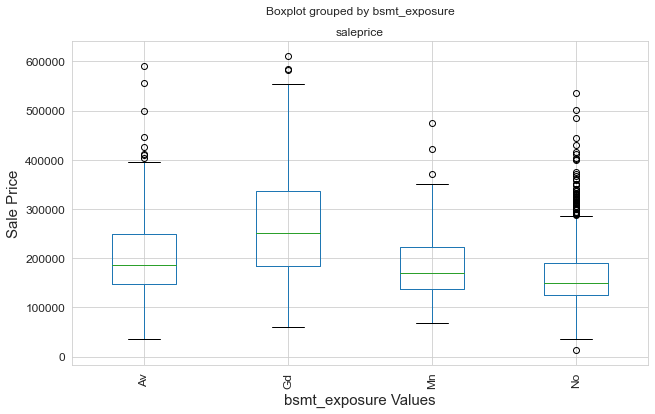

In [69]:
var_boxplot("bsmt_exposure")

In [70]:
train_set['bsmt_exposure'].unique()

array(['No', 'Gd', 'Av', nan, 'Mn'], dtype=object)

In [71]:
test_set['bsmt_exposure'].unique()

array(['No', 'Av', nan, 'Mn', 'Gd'], dtype=object)

In [72]:
train_set['bsmt_exposure'].value_counts()

No    1339
Av     288
Gd     203
Mn     163
Name: bsmt_exposure, dtype: int64

In [73]:
test_set['bsmt_exposure'].value_counts()

No    567
Av    130
Gd     81
Mn     76
Name: bsmt_exposure, dtype: int64

In [74]:
train_set['bsmt_exposure'].isnull().value_counts()

False    1993
True       58
Name: bsmt_exposure, dtype: int64

In [75]:
test_set['bsmt_exposure'].isnull().value_counts()

False    854
True      25
Name: bsmt_exposure, dtype: int64

In [76]:
train_set[train_set["bsmt_exposure"].isnull()]

id        pid  ms_subclass ms_zoning  lot_area street lot_shape  \
12     807  906226060           70        RL     26400   Pave       Reg   
93     811  906226100           90        RL      7018   Pave       Reg   
114    781  905228050           20        RL      9000   Pave       Reg   
146    888  908128060           85        RL      7301   Pave       Reg   
183   1554  910251050           20   A (agr)     14584   Pave       Reg   
240   2740  905451050           20        RL     12048   Pave       Reg   
249   2242  910206010           50        RM     11067   Pave       Reg   
256   2745  905477010           20        RL      8335   Pave       Reg   
390     84  532351140           90        RM      8930   Pave       Reg   
437   1501  908201100           90        RL      6040   Pave       Reg   
485    155  535327140           20        RL      7200   Pave       Reg   
499    812  906226110           90        RL      7018   Pave       Reg   
514   2082  905475520           30        RL     11515   Pave       IR1   
580   1504  908204160           90        RL      6845   Pave       Reg   
581    946  912251110           30   I (all)     21780   Grvl       Reg   
616   1498  908154080           20        RL     47007   Pave       IR1   
635   2904  923125030           20   A (agr)     31250   Pave       Reg   
642    953  914476020           90        RL     10125   Pave       Reg   
696    274  908102060           30        RL      8777   Pave       Reg   
700    207  903454060          190        RM      5600   Pave       Reg   
737    788  905402070           20        RL     15635   Pave       IR1   
772    679  535451170           90        RL      7200   Pave       Reg   
790   1205  534276190           20        RL      7785   Pave       IR1   
794   1255  535375140           20        RL     10122   Pave       Reg   
924    677  535450160           90        RL      8544   Pave       Reg   
933   1375  904101170           50        RL     17120   Pave       Reg   
954   2622  535451190           20        RL      7200   Pave       Reg   
1007  1880  534252070           90        RL     10899   Pave       IR1   
1022  2703  904301410           30        RL      8250   Pave       Reg   
1049  2177  908152180           90        RL      9555   Pave       IR1   
1089   709  902205010           30        RM      5925   Pave       Reg   
1098  1260  535383100          190        RL     10800   Pave       Reg   
1125  2626  535454050           90        RL      8544   Pave       Reg   
1157   897  908225370           50        RL      8405   Pave       Reg   
1211  2893  916252170          120        RM      8239   Pave       IR1   
1222  1326  902427045           20        RM     12702   Pave       Reg   
1252   244  905478190           20        RL     11100   Pave       Reg   
1256   813  906226120           90        RL      7018   Pave       Reg   
1270  1569  914476080           90        RL     10260   Pave       Reg   
1327  1342  903230120           20        RM      5940   Pave       IR1   
1331   650  535353060           20        RL      9533   Pave       Reg   
1377  2707  905101330           90        RL     10791   Pave       Reg   
1387   787  905402060           20        RL     13680   Pave       IR1   
1428  1902  534450090           20        RL      5000   Pave       Reg   
1456  1797  528458090           60        FV     10411   Pave       Reg   
1481  2701  904100170           20        RL     21370   Pave       Reg   
1547    67  528445060           20        RL      8987   Pave       Reg   
1594  1502  908201110           90        RL      6012   Pave       Reg   
1620   815  906226140           90        RL      7007   Pave       Reg   
1681  1899  534429030           90        RL      9842   Pave       Reg   
1684  2004  902427140           20        RM      8626   Pave       Reg   
1686  2627  535454060           90        RL      8544   Pave       Reg   
1859  2625  535454030           9

In [77]:
test_set[test_set["bsmt_exposure"].isnull()]

id        pid  ms_subclass ms_zoning  lot_area street lot_shape  \
15   2089  905480180           20        RL      9060   Pave       Reg   
37   2071  905228020           20        RL      9000   Pave       Reg   
77    971  923202060           20        RL     21750   Pave       Reg   
79   1887  534276290           20        RL      8339   Pave       IR1   
113  2005  902427180           80        RM     11800   Pave       Reg   
145  1507  908250040           50        RL      8050   Pave       Reg   
190   899  908250030           20        RL     10206   Pave       Reg   
206  2623  535451210           20        RL      7200   Pave       Reg   
279  1269  535451230           20        RL      7200   Pave       Reg   
292  2488  532351150           90        RM      8927   Pave       Reg   
294  1969  535457050           20        RL      7000   Pave       Reg   
315   291  909177100           90        RH      7200   Pave       Reg   
321  2680  903232170           50        RM      6240   Pave       Reg   
414  1252  535327230           20        RL      8838   Pave       Reg   
431   885  908102050           20        RL      8777   Pave       Reg   
481   795  905475500           20        RL     11500   Pave       IR1   
528   276  908102130           90        RL      9825   Pave       Reg   
553  1344  903232030           30        RM      6120   Pave       Reg   
614  2213  909275160           20        RL     13108   Pave       IR2   
619  2185  908204180           90        RL      6882   Pave       Reg   
622   808  906226070           90        RL      7018   Pave       Reg   
626  1818  531477040           90        RH      8400   Pave       Reg   
655  1220  534451080           20        RL      6627   Pave       IR1   
703   552  531475220           90        RL      8250   Pave       Reg   
772  2617  535425050           20        RL     11650   Pave       Reg   

    land_contour utilities lot_config land_slope neighborhood condition_1  \
15           Lvl    AllPub     Inside        Gtl      Edwards      Artery   
37           Lvl    AllPub     Inside        Gtl       Sawyer        Norm   
77           Lvl    AllPub     Inside        Gtl      Mitchel        Norm   
79           Lvl    AllPub     Inside        Gtl        NAmes        Norm   
113          Lvl    AllPub     Inside        Gtl      OldTown        Norm   
145          Lvl    AllPub     Inside        Gtl      Edwards        Norm   
190          Lvl    AllPub     Corner        Gtl      Edwards        Norm   
206          Lvl    AllPub     Inside        Gtl        NAmes        Norm   
279          Lvl    AllPub     Inside        Gtl        NAmes        Norm   
292          Lvl    AllPub     Inside        Gtl       Sawyer        RRAe   
294          Lvl    AllPub     Corner        Gtl        NAmes       Feedr   
315          Lvl    AllPub     Inside        Gtl        SWISU        Norm   
321          Lvl    AllPub     Inside        Gtl      BrkSide        Norm   
414          Lvl    AllPub     Inside        Gtl        NAmes        Norm   
431          Lvl    AllPub     Inside        Gtl      Edwards       Feedr   
481          Lvl    AllPub    CulDSac        Gtl      Edwards        Norm   
528          Lvl    AllPub     Inside        Gtl      Edwards        Norm   
553          Lvl    AllPub     Inside        Gtl      BrkSide        Norm   
614          HLS    AllPub     Inside        Gtl      Crawfor        Norm   
619          Lvl    AllPub     Corner        Gtl      Edwards        Norm   
622          Bnk    AllPub     Inside        Gtl      SawyerW        Norm   
626          Lvl    AllPub     Inside        Gtl      SawyerW       Feedr   
655          Lvl    AllPub     Corner        Gtl      BrkSide       Feedr   
703          Lvl    AllPub     Inside        Gtl      SawyerW        Norm   
772          Lvl    AllPub     Corner        Gtl        NAmes        PosA   

    condition_2 bldg_type house_style  overall_qual  overall_cond  year_built  

In [78]:
# replace nulls to None
train_set['bsmt_exposure'] = train_set['bsmt_exposure'].map(lambda cell: "None" if pd.isnull(cell) else cell)
test_set['bsmt_exposure'] = test_set['bsmt_exposure'].map(lambda cell: "None" if pd.isnull(cell) else cell)

In [79]:
train_set[(train_set['bsmt_exposure']=="None") & (train_set['bsmt_qual']!="None")]

id        pid  ms_subclass ms_zoning  lot_area street lot_shape  \
1456  1797  528458090           60        FV     10411   Pave       Reg   
1547    67  528445060           20        RL      8987   Pave       Reg   
1997  2780  907194130           60        RL     14006   Pave       IR1   

     land_contour utilities lot_config land_slope neighborhood condition_1  \
1456          Lvl    AllPub     Corner        Gtl      Somerst        Norm   
1547          Lvl    AllPub     Inside        Gtl      Somerst        Norm   
1997          Lvl    AllPub     Inside        Gtl      CollgCr        Norm   

     condition_2 bldg_type house_style  overall_qual  overall_cond  \
1456        Norm      1Fam      2Story             5             5   
1547        Norm      1Fam      1Story             8             5   
1997        Norm      1Fam      2Story             7             5   

      year_built  year_remod/add roof_style roof_matl exterior_1st  \
1456        2007            2007      Gable   CompShg      VinylSd   
1547        2005            2006      Gable   CompShg      VinylSd   
1997        2002            2002      Gable   CompShg      VinylSd   

     exterior_2nd mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation  \
1456      VinylSd         None           0.0         Gd         TA     CBlock   
1547      VinylSd      BrkFace         226.0         Gd         TA      PConc   
1997      VinylSd      BrkFace         144.0         Gd         TA      PConc   

     bsmt_qual bsmt_cond bsmt_exposure bsmtfin_type_1  bsmtfin_sf_1  \
1456        Gd        TA          None            Unf           0.0   
1547        Gd        TA          None            Unf           0.0   
1997        Gd        TA          None            Unf           0.0   

     bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf heating  \
1456            Unf           0.0        725.0          725.0    GasA   
1547            Unf           0.0       1595.0         1595.0    GasA   
1997            Unf           0.0        936.0          936.0    GasA   

     heating_qc central_air electrical  1st_flr_sf  2nd_flr_sf  \
1456         Ex           Y      SBrkr         725         863   
1547         Ex           Y      SBrkr        1595           0   
1997         Ex           Y      SBrkr         936         840   

      low_qual_fin_sf  gr_liv_area  bsmt_full_bath  bsmt_half_bath  full_bath  \
1456                0         1588             0.0             0.0          3   
1547                0         1595             0.0             0.0          2   
1997                0         1776             0.0             0.0          2   

      half_bath  bedroom_abvgr  kitchen_abvgr kitchen_qual  totrms_abvgrd  \
1456          0              3              1           Gd              8   
1547          0              2              1           Gd              6   
1997          1              3              1           Gd              7   

     functional  fireplaces fireplace_qu garage_type  garage_yr_blt  \
1456        Typ           0          NaN      Attchd         2007.0   
1547        Typ           1           Gd      Attchd         2005.0   
1997        Typ           1           TA      Attchd         2002.0   

     garage_finish  garage_cars  garage_area garage_qual garage_cond  \
1456           Unf          2.0        561.0          TA          TA   
1547           RFn          3.0        880.0          TA          TA   
1997           RFn          2.0        474.0          TA          TA   

     paved_drive  wood_deck_sf  open_porch_sf  enclosed_porch  3ssn_porch  \
1456           Y             0              0               0           0   
1547           Y           144              0               0           0   
1997           Y           144             96               0           0   

      screen_porch  pool_area pool_qc fence misc_feature  misc_val  mo_sold  \
1456             0          0     NaN   NaN          NaN         0  

In [80]:
# 3 rows with basement but Null(NA) for bsmt_exposure
# delete abnormal rows
delete_index_list = train_set[(train_set['bsmt_exposure']=="None") & (train_set['bsmt_qual']!="None")].index
train_set.drop(delete_index_list, axis=0, inplace=True)

## <font color='green'>bsmtfin_type_1: Rating of basement finished area</font>

#### <font color='green'>Train set has 2.8% null, 0% NA / Test set has 2.8% null, 0% NA and all have NA for bsmt_qual</font>
#### <font color='green'>Replace null with NA if bsmt_qual=NA.</font>

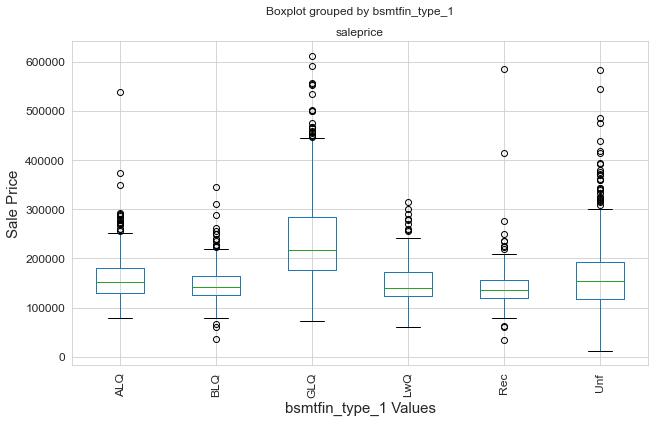

In [81]:
var_boxplot("bsmtfin_type_1")

In [82]:
train_set['bsmtfin_type_1'].unique()

array(['GLQ', 'Unf', 'ALQ', 'Rec', nan, 'BLQ', 'LwQ'], dtype=object)

In [83]:
test_set['bsmtfin_type_1'].unique()

array(['Unf', 'GLQ', 'BLQ', 'Rec', 'ALQ', nan, 'LwQ'], dtype=object)

In [84]:
train_set['bsmtfin_type_1'].value_counts()

GLQ    615
Unf    600
ALQ    293
BLQ    200
Rec    183
LwQ    102
Name: bsmtfin_type_1, dtype: int64

In [85]:
test_set['bsmtfin_type_1'].value_counts()

Unf    248
GLQ    244
ALQ    136
Rec    105
BLQ     69
LwQ     52
Name: bsmtfin_type_1, dtype: int64

In [86]:
train_set['bsmtfin_type_1'].isnull().value_counts()

False    1993
True       55
Name: bsmtfin_type_1, dtype: int64

In [87]:
test_set['bsmtfin_type_1'].isnull().value_counts()

False    854
True      25
Name: bsmtfin_type_1, dtype: int64

In [88]:
train_set[train_set["bsmtfin_type_1"].isnull()]

id        pid  ms_subclass ms_zoning  lot_area street lot_shape  \
12     807  906226060           70        RL     26400   Pave       Reg   
93     811  906226100           90        RL      7018   Pave       Reg   
114    781  905228050           20        RL      9000   Pave       Reg   
146    888  908128060           85        RL      7301   Pave       Reg   
183   1554  910251050           20   A (agr)     14584   Pave       Reg   
240   2740  905451050           20        RL     12048   Pave       Reg   
249   2242  910206010           50        RM     11067   Pave       Reg   
256   2745  905477010           20        RL      8335   Pave       Reg   
390     84  532351140           90        RM      8930   Pave       Reg   
437   1501  908201100           90        RL      6040   Pave       Reg   
485    155  535327140           20        RL      7200   Pave       Reg   
499    812  906226110           90        RL      7018   Pave       Reg   
514   2082  905475520           30        RL     11515   Pave       IR1   
580   1504  908204160           90        RL      6845   Pave       Reg   
581    946  912251110           30   I (all)     21780   Grvl       Reg   
616   1498  908154080           20        RL     47007   Pave       IR1   
635   2904  923125030           20   A (agr)     31250   Pave       Reg   
642    953  914476020           90        RL     10125   Pave       Reg   
696    274  908102060           30        RL      8777   Pave       Reg   
700    207  903454060          190        RM      5600   Pave       Reg   
737    788  905402070           20        RL     15635   Pave       IR1   
772    679  535451170           90        RL      7200   Pave       Reg   
790   1205  534276190           20        RL      7785   Pave       IR1   
794   1255  535375140           20        RL     10122   Pave       Reg   
924    677  535450160           90        RL      8544   Pave       Reg   
933   1375  904101170           50        RL     17120   Pave       Reg   
954   2622  535451190           20        RL      7200   Pave       Reg   
1007  1880  534252070           90        RL     10899   Pave       IR1   
1022  2703  904301410           30        RL      8250   Pave       Reg   
1049  2177  908152180           90        RL      9555   Pave       IR1   
1089   709  902205010           30        RM      5925   Pave       Reg   
1098  1260  535383100          190        RL     10800   Pave       Reg   
1125  2626  535454050           90        RL      8544   Pave       Reg   
1157   897  908225370           50        RL      8405   Pave       Reg   
1211  2893  916252170          120        RM      8239   Pave       IR1   
1222  1326  902427045           20        RM     12702   Pave       Reg   
1252   244  905478190           20        RL     11100   Pave       Reg   
1256   813  906226120           90        RL      7018   Pave       Reg   
1270  1569  914476080           90        RL     10260   Pave       Reg   
1327  1342  903230120           20        RM      5940   Pave       IR1   
1331   650  535353060           20        RL      9533   Pave       Reg   
1377  2707  905101330           90        RL     10791   Pave       Reg   
1387   787  905402060           20        RL     13680   Pave       IR1   
1428  1902  534450090           20        RL      5000   Pave       Reg   
1481  2701  904100170           20        RL     21370   Pave       Reg   
1594  1502  908201110           90        RL      6012   Pave       Reg   
1620   815  906226140           90        RL      7007   Pave       Reg   
1681  1899  534429030           90        RL      9842   Pave       Reg   
1684  2004  902427140           20        RM      8626   Pave       Reg   
1686  2627  535454060           90        RL      8544   Pave       Reg   
1859  2625  535454030           90        RL      8544   Pave       Reg   
1875  2279  923202220           20        RL     43500   Pave       Reg   
1889   810  906226090           9

In [89]:
test_set[test_set["bsmtfin_type_1"].isnull()]

id        pid  ms_subclass ms_zoning  lot_area street lot_shape  \
15   2089  905480180           20        RL      9060   Pave       Reg   
37   2071  905228020           20        RL      9000   Pave       Reg   
77    971  923202060           20        RL     21750   Pave       Reg   
79   1887  534276290           20        RL      8339   Pave       IR1   
113  2005  902427180           80        RM     11800   Pave       Reg   
145  1507  908250040           50        RL      8050   Pave       Reg   
190   899  908250030           20        RL     10206   Pave       Reg   
206  2623  535451210           20        RL      7200   Pave       Reg   
279  1269  535451230           20        RL      7200   Pave       Reg   
292  2488  532351150           90        RM      8927   Pave       Reg   
294  1969  535457050           20        RL      7000   Pave       Reg   
315   291  909177100           90        RH      7200   Pave       Reg   
321  2680  903232170           50        RM      6240   Pave       Reg   
414  1252  535327230           20        RL      8838   Pave       Reg   
431   885  908102050           20        RL      8777   Pave       Reg   
481   795  905475500           20        RL     11500   Pave       IR1   
528   276  908102130           90        RL      9825   Pave       Reg   
553  1344  903232030           30        RM      6120   Pave       Reg   
614  2213  909275160           20        RL     13108   Pave       IR2   
619  2185  908204180           90        RL      6882   Pave       Reg   
622   808  906226070           90        RL      7018   Pave       Reg   
626  1818  531477040           90        RH      8400   Pave       Reg   
655  1220  534451080           20        RL      6627   Pave       IR1   
703   552  531475220           90        RL      8250   Pave       Reg   
772  2617  535425050           20        RL     11650   Pave       Reg   

    land_contour utilities lot_config land_slope neighborhood condition_1  \
15           Lvl    AllPub     Inside        Gtl      Edwards      Artery   
37           Lvl    AllPub     Inside        Gtl       Sawyer        Norm   
77           Lvl    AllPub     Inside        Gtl      Mitchel        Norm   
79           Lvl    AllPub     Inside        Gtl        NAmes        Norm   
113          Lvl    AllPub     Inside        Gtl      OldTown        Norm   
145          Lvl    AllPub     Inside        Gtl      Edwards        Norm   
190          Lvl    AllPub     Corner        Gtl      Edwards        Norm   
206          Lvl    AllPub     Inside        Gtl        NAmes        Norm   
279          Lvl    AllPub     Inside        Gtl        NAmes        Norm   
292          Lvl    AllPub     Inside        Gtl       Sawyer        RRAe   
294          Lvl    AllPub     Corner        Gtl        NAmes       Feedr   
315          Lvl    AllPub     Inside        Gtl        SWISU        Norm   
321          Lvl    AllPub     Inside        Gtl      BrkSide        Norm   
414          Lvl    AllPub     Inside        Gtl        NAmes        Norm   
431          Lvl    AllPub     Inside        Gtl      Edwards       Feedr   
481          Lvl    AllPub    CulDSac        Gtl      Edwards        Norm   
528          Lvl    AllPub     Inside        Gtl      Edwards        Norm   
553          Lvl    AllPub     Inside        Gtl      BrkSide        Norm   
614          HLS    AllPub     Inside        Gtl      Crawfor        Norm   
619          Lvl    AllPub     Corner        Gtl      Edwards        Norm   
622          Bnk    AllPub     Inside        Gtl      SawyerW        Norm   
626          Lvl    AllPub     Inside        Gtl      SawyerW       Feedr   
655          Lvl    AllPub     Corner        Gtl      BrkSide       Feedr   
703          Lvl    AllPub     Inside        Gtl      SawyerW        Norm   
772          Lvl    AllPub     Corner        Gtl        NAmes        PosA   

    condition_2 bldg_type house_style  overall_qual  overall_cond  year_built  

In [90]:
# replace nulls to None
train_set['bsmtfin_type_1'] = train_set['bsmtfin_type_1'].map(lambda cell: "None" if pd.isnull(cell) else cell)
test_set['bsmtfin_type_1'] = test_set['bsmtfin_type_1'].map(lambda cell: "None" if pd.isnull(cell) else cell)

## <font color='green'>bsmtfin_sf_1: Type 1 finished square feet</font>

#### <font color='green'>Train set has 1 null and 0 values for bsmtfin_type_1 = NA or Unf / Test set has no null</font>
#### <font color='green'>Replace null with 0 since it's bsmtfin_type_1 = NA</font>

/Users/chuahb/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/chuahb/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


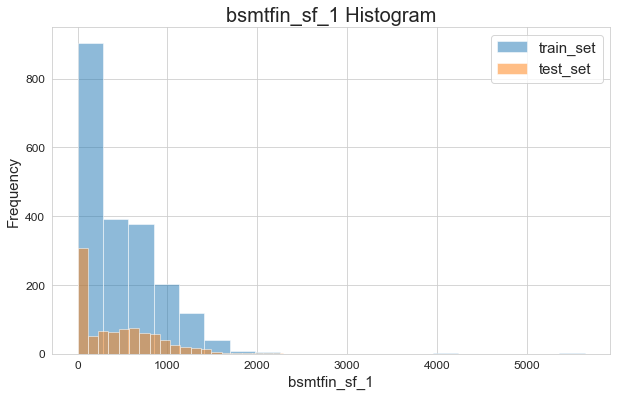

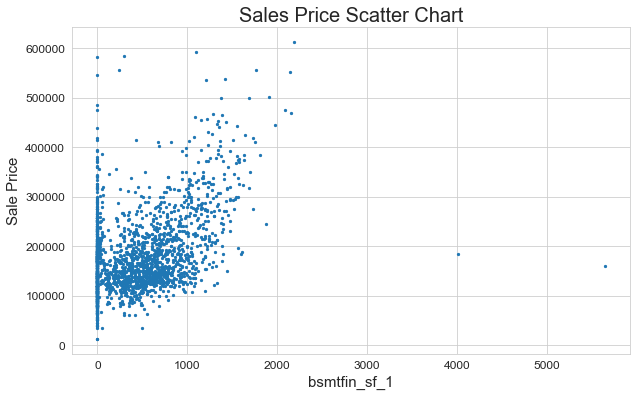

In [91]:
var_hist_scatter("bsmtfin_sf_1")

In [92]:
train_set['bsmtfin_sf_1'].describe()

count    2047.000000
mean      442.948705
std       461.230817
min         0.000000
25%         0.000000
50%       369.000000
75%       734.000000
max      5644.000000
Name: bsmtfin_sf_1, dtype: float64

In [93]:
test_set['bsmtfin_sf_1'].describe()

count     879.000000
mean      443.397042
std       442.480223
min         0.000000
25%         0.000000
50%       374.000000
75%       735.500000
max      2288.000000
Name: bsmtfin_sf_1, dtype: float64

In [94]:
train_set['bsmtfin_sf_1'].value_counts()

0.0       654
24.0       17
16.0       10
384.0       7
300.0       7
         ... 
201.0       1
477.0       1
370.0       1
223.0       1
1558.0      1
Name: bsmtfin_sf_1, Length: 821, dtype: int64

In [95]:
test_set['bsmtfin_sf_1'].value_counts()

0       273
24       10
16        4
936       4
602       4
       ... 
502       1
503       1
505       1
509       1
1022      1
Name: bsmtfin_sf_1, Length: 463, dtype: int64

In [96]:
train_set['bsmtfin_sf_1'].isnull().value_counts()

False    2047
True        1
Name: bsmtfin_sf_1, dtype: int64

In [97]:
test_set['bsmtfin_sf_1'].isnull().value_counts()

False    879
Name: bsmtfin_sf_1, dtype: int64

In [98]:
train_set[train_set["bsmtfin_sf_1"].isnull()]

id        pid  ms_subclass ms_zoning  lot_area street lot_shape  \
1327  1342  903230120           20        RM      5940   Pave       IR1   

     land_contour utilities lot_config land_slope neighborhood condition_1  \
1327          Lvl    AllPub        FR3        Gtl      BrkSide       Feedr   

     condition_2 bldg_type house_style  overall_qual  overall_cond  \
1327        Norm      1Fam      1Story             4             7   

      year_built  year_remod/add roof_style roof_matl exterior_1st  \
1327        1946            1950      Gable   CompShg      MetalSd   

     exterior_2nd mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation  \
1327       CBlock         None           0.0         TA         TA      PConc   

     bsmt_qual bsmt_cond bsmt_exposure bsmtfin_type_1  bsmtfin_sf_1  \
1327      None      None          None           None           NaN   

     bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf heating  \
1327            NaN           NaN          NaN            NaN    GasA   

     heating_qc central_air electrical  1st_flr_sf  2nd_flr_sf  \
1327         TA           Y      FuseA         896           0   

      low_qual_fin_sf  gr_liv_area  bsmt_full_bath  bsmt_half_bath  full_bath  \
1327                0          896             NaN             NaN          1   

      half_bath  bedroom_abvgr  kitchen_abvgr kitchen_qual  totrms_abvgrd  \
1327          0              2              1           TA              4   

     functional  fireplaces fireplace_qu garage_type  garage_yr_blt  \
1327        Typ           0          NaN      Detchd         1946.0   

     garage_finish  garage_cars  garage_area garage_qual garage_cond  \
1327           Unf          1.0        280.0          TA          TA   

     paved_drive  wood_deck_sf  open_porch_sf  enclosed_porch  3ssn_porch  \
1327           Y             0              0               0           0   

      screen_porch  pool_area pool_qc  fence misc_feature  misc_val  mo_sold  \
1327             0          0     NaN  MnPrv          NaN         0        4   

      yr_sold sale_type  saleprice  
1327     2008     ConLD      79000

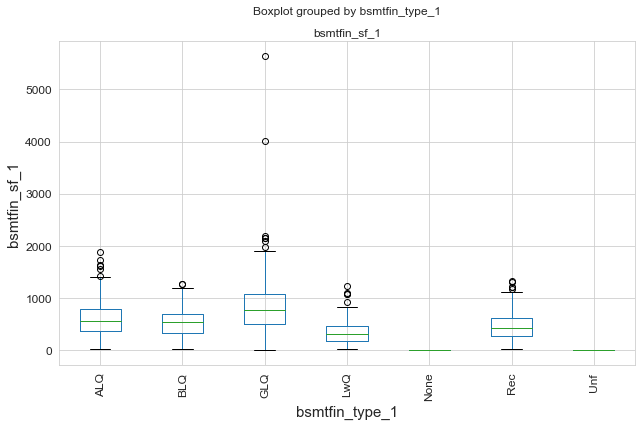

In [99]:
train_set.boxplot(by='bsmtfin_type_1', column=['bsmtfin_sf_1'], figsize = (10,6), rot=90);

plt.xticks(fontsize=12);
plt.yticks(fontsize=12);
plt.xlabel("bsmtfin_type_1", fontsize=15)
plt.ylabel("bsmtfin_sf_1", fontsize=15);

In [100]:
# replace nulls to 0
train_set['bsmtfin_sf_1'] = train_set['bsmtfin_sf_1'].map(lambda cell: 0 if pd.isnull(cell) else cell)

## <font color='green'>bsmtfin_type_2: Rating of basement finished area (if multiple types)</font>

#### <font color='green'>Train set has 27% null, 0% NA / Test set has 28% null, 0% NA and all have NA for bsmt_qual</font>
#### <font color='green'>Replace null with NA if bsmt_qual=NA. There is one entry with bsmt_qual=Gd also had null converted to NA, we delete this abnormal row</font>

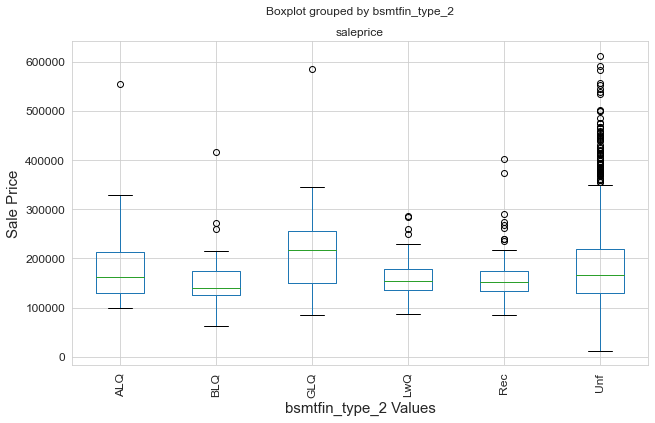

In [101]:
var_boxplot("bsmtfin_type_2")

In [102]:
train_set['bsmtfin_type_2'].unique()

array(['Unf', 'Rec', nan, 'BLQ', 'GLQ', 'LwQ', 'ALQ'], dtype=object)

In [103]:
test_set['bsmtfin_type_2'].unique()

array(['Unf', 'LwQ', nan, 'ALQ', 'GLQ', 'Rec', 'BLQ'], dtype=object)

In [104]:
train_set['bsmtfin_type_2'].value_counts()

Unf    1746
Rec      80
LwQ      60
BLQ      48
ALQ      35
GLQ      23
Name: bsmtfin_type_2, dtype: int64

In [105]:
test_set['bsmtfin_type_2'].value_counts()

Unf    750
LwQ     29
Rec     26
BLQ     20
ALQ     18
GLQ     11
Name: bsmtfin_type_2, dtype: int64

In [106]:
train_set['bsmtfin_type_2'].isnull().value_counts()

False    1992
True       56
Name: bsmtfin_type_2, dtype: int64

In [107]:
test_set['bsmtfin_type_2'].isnull().value_counts()

False    854
True      25
Name: bsmtfin_type_2, dtype: int64

In [108]:
train_set[train_set["bsmtfin_type_2"].isnull()]

id        pid  ms_subclass ms_zoning  lot_area street lot_shape  \
12     807  906226060           70        RL     26400   Pave       Reg   
93     811  906226100           90        RL      7018   Pave       Reg   
114    781  905228050           20        RL      9000   Pave       Reg   
146    888  908128060           85        RL      7301   Pave       Reg   
183   1554  910251050           20   A (agr)     14584   Pave       Reg   
240   2740  905451050           20        RL     12048   Pave       Reg   
249   2242  910206010           50        RM     11067   Pave       Reg   
256   2745  905477010           20        RL      8335   Pave       Reg   
390     84  532351140           90        RM      8930   Pave       Reg   
437   1501  908201100           90        RL      6040   Pave       Reg   
485    155  535327140           20        RL      7200   Pave       Reg   
499    812  906226110           90        RL      7018   Pave       Reg   
514   2082  905475520           30        RL     11515   Pave       IR1   
580   1504  908204160           90        RL      6845   Pave       Reg   
581    946  912251110           30   I (all)     21780   Grvl       Reg   
616   1498  908154080           20        RL     47007   Pave       IR1   
635   2904  923125030           20   A (agr)     31250   Pave       Reg   
642    953  914476020           90        RL     10125   Pave       Reg   
696    274  908102060           30        RL      8777   Pave       Reg   
700    207  903454060          190        RM      5600   Pave       Reg   
737    788  905402070           20        RL     15635   Pave       IR1   
772    679  535451170           90        RL      7200   Pave       Reg   
790   1205  534276190           20        RL      7785   Pave       IR1   
794   1255  535375140           20        RL     10122   Pave       Reg   
924    677  535450160           90        RL      8544   Pave       Reg   
933   1375  904101170           50        RL     17120   Pave       Reg   
954   2622  535451190           20        RL      7200   Pave       Reg   
1007  1880  534252070           90        RL     10899   Pave       IR1   
1022  2703  904301410           30        RL      8250   Pave       Reg   
1049  2177  908152180           90        RL      9555   Pave       IR1   
1089   709  902205010           30        RM      5925   Pave       Reg   
1098  1260  535383100          190        RL     10800   Pave       Reg   
1125  2626  535454050           90        RL      8544   Pave       Reg   
1147   445  528142130           20        RL     10655   Pave       IR1   
1157   897  908225370           50        RL      8405   Pave       Reg   
1211  2893  916252170          120        RM      8239   Pave       IR1   
1222  1326  902427045           20        RM     12702   Pave       Reg   
1252   244  905478190           20        RL     11100   Pave       Reg   
1256   813  906226120           90        RL      7018   Pave       Reg   
1270  1569  914476080           90        RL     10260   Pave       Reg   
1327  1342  903230120           20        RM      5940   Pave       IR1   
1331   650  535353060           20        RL      9533   Pave       Reg   
1377  2707  905101330           90        RL     10791   Pave       Reg   
1387   787  905402060           20        RL     13680   Pave       IR1   
1428  1902  534450090           20        RL      5000   Pave       Reg   
1481  2701  904100170           20        RL     21370   Pave       Reg   
1594  1502  908201110           90        RL      6012   Pave       Reg   
1620   815  906226140           90        RL      7007   Pave       Reg   
1681  1899  534429030           90        RL      9842   Pave       Reg   
1684  2004  902427140           20        RM      8626   Pave       Reg   
1686  2627  535454060           90        RL      8544   Pave       Reg   
1859  2625  535454030           90        RL      8544   Pave       Reg   
1875  2279  923202220           2

In [109]:
test_set[test_set["bsmtfin_type_2"].isnull()]

id        pid  ms_subclass ms_zoning  lot_area street lot_shape  \
15   2089  905480180           20        RL      9060   Pave       Reg   
37   2071  905228020           20        RL      9000   Pave       Reg   
77    971  923202060           20        RL     21750   Pave       Reg   
79   1887  534276290           20        RL      8339   Pave       IR1   
113  2005  902427180           80        RM     11800   Pave       Reg   
145  1507  908250040           50        RL      8050   Pave       Reg   
190   899  908250030           20        RL     10206   Pave       Reg   
206  2623  535451210           20        RL      7200   Pave       Reg   
279  1269  535451230           20        RL      7200   Pave       Reg   
292  2488  532351150           90        RM      8927   Pave       Reg   
294  1969  535457050           20        RL      7000   Pave       Reg   
315   291  909177100           90        RH      7200   Pave       Reg   
321  2680  903232170           50        RM      6240   Pave       Reg   
414  1252  535327230           20        RL      8838   Pave       Reg   
431   885  908102050           20        RL      8777   Pave       Reg   
481   795  905475500           20        RL     11500   Pave       IR1   
528   276  908102130           90        RL      9825   Pave       Reg   
553  1344  903232030           30        RM      6120   Pave       Reg   
614  2213  909275160           20        RL     13108   Pave       IR2   
619  2185  908204180           90        RL      6882   Pave       Reg   
622   808  906226070           90        RL      7018   Pave       Reg   
626  1818  531477040           90        RH      8400   Pave       Reg   
655  1220  534451080           20        RL      6627   Pave       IR1   
703   552  531475220           90        RL      8250   Pave       Reg   
772  2617  535425050           20        RL     11650   Pave       Reg   

    land_contour utilities lot_config land_slope neighborhood condition_1  \
15           Lvl    AllPub     Inside        Gtl      Edwards      Artery   
37           Lvl    AllPub     Inside        Gtl       Sawyer        Norm   
77           Lvl    AllPub     Inside        Gtl      Mitchel        Norm   
79           Lvl    AllPub     Inside        Gtl        NAmes        Norm   
113          Lvl    AllPub     Inside        Gtl      OldTown        Norm   
145          Lvl    AllPub     Inside        Gtl      Edwards        Norm   
190          Lvl    AllPub     Corner        Gtl      Edwards        Norm   
206          Lvl    AllPub     Inside        Gtl        NAmes        Norm   
279          Lvl    AllPub     Inside        Gtl        NAmes        Norm   
292          Lvl    AllPub     Inside        Gtl       Sawyer        RRAe   
294          Lvl    AllPub     Corner        Gtl        NAmes       Feedr   
315          Lvl    AllPub     Inside        Gtl        SWISU        Norm   
321          Lvl    AllPub     Inside        Gtl      BrkSide        Norm   
414          Lvl    AllPub     Inside        Gtl        NAmes        Norm   
431          Lvl    AllPub     Inside        Gtl      Edwards       Feedr   
481          Lvl    AllPub    CulDSac        Gtl      Edwards        Norm   
528          Lvl    AllPub     Inside        Gtl      Edwards        Norm   
553          Lvl    AllPub     Inside        Gtl      BrkSide        Norm   
614          HLS    AllPub     Inside        Gtl      Crawfor        Norm   
619          Lvl    AllPub     Corner        Gtl      Edwards        Norm   
622          Bnk    AllPub     Inside        Gtl      SawyerW        Norm   
626          Lvl    AllPub     Inside        Gtl      SawyerW       Feedr   
655          Lvl    AllPub     Corner        Gtl      BrkSide       Feedr   
703          Lvl    AllPub     Inside        Gtl      SawyerW        Norm   
772          Lvl    AllPub     Corner        Gtl        NAmes        PosA   

    condition_2 bldg_type house_style  overall_qual  overall_cond  year_built  

In [110]:
# replace nulls to None
train_set['bsmtfin_type_2'] = train_set['bsmtfin_type_2'].map(lambda cell: "None" if pd.isnull(cell) else cell)
test_set['bsmtfin_type_2'] = test_set['bsmtfin_type_2'].map(lambda cell: "None" if pd.isnull(cell) else cell)

In [111]:
# there is one entry with bsmt_qual==Gd also had null converted to NA
# we delete this abnormal row
train_set.groupby(["bsmt_qual", "bsmtfin_type_2"])["saleprice"].count()

bsmt_qual  bsmtfin_type_2
Ex         ALQ                 2
           BLQ                 1
           GLQ                 2
           Unf               179
Fa         ALQ                 1
           LwQ                 1
           Unf                58
Gd         ALQ                17
           BLQ                13
           GLQ                16
           LwQ                21
           None                1
           Rec                24
           Unf               769
None       None               55
Po         Unf                 1
TA         ALQ                15
           BLQ                34
           GLQ                 5
           LwQ                38
           Rec                56
           Unf               739
Name: saleprice, dtype: int64

In [112]:
train_set[(train_set['bsmtfin_type_2']=="None") & (train_set['bsmt_qual']!="None")]

id        pid  ms_subclass ms_zoning  lot_area street lot_shape  \
1147  445  528142130           20        RL     10655   Pave       IR1   

     land_contour utilities lot_config land_slope neighborhood condition_1  \
1147          Lvl    AllPub     Inside        Gtl      NridgHt        Norm   

     condition_2 bldg_type house_style  overall_qual  overall_cond  \
1147        Norm      1Fam      1Story             8             5   

      year_built  year_remod/add roof_style roof_matl exterior_1st  \
1147        2003            2004      Gable   CompShg      VinylSd   

     exterior_2nd mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation  \
1147      VinylSd      BrkFace         296.0         Gd         TA      PConc   

     bsmt_qual bsmt_cond bsmt_exposure bsmtfin_type_1  bsmtfin_sf_1  \
1147        Gd        TA            No            GLQ        1124.0   

     bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf heating  \
1147           None         479.0       1603.0         3206.0    GasA   

     heating_qc central_air electrical  1st_flr_sf  2nd_flr_sf  \
1147         Ex           Y      SBrkr        1629           0   

      low_qual_fin_sf  gr_liv_area  bsmt_full_bath  bsmt_half_bath  full_bath  \
1147                0         1629             1.0             0.0          2   

      half_bath  bedroom_abvgr  kitchen_abvgr kitchen_qual  totrms_abvgrd  \
1147          0              3              1           Gd              7   

     functional  fireplaces fireplace_qu garage_type  garage_yr_blt  \
1147        Typ           1           Gd      Attchd         2003.0   

     garage_finish  garage_cars  garage_area garage_qual garage_cond  \
1147           RFn          3.0        880.0          TA          TA   

     paved_drive  wood_deck_sf  open_porch_sf  enclosed_porch  3ssn_porch  \
1147           Y             0              0               0           0   

      screen_porch  pool_area pool_qc fence misc_feature  misc_val  mo_sold  \
1147             0          0     NaN   NaN          NaN         0       10   

      yr_sold sale_type  saleprice  
1147     2009       WD      284000

In [113]:
delete_index_list = train_set[(train_set['bsmtfin_type_2']=="None") & (train_set['bsmt_qual']!="None")].index
train_set.drop(delete_index_list, inplace=True)

## <font color='green'>bsmtfin_sf_2: Type 2 finished square feet</font>

#### <font color='green'>Train set has 1 null and 0 values for bsmtfin_type_2 = NA / Test set has no null</font>
#### <font color='green'>Replace null with 0 since it's bsmtfin_type_2 = NA</font>

/Users/chuahb/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/chuahb/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


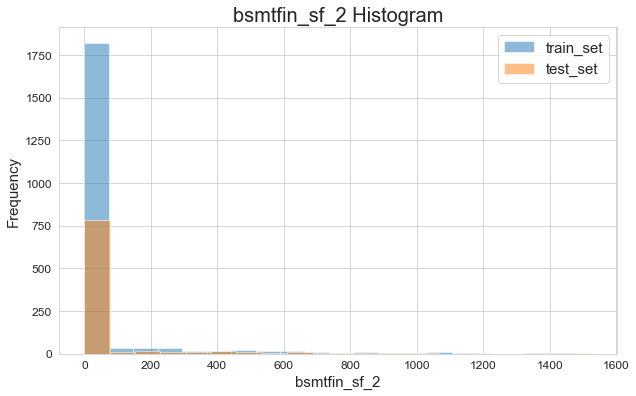

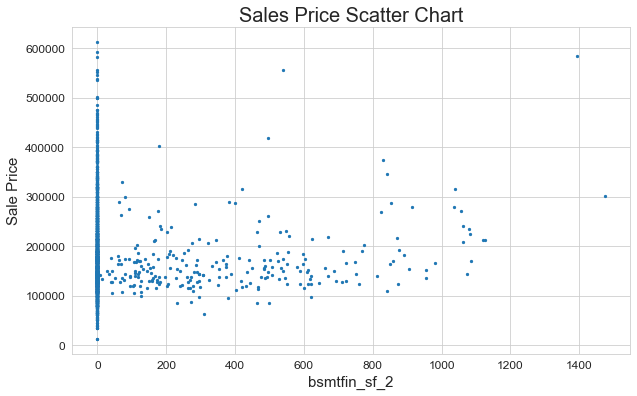

In [114]:
var_hist_scatter("bsmtfin_sf_2")

In [115]:
train_set['bsmtfin_sf_2'].describe()

count    2046.000000
mean       47.818671
std       164.876627
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1474.000000
Name: bsmtfin_sf_2, dtype: float64

In [116]:
test_set['bsmtfin_sf_2'].describe()

count     879.000000
mean       53.835040
std       178.539854
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1526.000000
Name: bsmtfin_sf_2, dtype: float64

In [117]:
train_set['bsmtfin_sf_2'].value_counts()

0.0      1800
294.0       5
162.0       3
483.0       3
180.0       3
         ... 
174.0       1
154.0       1
278.0       1
230.0       1
522.0       1
Name: bsmtfin_sf_2, Length: 204, dtype: int64

In [118]:
test_set['bsmtfin_sf_2'].value_counts()

0      775
147      2
435      2
287      2
480      2
      ... 
543      1
544      1
606      1
627      1
393      1
Name: bsmtfin_sf_2, Length: 96, dtype: int64

In [119]:
train_set['bsmtfin_sf_2'].isnull().value_counts()

False    2046
True        1
Name: bsmtfin_sf_2, dtype: int64

In [120]:
test_set['bsmtfin_sf_2'].isnull().value_counts()

False    879
Name: bsmtfin_sf_2, dtype: int64

In [121]:
train_set[train_set["bsmtfin_sf_2"].isnull()]

id        pid  ms_subclass ms_zoning  lot_area street lot_shape  \
1327  1342  903230120           20        RM      5940   Pave       IR1   

     land_contour utilities lot_config land_slope neighborhood condition_1  \
1327          Lvl    AllPub        FR3        Gtl      BrkSide       Feedr   

     condition_2 bldg_type house_style  overall_qual  overall_cond  \
1327        Norm      1Fam      1Story             4             7   

      year_built  year_remod/add roof_style roof_matl exterior_1st  \
1327        1946            1950      Gable   CompShg      MetalSd   

     exterior_2nd mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation  \
1327       CBlock         None           0.0         TA         TA      PConc   

     bsmt_qual bsmt_cond bsmt_exposure bsmtfin_type_1  bsmtfin_sf_1  \
1327      None      None          None           None           0.0   

     bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf heating  \
1327           None           NaN          NaN            NaN    GasA   

     heating_qc central_air electrical  1st_flr_sf  2nd_flr_sf  \
1327         TA           Y      FuseA         896           0   

      low_qual_fin_sf  gr_liv_area  bsmt_full_bath  bsmt_half_bath  full_bath  \
1327                0          896             NaN             NaN          1   

      half_bath  bedroom_abvgr  kitchen_abvgr kitchen_qual  totrms_abvgrd  \
1327          0              2              1           TA              4   

     functional  fireplaces fireplace_qu garage_type  garage_yr_blt  \
1327        Typ           0          NaN      Detchd         1946.0   

     garage_finish  garage_cars  garage_area garage_qual garage_cond  \
1327           Unf          1.0        280.0          TA          TA   

     paved_drive  wood_deck_sf  open_porch_sf  enclosed_porch  3ssn_porch  \
1327           Y             0              0               0           0   

      screen_porch  pool_area pool_qc  fence misc_feature  misc_val  mo_sold  \
1327             0          0     NaN  MnPrv          NaN         0        4   

      yr_sold sale_type  saleprice  
1327     2008     ConLD      79000

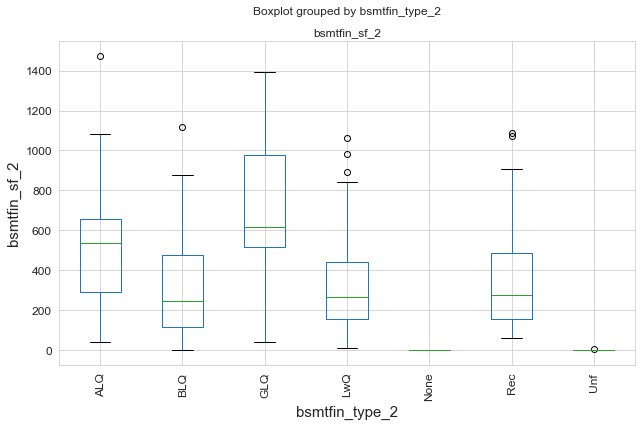

In [122]:
train_set.boxplot(by='bsmtfin_type_2', column=['bsmtfin_sf_2'], figsize = (10,6), rot=90);

plt.xticks(fontsize=12);
plt.yticks(fontsize=12);
plt.xlabel("bsmtfin_type_2", fontsize=15)
plt.ylabel("bsmtfin_sf_2", fontsize=15);

In [123]:
# replace nulls to 0
train_set['bsmtfin_sf_2'] = train_set['bsmtfin_sf_2'].map(lambda cell: 0 if pd.isnull(cell) else cell)

## <font color='green'>bsmt_unf_sf: Unfinished square feet of basement area</font>

#### <font color='green'>Train set has 1 null and 0 values for bsmt_qual = NA / Test set has no null</font>
#### <font color='green'>Replace null with 0 since it's bsmt_qual = NA</font>

/Users/chuahb/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/chuahb/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


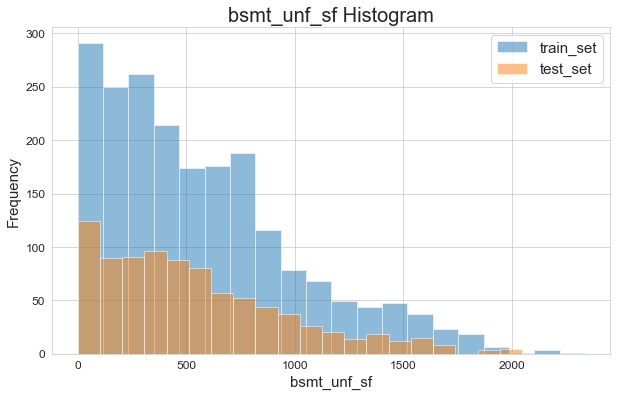

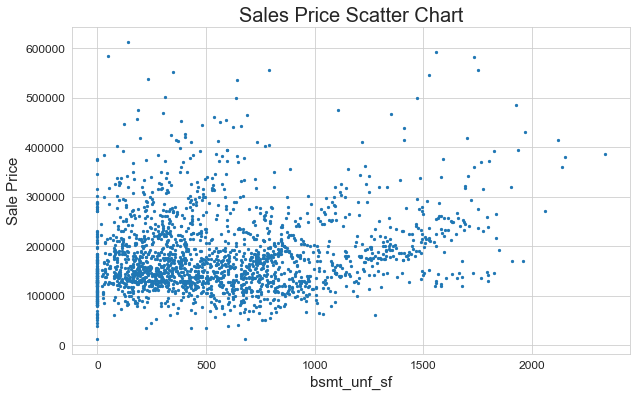

In [124]:
var_hist_scatter("bsmt_unf_sf")

In [125]:
train_set['bsmt_unf_sf'].describe()

count    2046.000000
mean      566.463343
std       444.130462
min         0.000000
25%       220.000000
50%       474.000000
75%       810.000000
max      2336.000000
Name: bsmt_unf_sf, dtype: float64

In [126]:
test_set['bsmt_unf_sf'].describe()

count     879.000000
mean      539.518771
std       426.082726
min         0.000000
25%       216.000000
50%       453.000000
75%       781.500000
max      2046.000000
Name: bsmt_unf_sf, dtype: float64

In [127]:
train_set['bsmt_unf_sf'].value_counts()

0.0       165
384.0      14
672.0      11
728.0      10
216.0       9
         ... 
1257.0      1
1296.0      1
718.0       1
262.0       1
1614.0      1
Name: bsmt_unf_sf, Length: 966, dtype: int64

In [128]:
test_set['bsmt_unf_sf'].value_counts()

0      79
270     7
396     5
840     5
572     5
       ..
567     1
569     1
575     1
576     1
439     1
Name: bsmt_unf_sf, Length: 563, dtype: int64

In [129]:
train_set['bsmt_unf_sf'].isnull().value_counts()

False    2046
True        1
Name: bsmt_unf_sf, dtype: int64

In [130]:
test_set['bsmt_unf_sf'].isnull().value_counts()

False    879
Name: bsmt_unf_sf, dtype: int64

In [131]:
train_set[train_set["bsmt_unf_sf"].isnull()]

id        pid  ms_subclass ms_zoning  lot_area street lot_shape  \
1327  1342  903230120           20        RM      5940   Pave       IR1   

     land_contour utilities lot_config land_slope neighborhood condition_1  \
1327          Lvl    AllPub        FR3        Gtl      BrkSide       Feedr   

     condition_2 bldg_type house_style  overall_qual  overall_cond  \
1327        Norm      1Fam      1Story             4             7   

      year_built  year_remod/add roof_style roof_matl exterior_1st  \
1327        1946            1950      Gable   CompShg      MetalSd   

     exterior_2nd mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation  \
1327       CBlock         None           0.0         TA         TA      PConc   

     bsmt_qual bsmt_cond bsmt_exposure bsmtfin_type_1  bsmtfin_sf_1  \
1327      None      None          None           None           0.0   

     bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf heating  \
1327           None           0.0          NaN            NaN    GasA   

     heating_qc central_air electrical  1st_flr_sf  2nd_flr_sf  \
1327         TA           Y      FuseA         896           0   

      low_qual_fin_sf  gr_liv_area  bsmt_full_bath  bsmt_half_bath  full_bath  \
1327                0          896             NaN             NaN          1   

      half_bath  bedroom_abvgr  kitchen_abvgr kitchen_qual  totrms_abvgrd  \
1327          0              2              1           TA              4   

     functional  fireplaces fireplace_qu garage_type  garage_yr_blt  \
1327        Typ           0          NaN      Detchd         1946.0   

     garage_finish  garage_cars  garage_area garage_qual garage_cond  \
1327           Unf          1.0        280.0          TA          TA   

     paved_drive  wood_deck_sf  open_porch_sf  enclosed_porch  3ssn_porch  \
1327           Y             0              0               0           0   

      screen_porch  pool_area pool_qc  fence misc_feature  misc_val  mo_sold  \
1327             0          0     NaN  MnPrv          NaN         0        4   

      yr_sold sale_type  saleprice  
1327     2008     ConLD      79000

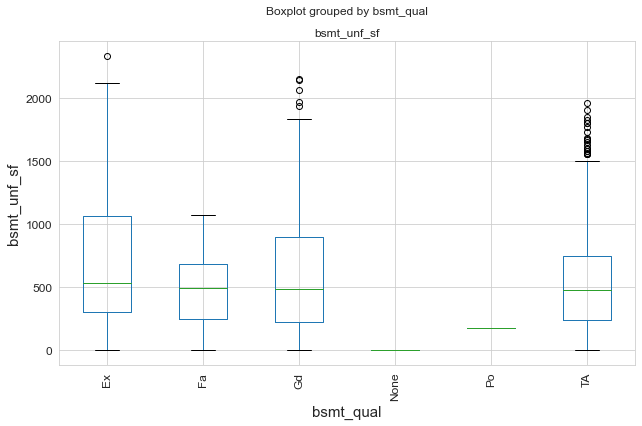

In [132]:
train_set.boxplot(by='bsmt_qual', column=['bsmt_unf_sf'], figsize = (10,6), rot=90);

plt.xticks(fontsize=12);
plt.yticks(fontsize=12);
plt.xlabel("bsmt_qual", fontsize=15)
plt.ylabel("bsmt_unf_sf", fontsize=15);

In [133]:
# replace nulls to 0
train_set['bsmt_unf_sf'] = train_set['bsmt_unf_sf'].map(lambda cell: 0 if pd.isnull(cell) else cell)

## <font color='green'>total_bsmt_sf: Total square feet of basement area</font>

#### <font color='green'>Train set has 1 null and 0 values for bsmt_qual = NA / Test set has no null</font>
#### <font color='green'>Replace null with 0 since it's bsmt_qual = NA</font>

/Users/chuahb/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/chuahb/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


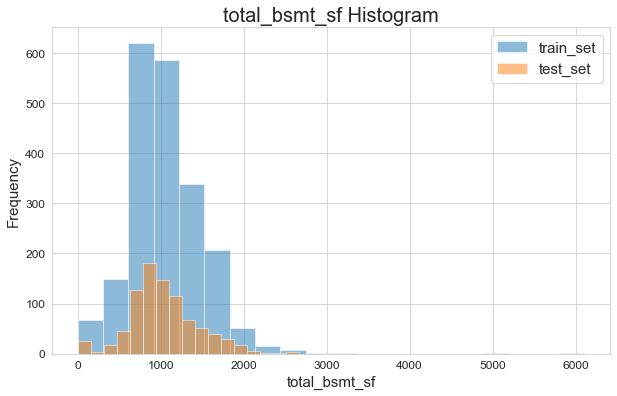

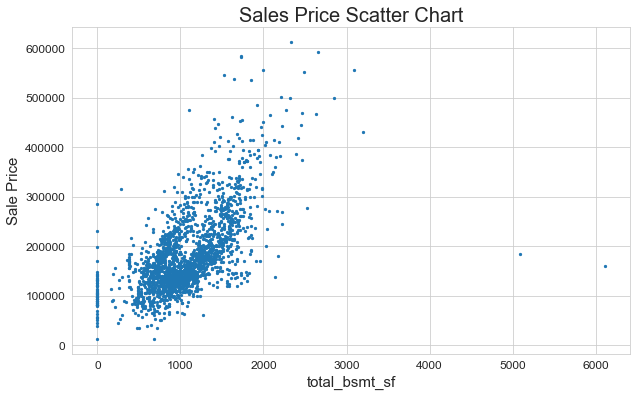

In [134]:
var_hist_scatter("total_bsmt_sf")

In [135]:
train_set['total_bsmt_sf'].describe()

count    2046.000000
mean     1056.897849
std       447.107498
min         0.000000
25%       793.000000
50%       994.500000
75%      1317.750000
max      6110.000000
Name: total_bsmt_sf, dtype: float64

In [136]:
test_set['total_bsmt_sf'].describe()

count     879.000000
mean     1036.750853
std       419.258428
min         0.000000
25%       790.000000
50%       975.000000
75%      1248.000000
max      3138.000000
Name: total_bsmt_sf, dtype: float64

In [137]:
train_set['total_bsmt_sf'].value_counts()

0.0       54
864.0     51
672.0     20
1040.0    20
816.0     17
          ..
484.0      1
644.0      1
648.0      1
941.0      1
1719.0     1
Name: total_bsmt_sf, Length: 891, dtype: int64

In [138]:
test_set['total_bsmt_sf'].value_counts()

0       25
864     23
768     10
672      9
780      9
        ..
1657     1
635      1
636      1
1664     1
1553     1
Name: total_bsmt_sf, Length: 527, dtype: int64

In [139]:
train_set['total_bsmt_sf'].isnull().value_counts()

False    2046
True        1
Name: total_bsmt_sf, dtype: int64

In [140]:
test_set['total_bsmt_sf'].isnull().value_counts()

False    879
Name: total_bsmt_sf, dtype: int64

In [141]:
train_set[train_set["total_bsmt_sf"].isnull()]

id        pid  ms_subclass ms_zoning  lot_area street lot_shape  \
1327  1342  903230120           20        RM      5940   Pave       IR1   

     land_contour utilities lot_config land_slope neighborhood condition_1  \
1327          Lvl    AllPub        FR3        Gtl      BrkSide       Feedr   

     condition_2 bldg_type house_style  overall_qual  overall_cond  \
1327        Norm      1Fam      1Story             4             7   

      year_built  year_remod/add roof_style roof_matl exterior_1st  \
1327        1946            1950      Gable   CompShg      MetalSd   

     exterior_2nd mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation  \
1327       CBlock         None           0.0         TA         TA      PConc   

     bsmt_qual bsmt_cond bsmt_exposure bsmtfin_type_1  bsmtfin_sf_1  \
1327      None      None          None           None           0.0   

     bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf heating  \
1327           None           0.0          0.0            NaN    GasA   

     heating_qc central_air electrical  1st_flr_sf  2nd_flr_sf  \
1327         TA           Y      FuseA         896           0   

      low_qual_fin_sf  gr_liv_area  bsmt_full_bath  bsmt_half_bath  full_bath  \
1327                0          896             NaN             NaN          1   

      half_bath  bedroom_abvgr  kitchen_abvgr kitchen_qual  totrms_abvgrd  \
1327          0              2              1           TA              4   

     functional  fireplaces fireplace_qu garage_type  garage_yr_blt  \
1327        Typ           0          NaN      Detchd         1946.0   

     garage_finish  garage_cars  garage_area garage_qual garage_cond  \
1327           Unf          1.0        280.0          TA          TA   

     paved_drive  wood_deck_sf  open_porch_sf  enclosed_porch  3ssn_porch  \
1327           Y             0              0               0           0   

      screen_porch  pool_area pool_qc  fence misc_feature  misc_val  mo_sold  \
1327             0          0     NaN  MnPrv          NaN         0        4   

      yr_sold sale_type  saleprice  
1327     2008     ConLD      79000

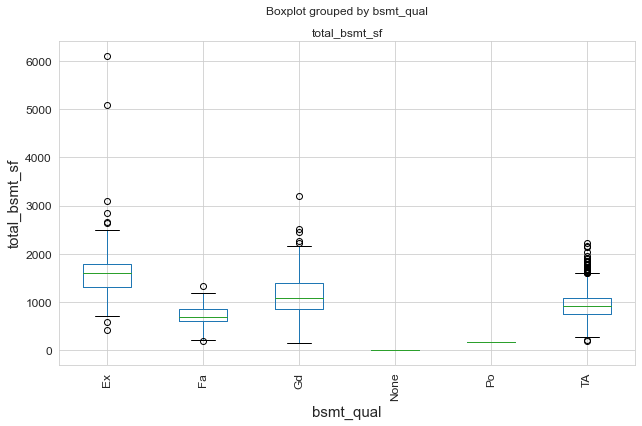

In [142]:
train_set.boxplot(by='bsmt_qual', column=['total_bsmt_sf'], figsize = (10,6), rot=90);

plt.xticks(fontsize=12);
plt.yticks(fontsize=12);
plt.xlabel("bsmt_qual", fontsize=15)
plt.ylabel("total_bsmt_sf", fontsize=15);

In [143]:
# replace nulls to 0
train_set['total_bsmt_sf'] = train_set['total_bsmt_sf'].map(lambda cell: 0 if pd.isnull(cell) else cell)

## <font color='green'>electrical: Electrical system</font>

#### <font color='green'>Train set no null / Test set has one null value</font>
#### <font color='green'>Since there's only one null we change to None</font>

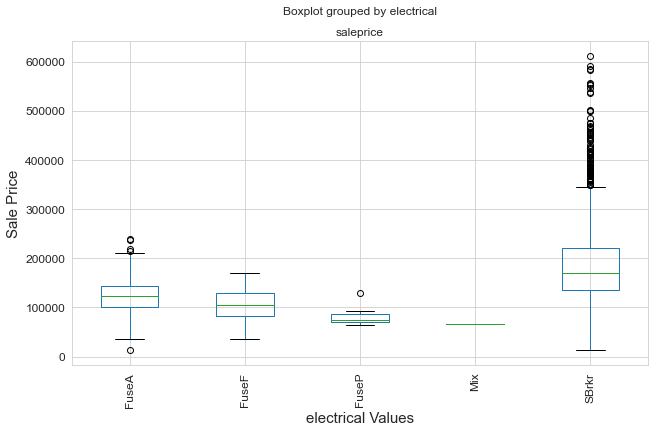

In [144]:
var_boxplot("electrical")

In [145]:
train_set['electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix'], dtype=object)

In [146]:
test_set['electrical'].unique()

array(['FuseP', 'SBrkr', 'FuseA', 'FuseF', nan], dtype=object)

In [147]:
train_set['electrical'].value_counts()

SBrkr    1864
FuseA     140
FuseF      35
FuseP       7
Mix         1
Name: electrical, dtype: int64

In [148]:
test_set['electrical'].value_counts()

SBrkr    814
FuseA     48
FuseF     15
FuseP      1
Name: electrical, dtype: int64

In [149]:
train_set['electrical'].isnull().value_counts()

False    2047
Name: electrical, dtype: int64

In [150]:
test_set['electrical'].isnull().value_counts()

False    878
True       1
Name: electrical, dtype: int64

In [151]:
train_set[train_set["electrical"].isnull()]

Empty DataFrame
Columns: [id, pid, ms_subclass, ms_zoning, lot_area, street, lot_shape, land_contour, utilities, lot_config, land_slope, neighborhood, condition_1, condition_2, bldg_type, house_style, overall_qual, overall_cond, year_built, year_remod/add, roof_style, roof_matl, exterior_1st, exterior_2nd, mas_vnr_type, mas_vnr_area, exter_qual, exter_cond, foundation, bsmt_qual, bsmt_cond, bsmt_exposure, bsmtfin_type_1, bsmtfin_sf_1, bsmtfin_type_2, bsmtfin_sf_2, bsmt_unf_sf, total_bsmt_sf, heating, heating_qc, central_air, electrical, 1st_flr_sf, 2nd_flr_sf, low_qual_fin_sf, gr_liv_area, bsmt_full_bath, bsmt_half_bath, full_bath, half_bath, bedroom_abvgr, kitchen_abvgr, kitchen_qual, totrms_abvgrd, functional, fireplaces, fireplace_qu, garage_type, garage_yr_blt, garage_finish, garage_cars, garage_area, garage_qual, garage_cond, paved_drive, wood_deck_sf, open_porch_sf, enclosed_porch, 3ssn_porch, screen_porch, pool_area, pool_qc, fence, misc_feature, misc_val, mo_sold, yr_sold, sale_type, saleprice]
Index: []

In [152]:
test_set[test_set["electrical"].isnull()]

id        pid  ms_subclass ms_zoning  lot_area street lot_shape  \
635  1578  916386080           80        RL      9735   Pave       Reg   

    land_contour utilities lot_config land_slope neighborhood condition_1  \
635          Lvl    AllPub     Inside        Gtl       Timber        Norm   

    condition_2 bldg_type house_style  overall_qual  overall_cond  year_built  \
635        Norm      1Fam        SLvl             5             5        2006   

     year_remod/add roof_style roof_matl exterior_1st exterior_2nd  \
635            2007      Gable   CompShg      VinylSd      VinylSd   

    mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation bsmt_qual  \
635         None           0.0         TA         TA      PConc        Gd   

    bsmt_cond bsmt_exposure bsmtfin_type_1  bsmtfin_sf_1 bsmtfin_type_2  \
635        TA            No            Unf             0            Unf   

     bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf heating heating_qc central_air  \
635             0          384            384    GasA         Gd           Y   

    electrical  1st_flr_sf  2nd_flr_sf  low_qual_fin_sf  gr_liv_area  \
635        NaN         754         640                0         1394   

     bsmt_full_bath  bsmt_half_bath  full_bath  half_bath  bedroom_abvgr  \
635               0               0          2          1              3   

     kitchen_abvgr kitchen_qual  totrms_abvgrd functional  fireplaces  \
635              1           Gd              7        Typ           0   

    fireplace_qu garage_type  garage_yr_blt garage_finish  garage_cars  \
635          NaN     BuiltIn         2007.0           Fin            2   

     garage_area garage_qual garage_cond paved_drive  wood_deck_sf  \
635          400          TA          TA           Y           100   

     open_porch_sf  enclosed_porch  3ssn_porch  screen_porch  pool_area  \
635              0               0           0             0          0   

    pool_qc fence misc_feature  misc_val  mo_sold  yr_sold sale_type  
635     NaN   NaN          NaN         0        5     2008       WD

In [153]:
# replace nulls to None
test_set['electrical'] = test_set['electrical'].map(lambda cell: "None" if pd.isnull(cell) else cell)

## <font color='green'>bsmt_full_bath: Basement full bathrooms</font>

#### <font color='green'>Train set has 2 null and 0 values for bsmt_qual = NA / Test set has no null</font>
#### <font color='green'>Replace null with 0 since it's bsmt_qual = NA</font>

/Users/chuahb/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/chuahb/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


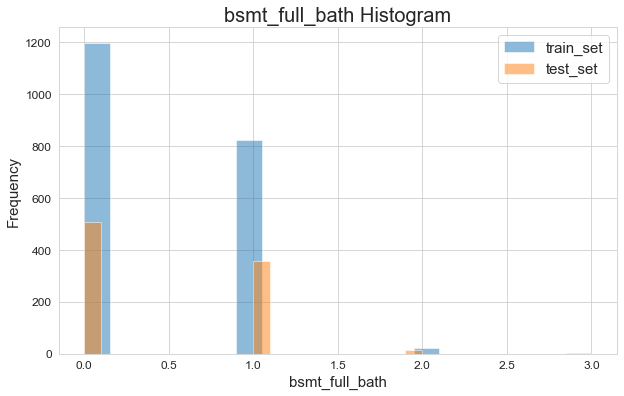

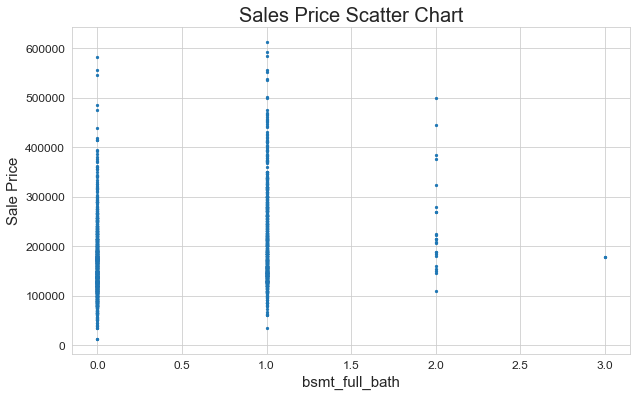

In [154]:
var_hist_scatter("bsmt_full_bath")

In [155]:
train_set['bsmt_full_bath'].describe()

count    2045.000000
mean        0.427873
std         0.522774
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: bsmt_full_bath, dtype: float64

In [156]:
test_set['bsmt_full_bath'].describe()

count    879.000000
mean       0.440273
std        0.529983
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        2.000000
Name: bsmt_full_bath, dtype: float64

In [157]:
train_set['bsmt_full_bath'].value_counts()

0.0    1197
1.0     823
2.0      23
3.0       2
Name: bsmt_full_bath, dtype: int64

In [158]:
test_set['bsmt_full_bath'].value_counts()

0    507
1    357
2     15
Name: bsmt_full_bath, dtype: int64

In [159]:
train_set['bsmt_full_bath'].isnull().value_counts()

False    2045
True        2
Name: bsmt_full_bath, dtype: int64

In [160]:
test_set['bsmt_full_bath'].isnull().value_counts()

False    879
Name: bsmt_full_bath, dtype: int64

In [161]:
train_set[train_set["bsmt_full_bath"].isnull()]

id        pid  ms_subclass ms_zoning  lot_area street lot_shape  \
616   1498  908154080           20        RL     47007   Pave       IR1   
1327  1342  903230120           20        RM      5940   Pave       IR1   

     land_contour utilities lot_config land_slope neighborhood condition_1  \
616           Lvl    AllPub     Inside        Gtl      Edwards        Norm   
1327          Lvl    AllPub        FR3        Gtl      BrkSide       Feedr   

     condition_2 bldg_type house_style  overall_qual  overall_cond  \
616         Norm      1Fam      1Story             5             7   
1327        Norm      1Fam      1Story             4             7   

      year_built  year_remod/add roof_style roof_matl exterior_1st  \
616         1959            1996      Gable   CompShg      Plywood   
1327        1946            1950      Gable   CompShg      MetalSd   

     exterior_2nd mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation  \
616       Plywood         None           0.0         TA         TA       Slab   
1327       CBlock         None           0.0         TA         TA      PConc   

     bsmt_qual bsmt_cond bsmt_exposure bsmtfin_type_1  bsmtfin_sf_1  \
616       None      None          None           None           0.0   
1327      None      None          None           None           0.0   

     bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf heating  \
616            None           0.0          0.0            0.0    GasA   
1327           None           0.0          0.0            0.0    GasA   

     heating_qc central_air electrical  1st_flr_sf  2nd_flr_sf  \
616          TA           Y      SBrkr        3820           0   
1327         TA           Y      FuseA         896           0   

      low_qual_fin_sf  gr_liv_area  bsmt_full_bath  bsmt_half_bath  full_bath  \
616                 0         3820             NaN             NaN          3   
1327                0          896             NaN             NaN          1   

      half_bath  bedroom_abvgr  kitchen_abvgr kitchen_qual  totrms_abvgrd  \
616           1              5              1           Ex             11   
1327          0              2              1           TA              4   

     functional  fireplaces fireplace_qu garage_type  garage_yr_blt  \
616         Typ           2           Gd      Attchd         1959.0   
1327        Typ           0          NaN      Detchd         1946.0   

     garage_finish  garage_cars  garage_area garage_qual garage_cond  \
616            Unf          2.0        624.0          TA          TA   
1327           Unf          1.0        280.0          TA          TA   

     paved_drive  wood_deck_sf  open_porch_sf  enclosed_porch  3ssn_porch  \
616            Y             0            372               0           0   
1327           Y             0              0               0           0   

      screen_porch  pool_area pool_qc  fence misc_feature  misc_val  mo_sold  \
616              0          0     NaN    NaN          NaN         0        7   
1327             0          0     NaN  MnPrv          NaN         0        4   

      yr_sold sale_type  saleprice  
616      2008       WD      284700  
1327     2008     ConLD      79000

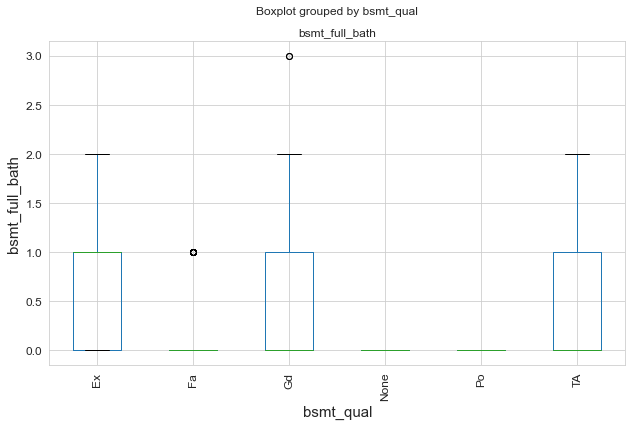

In [162]:
train_set.boxplot(by='bsmt_qual', column=['bsmt_full_bath'], figsize = (10,6), rot=90);

plt.xticks(fontsize=12);
plt.yticks(fontsize=12);
plt.xlabel("bsmt_qual", fontsize=15)
plt.ylabel("bsmt_full_bath", fontsize=15);

In [163]:
# replace nulls to 0
train_set['bsmt_full_bath'] = train_set['bsmt_full_bath'].map(lambda cell: 0 if pd.isnull(cell) else cell)

## <font color='green'>bsmt_half_bath: Basement half bathrooms</font>

#### <font color='green'>Train set has 2 null and 0 values for bsmt_qual = NA / Test set has no null</font>
#### <font color='green'>Replace null with 0 since it's bsmt_qual = NA</font>

/Users/chuahb/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/chuahb/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


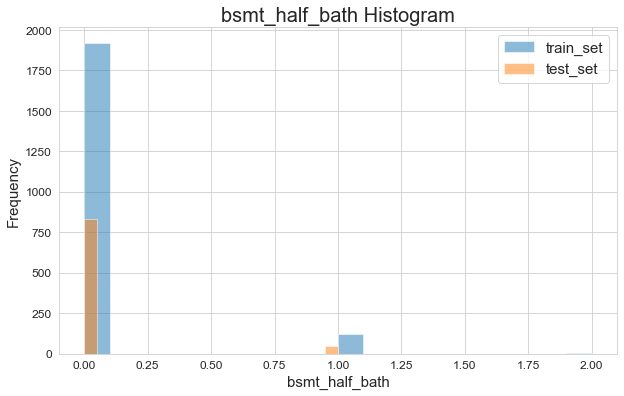

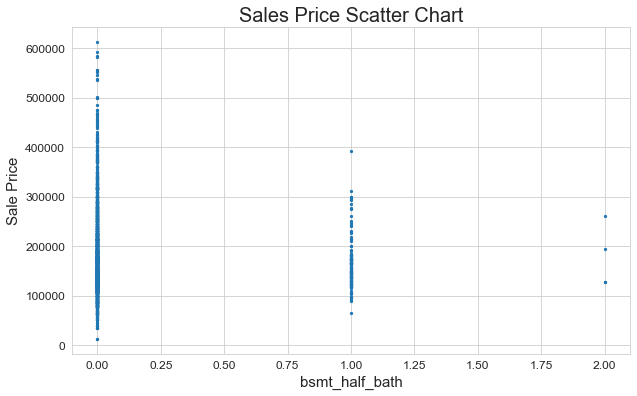

In [164]:
var_hist_scatter("bsmt_half_bath")

In [165]:
train_set['bsmt_half_bath'].describe()

count    2045.000000
mean        0.063570
std         0.251936
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: bsmt_half_bath, dtype: float64

In [166]:
test_set['bsmt_half_bath'].describe()

count    879.000000
mean       0.055745
std        0.229560
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: bsmt_half_bath, dtype: float64

In [167]:
train_set['bsmt_half_bath'].value_counts()

0.0    1919
1.0     122
2.0       4
Name: bsmt_half_bath, dtype: int64

In [168]:
test_set['bsmt_half_bath'].value_counts()

0    830
1     49
Name: bsmt_half_bath, dtype: int64

In [169]:
train_set['bsmt_half_bath'].isnull().value_counts()

False    2045
True        2
Name: bsmt_half_bath, dtype: int64

In [170]:
test_set['bsmt_half_bath'].isnull().value_counts()

False    879
Name: bsmt_half_bath, dtype: int64

In [171]:
train_set[train_set["bsmt_half_bath"].isnull()]

id        pid  ms_subclass ms_zoning  lot_area street lot_shape  \
616   1498  908154080           20        RL     47007   Pave       IR1   
1327  1342  903230120           20        RM      5940   Pave       IR1   

     land_contour utilities lot_config land_slope neighborhood condition_1  \
616           Lvl    AllPub     Inside        Gtl      Edwards        Norm   
1327          Lvl    AllPub        FR3        Gtl      BrkSide       Feedr   

     condition_2 bldg_type house_style  overall_qual  overall_cond  \
616         Norm      1Fam      1Story             5             7   
1327        Norm      1Fam      1Story             4             7   

      year_built  year_remod/add roof_style roof_matl exterior_1st  \
616         1959            1996      Gable   CompShg      Plywood   
1327        1946            1950      Gable   CompShg      MetalSd   

     exterior_2nd mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation  \
616       Plywood         None           0.0         TA         TA       Slab   
1327       CBlock         None           0.0         TA         TA      PConc   

     bsmt_qual bsmt_cond bsmt_exposure bsmtfin_type_1  bsmtfin_sf_1  \
616       None      None          None           None           0.0   
1327      None      None          None           None           0.0   

     bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf heating  \
616            None           0.0          0.0            0.0    GasA   
1327           None           0.0          0.0            0.0    GasA   

     heating_qc central_air electrical  1st_flr_sf  2nd_flr_sf  \
616          TA           Y      SBrkr        3820           0   
1327         TA           Y      FuseA         896           0   

      low_qual_fin_sf  gr_liv_area  bsmt_full_bath  bsmt_half_bath  full_bath  \
616                 0         3820             0.0             NaN          3   
1327                0          896             0.0             NaN          1   

      half_bath  bedroom_abvgr  kitchen_abvgr kitchen_qual  totrms_abvgrd  \
616           1              5              1           Ex             11   
1327          0              2              1           TA              4   

     functional  fireplaces fireplace_qu garage_type  garage_yr_blt  \
616         Typ           2           Gd      Attchd         1959.0   
1327        Typ           0          NaN      Detchd         1946.0   

     garage_finish  garage_cars  garage_area garage_qual garage_cond  \
616            Unf          2.0        624.0          TA          TA   
1327           Unf          1.0        280.0          TA          TA   

     paved_drive  wood_deck_sf  open_porch_sf  enclosed_porch  3ssn_porch  \
616            Y             0            372               0           0   
1327           Y             0              0               0           0   

      screen_porch  pool_area pool_qc  fence misc_feature  misc_val  mo_sold  \
616              0          0     NaN    NaN          NaN         0        7   
1327             0          0     NaN  MnPrv          NaN         0        4   

      yr_sold sale_type  saleprice  
616      2008       WD      284700  
1327     2008     ConLD      79000

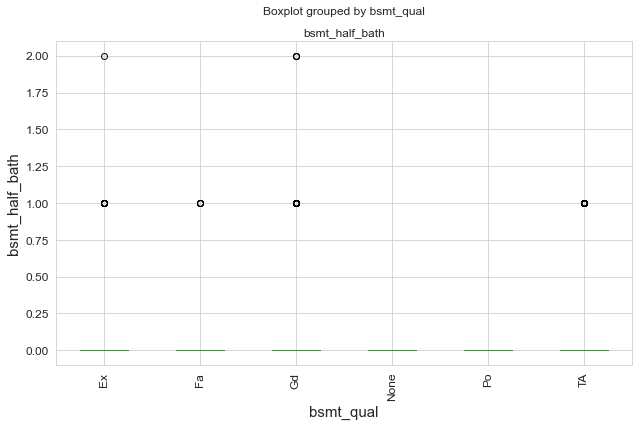

In [172]:
train_set.boxplot(by='bsmt_qual', column=['bsmt_half_bath'], figsize = (10,6), rot=90);

plt.xticks(fontsize=12);
plt.yticks(fontsize=12);
plt.xlabel("bsmt_qual", fontsize=15)
plt.ylabel("bsmt_half_bath", fontsize=15);

In [173]:
# replace nulls to 0
train_set['bsmt_half_bath'] = train_set['bsmt_half_bath'].map(lambda cell: 0 if pd.isnull(cell) else cell)

## <font color='green'>fireplace_qu: Fireplace quality</font>

#### <font color='green'>Train set 49% null / Test set has 48% null value</font>
#### <font color='green'>All rows with fireplaces != 0 has no fireplace_qu != null. All rows with fireplaces = 0 has fireplace_qu = null. We can replace all nulls with NA</font>

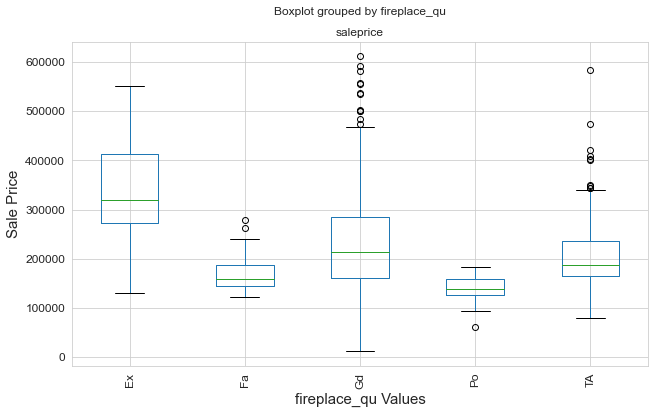

In [174]:
var_boxplot("fireplace_qu")

In [175]:
train_set['fireplace_qu'].unique()

array([nan, 'TA', 'Gd', 'Po', 'Ex', 'Fa'], dtype=object)

In [176]:
test_set['fireplace_qu'].unique()

array([nan, 'Gd', 'Fa', 'TA', 'Po', 'Ex'], dtype=object)

In [177]:
train_set['fireplace_qu'].value_counts()

Gd    521
TA    406
Fa     59
Po     31
Ex     31
Name: fireplace_qu, dtype: int64

In [178]:
test_set['fireplace_qu'].value_counts()

Gd    221
TA    193
Fa     16
Po     15
Ex     12
Name: fireplace_qu, dtype: int64

In [179]:
train_set['fireplace_qu'].isnull().value_counts()

False    1048
True      999
Name: fireplace_qu, dtype: int64

In [180]:
test_set['fireplace_qu'].isnull().value_counts()

False    457
True     422
Name: fireplace_qu, dtype: int64

In [181]:
train_set[train_set["fireplace_qu"].isnull()]

id        pid  ms_subclass ms_zoning  lot_area street lot_shape  \
0      109  533352170           60        RL     13517   Pave       IR1   
2      153  535304180           20        RL      7922   Pave       Reg   
3      318  916386060           60        RL      9802   Pave       Reg   
4      255  906425045           50        RL     14235   Pave       IR1   
6     2827  908186070          180        RM      3675   Pave       Reg   
...    ...        ...          ...       ...       ...    ...       ...   
2034  2775  907175060           20        RL      9236   Pave       IR1   
2038  1892  534401200           80        RL      9200   Pave       Reg   
2039  2288  923228220          160        RM      1495   Pave       Reg   
2044  1140  531382090           60        RL      8453   Pave       IR1   
2047   785  905377130           30        RL     12342   Pave       IR1   

     land_contour utilities lot_config land_slope neighborhood condition_1  \
0             Lvl    AllPub    CulDSac        Gtl       Sawyer        RRAe   
2             Lvl    AllPub     Inside        Gtl        NAmes        Norm   
3             Lvl    AllPub     Inside        Gtl       Timber        Norm   
4             Lvl    AllPub     Inside        Gtl      SawyerW        Norm   
6             Lvl    AllPub     Inside        Gtl      Edwards        Norm   
...           ...       ...        ...        ...          ...         ...   
2034          Lvl    AllPub     Inside        Gtl      CollgCr        Norm   
2038          Lvl    AllPub     Inside        Gtl        NAmes        Norm   
2039          Lvl    AllPub     Inside        Gtl      MeadowV        Norm   
2044          Lvl    AllPub     Inside        Gtl      SawyerW        Norm   
2047          Lvl    AllPub     Inside        Gtl      Edwards        Norm   

     condition_2 bldg_type house_style  overall_qual  overall_cond  \
0           Norm      1Fam      2Story             6             8   
2           Norm      1Fam      1Story             5             7   
3           Norm      1Fam      2Story             5             5   
4           Norm      1Fam      1.5Fin             6             8   
6           Norm    TwnhsE      SFoyer             6             5   
...          ...       ...         ...           ...           ...   
2034        Norm      1Fam      1Story             6             5   
2038        Norm      1Fam        SLvl             6             5   
2039        Norm    TwnhsE      2Story             4             6   
2044        Norm      1Fam      2Story             6             5   
2047        Norm      1Fam      1Story             4             5   

      year_built  year_remod/add roof_style roof_matl exterior_1st  \
0           1976            2005      Gable   CompShg      HdBoard   
2           1953            2007      Gable   CompShg      VinylSd   
3           2006            2007      Gable   CompShg      VinylSd   
4           1900            1993      Gable   CompShg      Wd Sdng   
6           2005            2006      Gable   CompShg      VinylSd   
...          ...             ...        ...       ...          ...   
2034        1997            1997      Gable   CompShg      VinylSd   
2038        1965            1965      Gable   CompShg      HdBoard   
2039        1970            1970      Gable   CompShg      CemntBd   
2044        1995            1995      Gable   CompShg      VinylSd   
2047        1940            1950      Gable   CompShg      VinylSd   

     exterior_2nd mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation  \
0         Plywood      BrkFace         289.0         Gd         TA     CBlock   
2         VinylSd         None           0.0         TA         Gd     CBlock   
3         VinylSd         None           0.0         TA         TA      PConc   
4         Plywood         None           0.0         TA         TA      PConc   
6         VinylSd      BrkFace          82.0         TA         TA      PConc   
..

In [182]:
test_set[test_set["fireplace_qu"].isnull()]

id        pid  ms_subclass ms_zoning  lot_area street lot_shape  \
0    2658  902301120          190        RM      9142   Pave       Reg   
1    2718  905108090           90        RL      9662   Pave       IR1   
3    1989  902207150           30        RM      8520   Pave       Reg   
5     333  923228370          160        RM      1890   Pave       Reg   
6    1327  902427150           20        RM      8516   Pave       Reg   
..    ...        ...          ...       ...       ...    ...       ...   
866   868  907260030           60        RL      8749   Pave       Reg   
869   337  923276250           90        RL      7700   Pave       Reg   
870  2765  906426090           20        RL     36500   Pave       IR1   
873  2806  907401050           20        RL      8810   Pave       Reg   
877  1672  527425140           20        RL      9000   Pave       Reg   

    land_contour utilities lot_config land_slope neighborhood condition_1  \
0            Lvl    AllPub     Inside        Gtl      OldTown        Norm   
1            Lvl    AllPub     Inside        Gtl       Sawyer        Norm   
3            Lvl    AllPub     Inside        Gtl      OldTown        Norm   
5            Lvl    AllPub     Inside        Gtl      MeadowV        Norm   
6            Lvl    AllPub     Inside        Gtl      OldTown        Norm   
..           ...       ...        ...        ...          ...         ...   
866          Lvl    AllPub     Inside        Gtl      CollgCr        Norm   
869          Lvl    AllPub     Inside        Gtl      Mitchel        Norm   
870          Low    AllPub     Inside        Mod      ClearCr        Norm   
873          Lvl    AllPub     Inside        Gtl      CollgCr        Norm   
877          Lvl    AllPub        FR2        Gtl        NAmes        Norm   

    condition_2 bldg_type house_style  overall_qual  overall_cond  year_built  \
0          Norm    2fmCon      2Story             6             8        1910   
1          Norm    Duplex      1Story             5             4        1977   
3          Norm      1Fam      1Story             5             6        1923   
5          Norm    TwnhsE      2Story             4             6        1972   
6          Norm      1Fam      1Story             4             6        1958   
..          ...       ...         ...           ...           ...         ...   
866        Norm      1Fam      2Story             7             5        2002   
869        Norm    Duplex      2Story             5             2        1985   
870        Norm      1Fam      1Story             5             5        1964   
873        Norm      1Fam      1Story             7             5        2003   
877        Norm      1Fam      1Story             4             6        1971   

     year_remod/add roof_style roof_matl exterior_1st exterior_2nd  \
0              1950      Gable   CompShg      AsbShng      AsbShng   
1              1977      Gable   CompShg      Plywood      Plywood   
3              2006      Gable   CompShg      Wd Sdng      Wd Sdng   
5              1972      Gable   CompShg      CemntBd      CmentBd   
6              2006      Gable   CompShg      MetalSd      MetalSd   
..              ...        ...       ...          ...          ...   
866            2002      Gable   CompShg      VinylSd      VinylSd   
869            1986      Gable   CompShg      HdBoard      HdBoard   
870            1964      Gable   CompShg      Wd Sdng      Wd Sdng   
873            2003      Gable   CompShg      VinylSd      VinylSd   
877            1971      Gable   CompShg      HdBoard      HdBoard   

    mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation bsmt_qual  \
0           None           0.0         TA         Fa      Stone        Fa   
1           None           0.0         TA         TA     CBlock        Gd   
3           None           0.0         Gd         TA     CBlock        TA   
5           None           0.0         TA         TA     CBlock        

In [183]:
train_set[train_set['fireplace_qu'].isnull()]["fireplaces"].value_counts()

0    999
Name: fireplaces, dtype: int64

In [184]:
train_set[train_set['fireplace_qu'].notnull()]["fireplaces"].value_counts()

1    895
2    146
3      6
4      1
Name: fireplaces, dtype: int64

In [185]:
test_set[test_set['fireplace_qu'].isnull()]["fireplaces"].value_counts()

0    422
Name: fireplaces, dtype: int64

In [186]:
test_set[test_set['fireplace_qu'].notnull()]["fireplaces"].value_counts()

1    376
2     75
3      6
Name: fireplaces, dtype: int64

In [187]:
# replace nulls to None
train_set['fireplace_qu'] = train_set['fireplace_qu'].map(lambda cell: "None" if pd.isnull(cell) else cell)
test_set['fireplace_qu'] = test_set['fireplace_qu'].map(lambda cell: "None" if pd.isnull(cell) else cell)

## <font color='green'>garage_type: Garage location</font>

#### <font color='green'>Train set 5.6% null / Test set has 5% null value. Both sets have ZERO NA</font>
#### <font color='green'>All rows with garage_finish != null has garage_type != null. All rows with garage_finish = null has no garage_type = null. We can replace all nulls with NA</font>

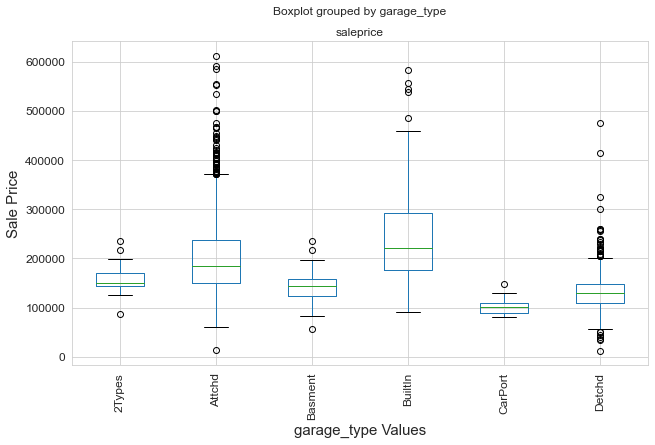

In [188]:
var_boxplot("garage_type")

In [189]:
train_set['garage_type'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'Basment', nan, '2Types', 'CarPort'],
      dtype=object)

In [190]:
test_set['garage_type'].unique()

array(['Detchd', 'Attchd', 'BuiltIn', nan, '2Types', 'CarPort', 'Basment'],
      dtype=object)

In [191]:
train_set['garage_type'].value_counts()

Attchd     1209
Detchd      536
BuiltIn     132
Basment      27
2Types       19
CarPort      11
Name: garage_type, dtype: int64

In [192]:
test_set['garage_type'].value_counts()

Attchd     518
Detchd     246
BuiltIn     54
Basment      9
2Types       4
CarPort      4
Name: garage_type, dtype: int64

In [193]:
train_set['garage_type'].isnull().value_counts(normalize=True)

False    0.944797
True     0.055203
Name: garage_type, dtype: float64

In [194]:
test_set['garage_type'].isnull().value_counts()

False    835
True      44
Name: garage_type, dtype: int64

In [195]:
train_set[train_set["garage_type"].isnull()]

id        pid  ms_subclass ms_zoning  lot_area street lot_shape  \
28    2243  911103060          190   C (all)      8250   Pave       Reg   
53     330  923226250          160        RM      1476   Pave       Reg   
65    2278  923202134           20        RL      8402   Pave       Reg   
79    2235  910201050           50        RM      7288   Pave       Reg   
101   2084  905476170           30        RL      9098   Pave       IR1   
...    ...        ...          ...       ...       ...    ...       ...   
1991   325  923204150           90        RL      9400   Pave       Reg   
2010  2880  911175410           30   C (all)     12366   Pave       Reg   
2027  2628  535456010           90        RL      8512   Pave       Reg   
2039  2288  923228220          160        RM      1495   Pave       Reg   
2042  2842  909101080           50        RL      8248   Pave       Reg   

     land_contour utilities lot_config land_slope neighborhood condition_1  \
28            Lvl    AllPub     Inside        Gtl       IDOTRR       Feedr   
53            Lvl    AllPub     Inside        Gtl      MeadowV        Norm   
65            Lvl    AllPub     Inside        Gtl      Mitchel       Feedr   
79            Lvl    AllPub     Inside        Gtl       IDOTRR      Artery   
101           Lvl    AllPub     Inside        Gtl      Edwards        Norm   
...           ...       ...        ...        ...          ...         ...   
1991          Low    AllPub     Corner        Gtl      Mitchel        Norm   
2010          Lvl    AllPub     Inside        Gtl       IDOTRR       Feedr   
2027          Lvl    AllPub     Corner        Gtl        NAmes        Norm   
2039          Lvl    AllPub     Inside        Gtl      MeadowV        Norm   
2042          Lvl    AllPub     Inside        Gtl      Edwards        Norm   

     condition_2 bldg_type house_style  overall_qual  overall_cond  \
28          Norm    2fmCon      2Story             5             6   
53          Norm     Twnhs      2Story             4             7   
65          Norm      1Fam      1Story             5             5   
79          Norm      1Fam      1.5Fin             5             7   
101         Norm      1Fam      1Story             4             7   
...          ...       ...         ...           ...           ...   
1991        Norm    Duplex      2Story             6             5   
2010        Norm      1Fam      1Story             3             5   
2027        Norm    Duplex      1Story             5             5   
2039        Norm    TwnhsE      2Story             4             6   
2042        Norm      1Fam      1.5Fin             4             4   

      year_built  year_remod/add roof_style roof_matl exterior_1st  \
28          1895            2006      Gable   CompShg      VinylSd   
53          1970            1970      Gable   CompShg      CemntBd   
65          2007            2007      Gable   CompShg      VinylSd   
79          1925            2003      Gable   CompShg      VinylSd   
101         1920            2002      Gable   CompShg      Wd Sdng   
...          ...             ...        ...       ...          ...   
1991        1971            1971    Mansard   CompShg      MetalSd   
2010        1945            1950      Gable   CompShg      Wd Sdng   
2027        1960            1960        Hip   CompShg      BrkFace   
2039        1970            1970      Gable   CompShg      CemntBd   
2042        1922            1950      Gable   CompShg      Wd Sdng   

     exterior_2nd mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation  \
28        VinylSd         None           0.0         TA         Gd     CBlock   
53        CmentBd         None           0.0         TA         TA     CBlock   
65        VinylSd         None           0.0         TA         TA      PConc   
79        VinylSd         None           0.0         Gd         Gd     BrkTil   
101       Wd Sdng         None           0.0         TA         TA     BrkTil   
..

In [196]:
test_set[test_set["garage_type"].isnull()]

id        pid  ms_subclass ms_zoning  lot_area street lot_shape  \
29   1904  534451020           50        RL      3500   Pave       Reg   
45    979  923228150          160        RM      1533   Pave       Reg   
66   2362  527403120           20        RL      8125   Pave       IR1   
68   2188  908226180           30        RH      4270   Pave       Reg   
106  1988  902207010           30        RM      3880   Pave       Reg   
110   217  905101300           90        RL     10773   Pave       Reg   
114  2908  923205120           20        RL     17217   Pave       Reg   
145  1507  908250040           50        RL      8050   Pave       Reg   
153  1368  903476110           50        RM      5586   Pave       IR1   
157   332  923228270          160        RM      1900   Pave       Reg   
181   292  909250030           50        RL      9839   Pave       Reg   
219   760  903481130           85        RM      5160   Pave       Reg   
231  1408  905426030           30        RL     19550   Pave       Reg   
232   331  923226320          180        RM      1491   Pave       Reg   
257   171  902104060           50        RM      8800   Pave       Reg   
283  2304  923400150           20        RL     10712   Pave       Reg   
306  1388  905200160           20        RL      9000   Pave       Reg   
315   291  909177100           90        RH      7200   Pave       Reg   
321  2680  903232170           50        RM      6240   Pave       Reg   
338  1943  535353160           50        RL     14190   Pave       Reg   
342   704  902134120           50        RM     10134   Pave       Reg   
351   758  903476090          190        RM      5852   Pave       IR3   
360  2232  910200040           50        RM      8500   Pave       Reg   
396   721  902331010           30   C (all)      3300   Pave       Reg   
483  2917  923228130          180        RM      1533   Pave       Reg   
497   212  904302260          190        RL      9900   Pave       Reg   
528   276  908102130           90        RL      9825   Pave       Reg   
530   663  535383060           30        RL      5400   Pave       Reg   
537  2919  923228210          160        RM      1526   Pave       Reg   
556  2043  903476100           45        RM      4388   Pave       IR1   
567   541  531375090           20        RL     13072   Pave       Reg   
592  2297  923230120           85        RL      6723   Pave       Reg   
597  1315  902306120           70        RM      6000   Pave       Reg   
611  1506  908226120           50        RL     12180   Pave       Reg   
616   743  903231060           30        RM      6120   Pave       Reg   
619  2185  908204180           90        RL      6882   Pave       Reg   
630  2473  531375060           20        RL     13072   Pave       Reg   
675  2928  923400125           85        RL     10441   Pave       Reg   
699  1412  905452070           90        RL      9350   Pave       Reg   
712   713  902300090          190        RM      4456   Pave       Reg   
780  2196  909176170           90        RL     10890   Pave       Reg   
804   214  904351040           70   C (all)      6449   Pave       IR1   
814   126  534427010           90        RL     13260   Pave       IR1   
860   984  923275140           20        RL      8780   Pave       IR1   

    land_contour utilities lot_config land_slope neighborhood condition_1  \
29           Lvl    AllPub     Inside        Gtl      BrkSide       Feedr   
45           Lvl    AllPub     Inside        Gtl      MeadowV        Norm   
66           Lvl    AllPub     Corner        Gtl        NAmes        Norm   
68           Bnk    AllPub     Inside        Mod      Edwards        Norm   
106          Lvl    AllPub     Inside        Gtl      OldTown        Norm   
110          Lvl    AllPub     Inside        Gtl       Sawyer        Norm   
114          Lvl    AllPub     Inside        Gtl      Mitchel        Norm   
145          Lvl    AllPub     Inside        Gtl      Edward

In [197]:
train_set[train_set['garage_type'].isnull()]["garage_finish"].value_counts()

Series([], Name: garage_finish, dtype: int64)

In [198]:
train_set[train_set['garage_type'].notnull()]["garage_finish"].value_counts()

Unf    848
RFn    576
Fin    509
Name: garage_finish, dtype: int64

In [199]:
test_set[test_set['garage_type'].isnull()]["garage_finish"].value_counts()

Series([], Name: garage_finish, dtype: int64)

In [200]:
test_set[test_set['garage_type'].notnull()]["garage_finish"].value_counts()

Unf    382
RFn    233
Fin    219
Name: garage_finish, dtype: int64

In [201]:
# replace nulls to None
train_set['garage_type'] = train_set['garage_type'].map(lambda cell: "None" if pd.isnull(cell) else cell)
test_set['garage_type'] = test_set['garage_type'].map(lambda cell: "None" if pd.isnull(cell) else cell)

## <font color='green'>garage_yr_blt: Year garage was built</font>

#### <font color='green'>Train set has 5.5% null / Test set has 5.1% null</font>
#### <font color='green'>Replace null with 0 if garage_type = NA. There are 1 row each from Train and Test sets that have garage_type != 'NA" but has null garage_yr_blt. We delete these rows</font>

/Users/chuahb/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/chuahb/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


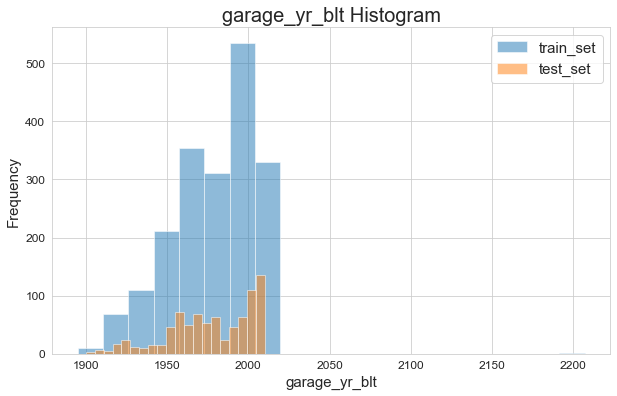

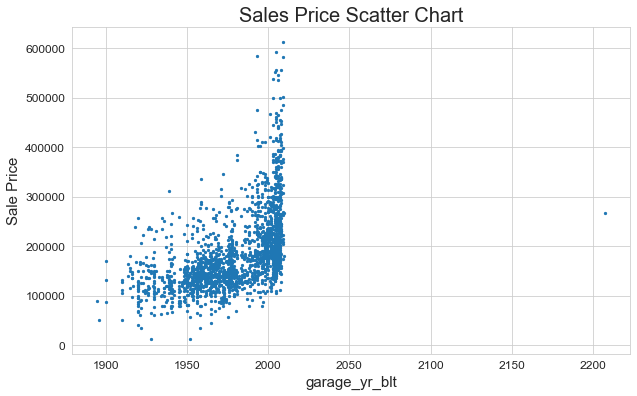

In [202]:
var_hist_scatter("garage_yr_blt")

In [203]:
train_set['garage_yr_blt'].describe()

count    1933.000000
mean     1978.654941
std        25.440680
min      1895.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2207.000000
Name: garage_yr_blt, dtype: float64

In [204]:
test_set['garage_yr_blt'].describe()

count     834.000000
mean     1976.796163
std        25.695683
min      1900.000000
25%      1960.000000
50%      1978.000000
75%      2001.000000
max      2010.000000
Name: garage_yr_blt, dtype: float64

In [205]:
train_set['garage_yr_blt'].value_counts()

2005.0    104
2007.0     83
2006.0     80
2004.0     72
2003.0     65
         ... 
1917.0      1
1918.0      1
1919.0      1
1895.0      1
1896.0      1
Name: garage_yr_blt, Length: 100, dtype: int64

In [206]:
test_set['garage_yr_blt'].value_counts()

2005.0    37
2006.0    35
2007.0    31
2004.0    27
2003.0    26
          ..
1916.0     1
1927.0     1
1931.0     1
1928.0     1
1921.0     1
Name: garage_yr_blt, Length: 93, dtype: int64

In [207]:
train_set['garage_yr_blt'].isnull().value_counts()

False    1933
True      114
Name: garage_yr_blt, dtype: int64

In [208]:
test_set['garage_yr_blt'].isnull().value_counts()

False    834
True      45
Name: garage_yr_blt, dtype: int64

In [209]:
train_set[train_set["garage_yr_blt"].isnull()]

id        pid  ms_subclass ms_zoning  lot_area street lot_shape  \
28    2243  911103060          190   C (all)      8250   Pave       Reg   
53     330  923226250          160        RM      1476   Pave       Reg   
65    2278  923202134           20        RL      8402   Pave       Reg   
79    2235  910201050           50        RM      7288   Pave       Reg   
101   2084  905476170           30        RL      9098   Pave       IR1   
...    ...        ...          ...       ...       ...    ...       ...   
1991   325  923204150           90        RL      9400   Pave       Reg   
2010  2880  911175410           30   C (all)     12366   Pave       Reg   
2027  2628  535456010           90        RL      8512   Pave       Reg   
2039  2288  923228220          160        RM      1495   Pave       Reg   
2042  2842  909101080           50        RL      8248   Pave       Reg   

     land_contour utilities lot_config land_slope neighborhood condition_1  \
28            Lvl    AllPub     Inside        Gtl       IDOTRR       Feedr   
53            Lvl    AllPub     Inside        Gtl      MeadowV        Norm   
65            Lvl    AllPub     Inside        Gtl      Mitchel       Feedr   
79            Lvl    AllPub     Inside        Gtl       IDOTRR      Artery   
101           Lvl    AllPub     Inside        Gtl      Edwards        Norm   
...           ...       ...        ...        ...          ...         ...   
1991          Low    AllPub     Corner        Gtl      Mitchel        Norm   
2010          Lvl    AllPub     Inside        Gtl       IDOTRR       Feedr   
2027          Lvl    AllPub     Corner        Gtl        NAmes        Norm   
2039          Lvl    AllPub     Inside        Gtl      MeadowV        Norm   
2042          Lvl    AllPub     Inside        Gtl      Edwards        Norm   

     condition_2 bldg_type house_style  overall_qual  overall_cond  \
28          Norm    2fmCon      2Story             5             6   
53          Norm     Twnhs      2Story             4             7   
65          Norm      1Fam      1Story             5             5   
79          Norm      1Fam      1.5Fin             5             7   
101         Norm      1Fam      1Story             4             7   
...          ...       ...         ...           ...           ...   
1991        Norm    Duplex      2Story             6             5   
2010        Norm      1Fam      1Story             3             5   
2027        Norm    Duplex      1Story             5             5   
2039        Norm    TwnhsE      2Story             4             6   
2042        Norm      1Fam      1.5Fin             4             4   

      year_built  year_remod/add roof_style roof_matl exterior_1st  \
28          1895            2006      Gable   CompShg      VinylSd   
53          1970            1970      Gable   CompShg      CemntBd   
65          2007            2007      Gable   CompShg      VinylSd   
79          1925            2003      Gable   CompShg      VinylSd   
101         1920            2002      Gable   CompShg      Wd Sdng   
...          ...             ...        ...       ...          ...   
1991        1971            1971    Mansard   CompShg      MetalSd   
2010        1945            1950      Gable   CompShg      Wd Sdng   
2027        1960            1960        Hip   CompShg      BrkFace   
2039        1970            1970      Gable   CompShg      CemntBd   
2042        1922            1950      Gable   CompShg      Wd Sdng   

     exterior_2nd mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation  \
28        VinylSd         None           0.0         TA         Gd     CBlock   
53        CmentBd         None           0.0         TA         TA     CBlock   
65        VinylSd         None           0.0         TA         TA      PConc   
79        VinylSd         None           0.0         Gd         Gd     BrkTil   
101       Wd Sdng         None           0.0         TA         TA     BrkTil   
..

In [210]:
test_set[test_set["garage_yr_blt"].isnull()]

id        pid  ms_subclass ms_zoning  lot_area street lot_shape  \
29   1904  534451020           50        RL      3500   Pave       Reg   
45    979  923228150          160        RM      1533   Pave       Reg   
66   2362  527403120           20        RL      8125   Pave       IR1   
68   2188  908226180           30        RH      4270   Pave       Reg   
106  1988  902207010           30        RM      3880   Pave       Reg   
110   217  905101300           90        RL     10773   Pave       Reg   
114  2908  923205120           20        RL     17217   Pave       Reg   
145  1507  908250040           50        RL      8050   Pave       Reg   
153  1368  903476110           50        RM      5586   Pave       IR1   
157   332  923228270          160        RM      1900   Pave       Reg   
181   292  909250030           50        RL      9839   Pave       Reg   
219   760  903481130           85        RM      5160   Pave       Reg   
231  1408  905426030           30        RL     19550   Pave       Reg   
232   331  923226320          180        RM      1491   Pave       Reg   
257   171  902104060           50        RM      8800   Pave       Reg   
283  2304  923400150           20        RL     10712   Pave       Reg   
306  1388  905200160           20        RL      9000   Pave       Reg   
315   291  909177100           90        RH      7200   Pave       Reg   
321  2680  903232170           50        RM      6240   Pave       Reg   
338  1943  535353160           50        RL     14190   Pave       Reg   
342   704  902134120           50        RM     10134   Pave       Reg   
351   758  903476090          190        RM      5852   Pave       IR3   
360  2232  910200040           50        RM      8500   Pave       Reg   
396   721  902331010           30   C (all)      3300   Pave       Reg   
483  2917  923228130          180        RM      1533   Pave       Reg   
497   212  904302260          190        RL      9900   Pave       Reg   
528   276  908102130           90        RL      9825   Pave       Reg   
530   663  535383060           30        RL      5400   Pave       Reg   
537  2919  923228210          160        RM      1526   Pave       Reg   
556  2043  903476100           45        RM      4388   Pave       IR1   
567   541  531375090           20        RL     13072   Pave       Reg   
592  2297  923230120           85        RL      6723   Pave       Reg   
597  1315  902306120           70        RM      6000   Pave       Reg   
611  1506  908226120           50        RL     12180   Pave       Reg   
616   743  903231060           30        RM      6120   Pave       Reg   
619  2185  908204180           90        RL      6882   Pave       Reg   
630  2473  531375060           20        RL     13072   Pave       Reg   
675  2928  923400125           85        RL     10441   Pave       Reg   
699  1412  905452070           90        RL      9350   Pave       Reg   
712   713  902300090          190        RM      4456   Pave       Reg   
765  1357  903426160           60        RM      8094   Pave       Reg   
780  2196  909176170           90        RL     10890   Pave       Reg   
804   214  904351040           70   C (all)      6449   Pave       IR1   
814   126  534427010           90        RL     13260   Pave       IR1   
860   984  923275140           20        RL      8780   Pave       IR1   

    land_contour utilities lot_config land_slope neighborhood condition_1  \
29           Lvl    AllPub     Inside        Gtl      BrkSide       Feedr   
45           Lvl    AllPub     Inside        Gtl      MeadowV        Norm   
66           Lvl    AllPub     Corner        Gtl        NAmes        Norm   
68           Bnk    AllPub     Inside        Mod      Edwards        Norm   
106          Lvl    AllPub     Inside        Gtl      OldTown        Norm   
110          Lvl    AllPub     Inside        Gtl       Sawyer        Norm   
114          Lvl    AllPub     Inside        Gtl      Mitchel  

In [211]:
# replace nulls to 0
train_set['garage_yr_blt'] = train_set['garage_yr_blt'].map(lambda cell: 0 if pd.isnull(cell) else cell)
test_set['garage_yr_blt'] = test_set['garage_yr_blt'].map(lambda cell: 0 if pd.isnull(cell) else cell)

In [212]:
train_set[(train_set['garage_yr_blt']==0) & (train_set['garage_type'] != "None")]

id        pid  ms_subclass ms_zoning  lot_area street lot_shape  \
1712  2237  910201180           70        RM      9060   Pave       Reg   

     land_contour utilities lot_config land_slope neighborhood condition_1  \
1712          Lvl    AllPub     Inside        Gtl       IDOTRR        Norm   

     condition_2 bldg_type house_style  overall_qual  overall_cond  \
1712        Norm      1Fam      2Story             5             6   

      year_built  year_remod/add roof_style roof_matl exterior_1st  \
1712        1923            1999      Gable   CompShg      Wd Sdng   

     exterior_2nd mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation  \
1712      Plywood         None           0.0         TA         TA     BrkTil   

     bsmt_qual bsmt_cond bsmt_exposure bsmtfin_type_1  bsmtfin_sf_1  \
1712        Gd        TA            No            ALQ         548.0   

     bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf heating  \
1712            Unf           0.0        311.0          859.0    GasA   

     heating_qc central_air electrical  1st_flr_sf  2nd_flr_sf  \
1712         Ex           Y      SBrkr         942         886   

      low_qual_fin_sf  gr_liv_area  bsmt_full_bath  bsmt_half_bath  full_bath  \
1712                0         1828             0.0             0.0          2   

      half_bath  bedroom_abvgr  kitchen_abvgr kitchen_qual  totrms_abvgrd  \
1712          0              3              1           Gd              6   

     functional  fireplaces fireplace_qu garage_type  garage_yr_blt  \
1712        Typ           0         None      Detchd            0.0   

     garage_finish  garage_cars  garage_area garage_qual garage_cond  \
1712           NaN          NaN          NaN         NaN         NaN   

     paved_drive  wood_deck_sf  open_porch_sf  enclosed_porch  3ssn_porch  \
1712           Y           174              0             212           0   

      screen_porch  pool_area pool_qc  fence misc_feature  misc_val  mo_sold  \
1712             0          0     NaN  MnPrv          NaN         0        3   

      yr_sold sale_type  saleprice  
1712     2007       WD      150909

In [213]:
test_set[(test_set['garage_yr_blt']==0) & (test_set['garage_type'] != "None")]

id        pid  ms_subclass ms_zoning  lot_area street lot_shape  \
765  1357  903426160           60        RM      8094   Pave       Reg   

    land_contour utilities lot_config land_slope neighborhood condition_1  \
765          Lvl    AllPub     Inside        Gtl      OldTown        Norm   

    condition_2 bldg_type house_style  overall_qual  overall_cond  year_built  \
765        Norm    2fmCon      2.5Unf             6             8        1910   

     year_remod/add roof_style roof_matl exterior_1st exterior_2nd  \
765            1983      Gable   CompShg      Wd Sdng      Wd Sdng   

    mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation bsmt_qual  \
765         None           0.0         TA         TA      PConc        TA   

    bsmt_cond bsmt_exposure bsmtfin_type_1  bsmtfin_sf_1 bsmtfin_type_2  \
765        TA            Mn            Rec           196            Unf   

     bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf heating heating_qc central_air  \
765             0         1046           1242    GasA         Gd           Y   

    electrical  1st_flr_sf  2nd_flr_sf  low_qual_fin_sf  gr_liv_area  \
765      SBrkr        1242         742                0         1984   

     bsmt_full_bath  bsmt_half_bath  full_bath  half_bath  bedroom_abvgr  \
765               0               0          2          0              5   

     kitchen_abvgr kitchen_qual  totrms_abvgrd functional  fireplaces  \
765              1           TA              8        Typ           0   

    fireplace_qu garage_type  garage_yr_blt garage_finish  garage_cars  \
765         None      Detchd            0.0           NaN            1   

     garage_area garage_qual garage_cond paved_drive  wood_deck_sf  \
765          360         NaN         NaN           Y            64   

     open_porch_sf  enclosed_porch  3ssn_porch  screen_porch  pool_area  \
765              0             180           0             0          0   

    pool_qc  fence misc_feature  misc_val  mo_sold  yr_sold sale_type  
765     NaN  MnPrv         Shed      1000        9     2008       WD

In [214]:
# delete abnormal row from train set only since kaggle cannot accept missing rows
delete_index_list = train_set[(train_set['garage_yr_blt']==0) & (train_set['garage_type'] != "None")].index
train_set.drop(delete_index_list, inplace=True)

## <font color='green'>garage_finish: Interior finish of the garage</font>

#### <font color='green'>Train set 5.6% null / Test set has 5% null value. Both sets have ZERO NA</font>
#### <font color='green'>We can replace all nulls with NA, which matches garage_type = NA</font>

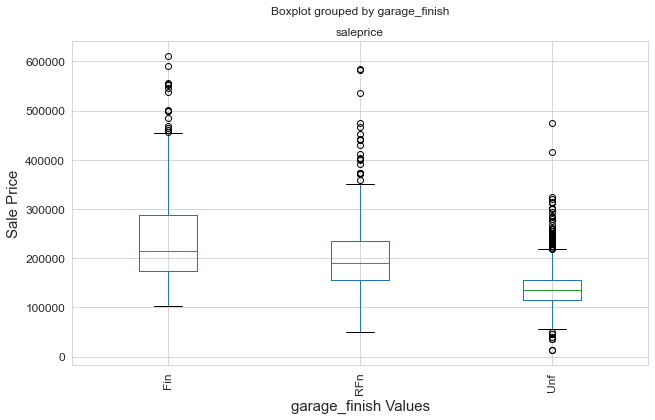

In [215]:
var_boxplot("garage_finish")

In [216]:
train_set['garage_finish'].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [217]:
test_set['garage_finish'].unique()

array(['Unf', 'Fin', 'RFn', nan], dtype=object)

In [218]:
train_set['garage_finish'].value_counts()

Unf    848
RFn    576
Fin    509
Name: garage_finish, dtype: int64

In [219]:
test_set['garage_finish'].value_counts()

Unf    382
RFn    233
Fin    219
Name: garage_finish, dtype: int64

In [220]:
train_set['garage_finish'].isnull().value_counts()

False    1933
True      113
Name: garage_finish, dtype: int64

In [221]:
test_set['garage_finish'].isnull().value_counts()

False    834
True      45
Name: garage_finish, dtype: int64

In [222]:
train_set[train_set["garage_finish"].isnull()]

id        pid  ms_subclass ms_zoning  lot_area street lot_shape  \
28    2243  911103060          190   C (all)      8250   Pave       Reg   
53     330  923226250          160        RM      1476   Pave       Reg   
65    2278  923202134           20        RL      8402   Pave       Reg   
79    2235  910201050           50        RM      7288   Pave       Reg   
101   2084  905476170           30        RL      9098   Pave       IR1   
...    ...        ...          ...       ...       ...    ...       ...   
1991   325  923204150           90        RL      9400   Pave       Reg   
2010  2880  911175410           30   C (all)     12366   Pave       Reg   
2027  2628  535456010           90        RL      8512   Pave       Reg   
2039  2288  923228220          160        RM      1495   Pave       Reg   
2042  2842  909101080           50        RL      8248   Pave       Reg   

     land_contour utilities lot_config land_slope neighborhood condition_1  \
28            Lvl    AllPub     Inside        Gtl       IDOTRR       Feedr   
53            Lvl    AllPub     Inside        Gtl      MeadowV        Norm   
65            Lvl    AllPub     Inside        Gtl      Mitchel       Feedr   
79            Lvl    AllPub     Inside        Gtl       IDOTRR      Artery   
101           Lvl    AllPub     Inside        Gtl      Edwards        Norm   
...           ...       ...        ...        ...          ...         ...   
1991          Low    AllPub     Corner        Gtl      Mitchel        Norm   
2010          Lvl    AllPub     Inside        Gtl       IDOTRR       Feedr   
2027          Lvl    AllPub     Corner        Gtl        NAmes        Norm   
2039          Lvl    AllPub     Inside        Gtl      MeadowV        Norm   
2042          Lvl    AllPub     Inside        Gtl      Edwards        Norm   

     condition_2 bldg_type house_style  overall_qual  overall_cond  \
28          Norm    2fmCon      2Story             5             6   
53          Norm     Twnhs      2Story             4             7   
65          Norm      1Fam      1Story             5             5   
79          Norm      1Fam      1.5Fin             5             7   
101         Norm      1Fam      1Story             4             7   
...          ...       ...         ...           ...           ...   
1991        Norm    Duplex      2Story             6             5   
2010        Norm      1Fam      1Story             3             5   
2027        Norm    Duplex      1Story             5             5   
2039        Norm    TwnhsE      2Story             4             6   
2042        Norm      1Fam      1.5Fin             4             4   

      year_built  year_remod/add roof_style roof_matl exterior_1st  \
28          1895            2006      Gable   CompShg      VinylSd   
53          1970            1970      Gable   CompShg      CemntBd   
65          2007            2007      Gable   CompShg      VinylSd   
79          1925            2003      Gable   CompShg      VinylSd   
101         1920            2002      Gable   CompShg      Wd Sdng   
...          ...             ...        ...       ...          ...   
1991        1971            1971    Mansard   CompShg      MetalSd   
2010        1945            1950      Gable   CompShg      Wd Sdng   
2027        1960            1960        Hip   CompShg      BrkFace   
2039        1970            1970      Gable   CompShg      CemntBd   
2042        1922            1950      Gable   CompShg      Wd Sdng   

     exterior_2nd mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation  \
28        VinylSd         None           0.0         TA         Gd     CBlock   
53        CmentBd         None           0.0         TA         TA     CBlock   
65        VinylSd         None           0.0         TA         TA      PConc   
79        VinylSd         None           0.0         Gd         Gd     BrkTil   
101       Wd Sdng         None           0.0         TA         TA     BrkTil   
..

In [223]:
test_set[test_set["garage_finish"].isnull()]

id        pid  ms_subclass ms_zoning  lot_area street lot_shape  \
29   1904  534451020           50        RL      3500   Pave       Reg   
45    979  923228150          160        RM      1533   Pave       Reg   
66   2362  527403120           20        RL      8125   Pave       IR1   
68   2188  908226180           30        RH      4270   Pave       Reg   
106  1988  902207010           30        RM      3880   Pave       Reg   
110   217  905101300           90        RL     10773   Pave       Reg   
114  2908  923205120           20        RL     17217   Pave       Reg   
145  1507  908250040           50        RL      8050   Pave       Reg   
153  1368  903476110           50        RM      5586   Pave       IR1   
157   332  923228270          160        RM      1900   Pave       Reg   
181   292  909250030           50        RL      9839   Pave       Reg   
219   760  903481130           85        RM      5160   Pave       Reg   
231  1408  905426030           30        RL     19550   Pave       Reg   
232   331  923226320          180        RM      1491   Pave       Reg   
257   171  902104060           50        RM      8800   Pave       Reg   
283  2304  923400150           20        RL     10712   Pave       Reg   
306  1388  905200160           20        RL      9000   Pave       Reg   
315   291  909177100           90        RH      7200   Pave       Reg   
321  2680  903232170           50        RM      6240   Pave       Reg   
338  1943  535353160           50        RL     14190   Pave       Reg   
342   704  902134120           50        RM     10134   Pave       Reg   
351   758  903476090          190        RM      5852   Pave       IR3   
360  2232  910200040           50        RM      8500   Pave       Reg   
396   721  902331010           30   C (all)      3300   Pave       Reg   
483  2917  923228130          180        RM      1533   Pave       Reg   
497   212  904302260          190        RL      9900   Pave       Reg   
528   276  908102130           90        RL      9825   Pave       Reg   
530   663  535383060           30        RL      5400   Pave       Reg   
537  2919  923228210          160        RM      1526   Pave       Reg   
556  2043  903476100           45        RM      4388   Pave       IR1   
567   541  531375090           20        RL     13072   Pave       Reg   
592  2297  923230120           85        RL      6723   Pave       Reg   
597  1315  902306120           70        RM      6000   Pave       Reg   
611  1506  908226120           50        RL     12180   Pave       Reg   
616   743  903231060           30        RM      6120   Pave       Reg   
619  2185  908204180           90        RL      6882   Pave       Reg   
630  2473  531375060           20        RL     13072   Pave       Reg   
675  2928  923400125           85        RL     10441   Pave       Reg   
699  1412  905452070           90        RL      9350   Pave       Reg   
712   713  902300090          190        RM      4456   Pave       Reg   
765  1357  903426160           60        RM      8094   Pave       Reg   
780  2196  909176170           90        RL     10890   Pave       Reg   
804   214  904351040           70   C (all)      6449   Pave       IR1   
814   126  534427010           90        RL     13260   Pave       IR1   
860   984  923275140           20        RL      8780   Pave       IR1   

    land_contour utilities lot_config land_slope neighborhood condition_1  \
29           Lvl    AllPub     Inside        Gtl      BrkSide       Feedr   
45           Lvl    AllPub     Inside        Gtl      MeadowV        Norm   
66           Lvl    AllPub     Corner        Gtl        NAmes        Norm   
68           Bnk    AllPub     Inside        Mod      Edwards        Norm   
106          Lvl    AllPub     Inside        Gtl      OldTown        Norm   
110          Lvl    AllPub     Inside        Gtl       Sawyer        Norm   
114          Lvl    AllPub     Inside        Gtl      Mitchel  

In [224]:
# replace nulls to None
train_set['garage_finish'] = train_set['garage_finish'].map(lambda cell: "None" if pd.isnull(cell) else cell)
test_set['garage_finish'] = test_set['garage_finish'].map(lambda cell: "None" if pd.isnull(cell) else cell)

## <font color='green'>garage_qual: Garage quality</font>

#### <font color='green'>Train set 5.6% null / Test set has 5% null value. Both sets have ZERO NA</font>
#### <font color='green'>We can replace all nulls with NA, which matches garage_type = NA</font>

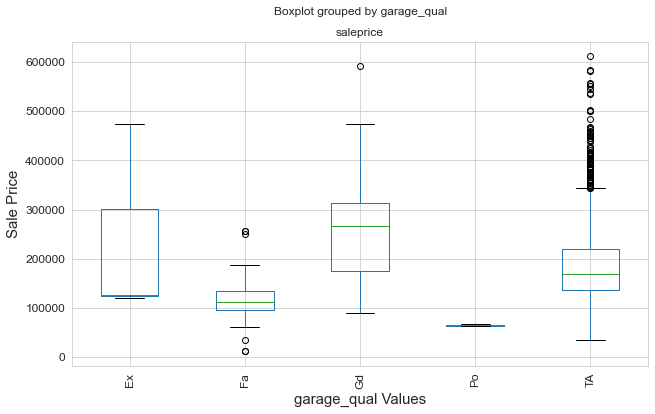

In [225]:
var_boxplot("garage_qual")

In [226]:
train_set['garage_qual'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Ex', 'Po'], dtype=object)

In [227]:
test_set['garage_qual'].unique()

array(['Po', 'TA', 'Fa', nan, 'Gd'], dtype=object)

In [228]:
train_set['garage_qual'].value_counts()

TA    1828
Fa      82
Gd      18
Ex       3
Po       2
Name: garage_qual, dtype: int64

In [229]:
test_set['garage_qual'].value_counts()

TA    783
Fa     42
Gd      6
Po      3
Name: garage_qual, dtype: int64

In [230]:
train_set['garage_qual'].isnull().value_counts()

False    1933
True      113
Name: garage_qual, dtype: int64

In [231]:
test_set['garage_qual'].isnull().value_counts()

False    834
True      45
Name: garage_qual, dtype: int64

In [232]:
train_set[train_set["garage_qual"].isnull()]

id        pid  ms_subclass ms_zoning  lot_area street lot_shape  \
28    2243  911103060          190   C (all)      8250   Pave       Reg   
53     330  923226250          160        RM      1476   Pave       Reg   
65    2278  923202134           20        RL      8402   Pave       Reg   
79    2235  910201050           50        RM      7288   Pave       Reg   
101   2084  905476170           30        RL      9098   Pave       IR1   
...    ...        ...          ...       ...       ...    ...       ...   
1991   325  923204150           90        RL      9400   Pave       Reg   
2010  2880  911175410           30   C (all)     12366   Pave       Reg   
2027  2628  535456010           90        RL      8512   Pave       Reg   
2039  2288  923228220          160        RM      1495   Pave       Reg   
2042  2842  909101080           50        RL      8248   Pave       Reg   

     land_contour utilities lot_config land_slope neighborhood condition_1  \
28            Lvl    AllPub     Inside        Gtl       IDOTRR       Feedr   
53            Lvl    AllPub     Inside        Gtl      MeadowV        Norm   
65            Lvl    AllPub     Inside        Gtl      Mitchel       Feedr   
79            Lvl    AllPub     Inside        Gtl       IDOTRR      Artery   
101           Lvl    AllPub     Inside        Gtl      Edwards        Norm   
...           ...       ...        ...        ...          ...         ...   
1991          Low    AllPub     Corner        Gtl      Mitchel        Norm   
2010          Lvl    AllPub     Inside        Gtl       IDOTRR       Feedr   
2027          Lvl    AllPub     Corner        Gtl        NAmes        Norm   
2039          Lvl    AllPub     Inside        Gtl      MeadowV        Norm   
2042          Lvl    AllPub     Inside        Gtl      Edwards        Norm   

     condition_2 bldg_type house_style  overall_qual  overall_cond  \
28          Norm    2fmCon      2Story             5             6   
53          Norm     Twnhs      2Story             4             7   
65          Norm      1Fam      1Story             5             5   
79          Norm      1Fam      1.5Fin             5             7   
101         Norm      1Fam      1Story             4             7   
...          ...       ...         ...           ...           ...   
1991        Norm    Duplex      2Story             6             5   
2010        Norm      1Fam      1Story             3             5   
2027        Norm    Duplex      1Story             5             5   
2039        Norm    TwnhsE      2Story             4             6   
2042        Norm      1Fam      1.5Fin             4             4   

      year_built  year_remod/add roof_style roof_matl exterior_1st  \
28          1895            2006      Gable   CompShg      VinylSd   
53          1970            1970      Gable   CompShg      CemntBd   
65          2007            2007      Gable   CompShg      VinylSd   
79          1925            2003      Gable   CompShg      VinylSd   
101         1920            2002      Gable   CompShg      Wd Sdng   
...          ...             ...        ...       ...          ...   
1991        1971            1971    Mansard   CompShg      MetalSd   
2010        1945            1950      Gable   CompShg      Wd Sdng   
2027        1960            1960        Hip   CompShg      BrkFace   
2039        1970            1970      Gable   CompShg      CemntBd   
2042        1922            1950      Gable   CompShg      Wd Sdng   

     exterior_2nd mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation  \
28        VinylSd         None           0.0         TA         Gd     CBlock   
53        CmentBd         None           0.0         TA         TA     CBlock   
65        VinylSd         None           0.0         TA         TA      PConc   
79        VinylSd         None           0.0         Gd         Gd     BrkTil   
101       Wd Sdng         None           0.0         TA         TA     BrkTil   
..

In [233]:
test_set[test_set["garage_qual"].isnull()]

id        pid  ms_subclass ms_zoning  lot_area street lot_shape  \
29   1904  534451020           50        RL      3500   Pave       Reg   
45    979  923228150          160        RM      1533   Pave       Reg   
66   2362  527403120           20        RL      8125   Pave       IR1   
68   2188  908226180           30        RH      4270   Pave       Reg   
106  1988  902207010           30        RM      3880   Pave       Reg   
110   217  905101300           90        RL     10773   Pave       Reg   
114  2908  923205120           20        RL     17217   Pave       Reg   
145  1507  908250040           50        RL      8050   Pave       Reg   
153  1368  903476110           50        RM      5586   Pave       IR1   
157   332  923228270          160        RM      1900   Pave       Reg   
181   292  909250030           50        RL      9839   Pave       Reg   
219   760  903481130           85        RM      5160   Pave       Reg   
231  1408  905426030           30        RL     19550   Pave       Reg   
232   331  923226320          180        RM      1491   Pave       Reg   
257   171  902104060           50        RM      8800   Pave       Reg   
283  2304  923400150           20        RL     10712   Pave       Reg   
306  1388  905200160           20        RL      9000   Pave       Reg   
315   291  909177100           90        RH      7200   Pave       Reg   
321  2680  903232170           50        RM      6240   Pave       Reg   
338  1943  535353160           50        RL     14190   Pave       Reg   
342   704  902134120           50        RM     10134   Pave       Reg   
351   758  903476090          190        RM      5852   Pave       IR3   
360  2232  910200040           50        RM      8500   Pave       Reg   
396   721  902331010           30   C (all)      3300   Pave       Reg   
483  2917  923228130          180        RM      1533   Pave       Reg   
497   212  904302260          190        RL      9900   Pave       Reg   
528   276  908102130           90        RL      9825   Pave       Reg   
530   663  535383060           30        RL      5400   Pave       Reg   
537  2919  923228210          160        RM      1526   Pave       Reg   
556  2043  903476100           45        RM      4388   Pave       IR1   
567   541  531375090           20        RL     13072   Pave       Reg   
592  2297  923230120           85        RL      6723   Pave       Reg   
597  1315  902306120           70        RM      6000   Pave       Reg   
611  1506  908226120           50        RL     12180   Pave       Reg   
616   743  903231060           30        RM      6120   Pave       Reg   
619  2185  908204180           90        RL      6882   Pave       Reg   
630  2473  531375060           20        RL     13072   Pave       Reg   
675  2928  923400125           85        RL     10441   Pave       Reg   
699  1412  905452070           90        RL      9350   Pave       Reg   
712   713  902300090          190        RM      4456   Pave       Reg   
765  1357  903426160           60        RM      8094   Pave       Reg   
780  2196  909176170           90        RL     10890   Pave       Reg   
804   214  904351040           70   C (all)      6449   Pave       IR1   
814   126  534427010           90        RL     13260   Pave       IR1   
860   984  923275140           20        RL      8780   Pave       IR1   

    land_contour utilities lot_config land_slope neighborhood condition_1  \
29           Lvl    AllPub     Inside        Gtl      BrkSide       Feedr   
45           Lvl    AllPub     Inside        Gtl      MeadowV        Norm   
66           Lvl    AllPub     Corner        Gtl        NAmes        Norm   
68           Bnk    AllPub     Inside        Mod      Edwards        Norm   
106          Lvl    AllPub     Inside        Gtl      OldTown        Norm   
110          Lvl    AllPub     Inside        Gtl       Sawyer        Norm   
114          Lvl    AllPub     Inside        Gtl      Mitchel  

In [234]:
# replace nulls to None
train_set['garage_qual'] = train_set['garage_qual'].map(lambda cell: "None" if pd.isnull(cell) else cell)
test_set['garage_qual'] = test_set['garage_qual'].map(lambda cell: "None" if pd.isnull(cell) else cell)

## <font color='green'>garage_cond: Garage condition</font>

#### <font color='green'>Train set 5.6% null / Test set has 5% null value. Both sets have ZERO NA</font>
#### <font color='green'>We can replace all nulls with NA, which matches garage_type = NA</font>

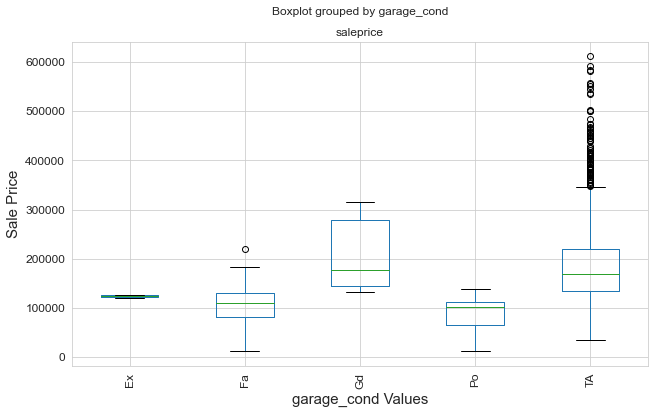

In [235]:
var_boxplot("garage_cond")

In [236]:
train_set['garage_cond'].unique()

array(['TA', 'Fa', nan, 'Po', 'Gd', 'Ex'], dtype=object)

In [237]:
test_set['garage_cond'].unique()

array(['Po', 'TA', nan, 'Fa', 'Gd', 'Ex'], dtype=object)

In [238]:
train_set['garage_cond'].value_counts()

TA    1864
Fa      47
Gd      12
Po       8
Ex       2
Name: garage_cond, dtype: int64

In [239]:
test_set['garage_cond'].value_counts()

TA    797
Fa     27
Po      6
Gd      3
Ex      1
Name: garage_cond, dtype: int64

In [240]:
train_set['garage_cond'].isnull().value_counts()

False    1933
True      113
Name: garage_cond, dtype: int64

In [241]:
test_set['garage_cond'].isnull().value_counts()

False    834
True      45
Name: garage_cond, dtype: int64

In [242]:
train_set[train_set["garage_cond"].isnull()]

id        pid  ms_subclass ms_zoning  lot_area street lot_shape  \
28    2243  911103060          190   C (all)      8250   Pave       Reg   
53     330  923226250          160        RM      1476   Pave       Reg   
65    2278  923202134           20        RL      8402   Pave       Reg   
79    2235  910201050           50        RM      7288   Pave       Reg   
101   2084  905476170           30        RL      9098   Pave       IR1   
...    ...        ...          ...       ...       ...    ...       ...   
1991   325  923204150           90        RL      9400   Pave       Reg   
2010  2880  911175410           30   C (all)     12366   Pave       Reg   
2027  2628  535456010           90        RL      8512   Pave       Reg   
2039  2288  923228220          160        RM      1495   Pave       Reg   
2042  2842  909101080           50        RL      8248   Pave       Reg   

     land_contour utilities lot_config land_slope neighborhood condition_1  \
28            Lvl    AllPub     Inside        Gtl       IDOTRR       Feedr   
53            Lvl    AllPub     Inside        Gtl      MeadowV        Norm   
65            Lvl    AllPub     Inside        Gtl      Mitchel       Feedr   
79            Lvl    AllPub     Inside        Gtl       IDOTRR      Artery   
101           Lvl    AllPub     Inside        Gtl      Edwards        Norm   
...           ...       ...        ...        ...          ...         ...   
1991          Low    AllPub     Corner        Gtl      Mitchel        Norm   
2010          Lvl    AllPub     Inside        Gtl       IDOTRR       Feedr   
2027          Lvl    AllPub     Corner        Gtl        NAmes        Norm   
2039          Lvl    AllPub     Inside        Gtl      MeadowV        Norm   
2042          Lvl    AllPub     Inside        Gtl      Edwards        Norm   

     condition_2 bldg_type house_style  overall_qual  overall_cond  \
28          Norm    2fmCon      2Story             5             6   
53          Norm     Twnhs      2Story             4             7   
65          Norm      1Fam      1Story             5             5   
79          Norm      1Fam      1.5Fin             5             7   
101         Norm      1Fam      1Story             4             7   
...          ...       ...         ...           ...           ...   
1991        Norm    Duplex      2Story             6             5   
2010        Norm      1Fam      1Story             3             5   
2027        Norm    Duplex      1Story             5             5   
2039        Norm    TwnhsE      2Story             4             6   
2042        Norm      1Fam      1.5Fin             4             4   

      year_built  year_remod/add roof_style roof_matl exterior_1st  \
28          1895            2006      Gable   CompShg      VinylSd   
53          1970            1970      Gable   CompShg      CemntBd   
65          2007            2007      Gable   CompShg      VinylSd   
79          1925            2003      Gable   CompShg      VinylSd   
101         1920            2002      Gable   CompShg      Wd Sdng   
...          ...             ...        ...       ...          ...   
1991        1971            1971    Mansard   CompShg      MetalSd   
2010        1945            1950      Gable   CompShg      Wd Sdng   
2027        1960            1960        Hip   CompShg      BrkFace   
2039        1970            1970      Gable   CompShg      CemntBd   
2042        1922            1950      Gable   CompShg      Wd Sdng   

     exterior_2nd mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation  \
28        VinylSd         None           0.0         TA         Gd     CBlock   
53        CmentBd         None           0.0         TA         TA     CBlock   
65        VinylSd         None           0.0         TA         TA      PConc   
79        VinylSd         None           0.0         Gd         Gd     BrkTil   
101       Wd Sdng         None           0.0         TA         TA     BrkTil   
..

In [243]:
test_set[test_set["garage_cond"].isnull()]

id        pid  ms_subclass ms_zoning  lot_area street lot_shape  \
29   1904  534451020           50        RL      3500   Pave       Reg   
45    979  923228150          160        RM      1533   Pave       Reg   
66   2362  527403120           20        RL      8125   Pave       IR1   
68   2188  908226180           30        RH      4270   Pave       Reg   
106  1988  902207010           30        RM      3880   Pave       Reg   
110   217  905101300           90        RL     10773   Pave       Reg   
114  2908  923205120           20        RL     17217   Pave       Reg   
145  1507  908250040           50        RL      8050   Pave       Reg   
153  1368  903476110           50        RM      5586   Pave       IR1   
157   332  923228270          160        RM      1900   Pave       Reg   
181   292  909250030           50        RL      9839   Pave       Reg   
219   760  903481130           85        RM      5160   Pave       Reg   
231  1408  905426030           30        RL     19550   Pave       Reg   
232   331  923226320          180        RM      1491   Pave       Reg   
257   171  902104060           50        RM      8800   Pave       Reg   
283  2304  923400150           20        RL     10712   Pave       Reg   
306  1388  905200160           20        RL      9000   Pave       Reg   
315   291  909177100           90        RH      7200   Pave       Reg   
321  2680  903232170           50        RM      6240   Pave       Reg   
338  1943  535353160           50        RL     14190   Pave       Reg   
342   704  902134120           50        RM     10134   Pave       Reg   
351   758  903476090          190        RM      5852   Pave       IR3   
360  2232  910200040           50        RM      8500   Pave       Reg   
396   721  902331010           30   C (all)      3300   Pave       Reg   
483  2917  923228130          180        RM      1533   Pave       Reg   
497   212  904302260          190        RL      9900   Pave       Reg   
528   276  908102130           90        RL      9825   Pave       Reg   
530   663  535383060           30        RL      5400   Pave       Reg   
537  2919  923228210          160        RM      1526   Pave       Reg   
556  2043  903476100           45        RM      4388   Pave       IR1   
567   541  531375090           20        RL     13072   Pave       Reg   
592  2297  923230120           85        RL      6723   Pave       Reg   
597  1315  902306120           70        RM      6000   Pave       Reg   
611  1506  908226120           50        RL     12180   Pave       Reg   
616   743  903231060           30        RM      6120   Pave       Reg   
619  2185  908204180           90        RL      6882   Pave       Reg   
630  2473  531375060           20        RL     13072   Pave       Reg   
675  2928  923400125           85        RL     10441   Pave       Reg   
699  1412  905452070           90        RL      9350   Pave       Reg   
712   713  902300090          190        RM      4456   Pave       Reg   
765  1357  903426160           60        RM      8094   Pave       Reg   
780  2196  909176170           90        RL     10890   Pave       Reg   
804   214  904351040           70   C (all)      6449   Pave       IR1   
814   126  534427010           90        RL     13260   Pave       IR1   
860   984  923275140           20        RL      8780   Pave       IR1   

    land_contour utilities lot_config land_slope neighborhood condition_1  \
29           Lvl    AllPub     Inside        Gtl      BrkSide       Feedr   
45           Lvl    AllPub     Inside        Gtl      MeadowV        Norm   
66           Lvl    AllPub     Corner        Gtl        NAmes        Norm   
68           Bnk    AllPub     Inside        Mod      Edwards        Norm   
106          Lvl    AllPub     Inside        Gtl      OldTown        Norm   
110          Lvl    AllPub     Inside        Gtl       Sawyer        Norm   
114          Lvl    AllPub     Inside        Gtl      Mitchel  

In [244]:
# replace nulls to None
train_set['garage_cond'] = train_set['garage_cond'].map(lambda cell: "None" if pd.isnull(cell) else cell)
test_set['garage_cond'] = test_set['garage_cond'].map(lambda cell: "None" if pd.isnull(cell) else cell)

## <font color='green'>pool_qc: Pool quality</font>

#### <font color='green'>Train & Test sets have close to 99% null and ZERO NA</font>
#### <font color='green'>We can replace Null with NA which matches row with pool_area = 0</font>

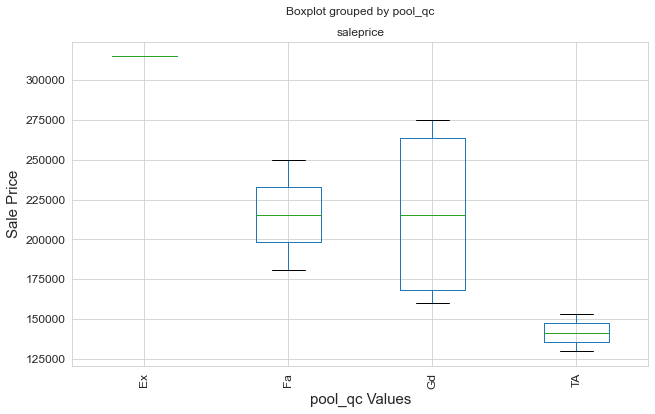

In [245]:
var_boxplot("pool_qc")

In [246]:
train_set['pool_qc'].unique()

array([nan, 'Fa', 'Gd', 'Ex', 'TA'], dtype=object)

In [247]:
test_set['pool_qc'].unique()

array([nan, 'Ex', 'TA'], dtype=object)

In [248]:
train_set['pool_qc'].value_counts()

Gd    4
Fa    2
TA    2
Ex    1
Name: pool_qc, dtype: int64

In [249]:
test_set['pool_qc'].value_counts()

Ex    3
TA    1
Name: pool_qc, dtype: int64

In [250]:
train_set['pool_qc'].isnull().value_counts()

True     2037
False       9
Name: pool_qc, dtype: int64

In [251]:
test_set['pool_qc'].isnull().value_counts()

True     875
False      4
Name: pool_qc, dtype: int64

In [252]:
train_set[train_set["pool_qc"].isnull()]

id        pid  ms_subclass ms_zoning  lot_area street lot_shape  \
0      109  533352170           60        RL     13517   Pave       IR1   
1      544  531379050           60        RL     11492   Pave       IR1   
2      153  535304180           20        RL      7922   Pave       Reg   
3      318  916386060           60        RL      9802   Pave       Reg   
4      255  906425045           50        RL     14235   Pave       IR1   
...    ...        ...          ...       ...       ...    ...       ...   
2046  1587  921126030           20        RL     11449   Pave       IR1   
2047   785  905377130           30        RL     12342   Pave       IR1   
2048   916  909253010           50        RL      7558   Pave       Reg   
2049   639  535179160           20        RL     10400   Pave       Reg   
2050    10  527162130           60        RL      7500   Pave       Reg   

     land_contour utilities lot_config land_slope neighborhood condition_1  \
0             Lvl    AllPub    CulDSac        Gtl       Sawyer        RRAe   
1             Lvl    AllPub    CulDSac        Gtl      SawyerW        Norm   
2             Lvl    AllPub     Inside        Gtl        NAmes        Norm   
3             Lvl    AllPub     Inside        Gtl       Timber        Norm   
4             Lvl    AllPub     Inside        Gtl      SawyerW        Norm   
...           ...       ...        ...        ...          ...         ...   
2046          HLS    AllPub     Inside        Gtl       Timber        Norm   
2047          Lvl    AllPub     Inside        Gtl      Edwards        Norm   
2048          Bnk    AllPub     Inside        Gtl      Crawfor        Norm   
2049          Lvl    AllPub     Corner        Gtl        NAmes        Norm   
2050          Lvl    AllPub     Inside        Gtl      Gilbert        Norm   

     condition_2 bldg_type house_style  overall_qual  overall_cond  \
0           Norm      1Fam      2Story             6             8   
1           Norm      1Fam      2Story             7             5   
2           Norm      1Fam      1Story             5             7   
3           Norm      1Fam      2Story             5             5   
4           Norm      1Fam      1.5Fin             6             8   
...          ...       ...         ...           ...           ...   
2046        Norm      1Fam      1Story             8             5   
2047        Norm      1Fam      1Story             4             5   
2048        Norm      1Fam      1.5Fin             6             6   
2049        Norm      1Fam      1Story             4             5   
2050        Norm      1Fam      2Story             7             5   

      year_built  year_remod/add roof_style roof_matl exterior_1st  \
0           1976            2005      Gable   CompShg      HdBoard   
1           1996            1997      Gable   CompShg      VinylSd   
2           1953            2007      Gable   CompShg      VinylSd   
3           2006            2007      Gable   CompShg      VinylSd   
4           1900            1993      Gable   CompShg      Wd Sdng   
...          ...             ...        ...       ...          ...   
2046        2007            2007      Gable   CompShg      VinylSd   
2047        1940            1950      Gable   CompShg      VinylSd   
2048        1928            1950      Gable   CompShg      BrkFace   
2049        1956            1956      Gable   CompShg      Plywood   
2050        1999            1999      Gable   CompShg      VinylSd   

     exterior_2nd mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation  \
0         Plywood      BrkFace         289.0         Gd         TA     CBlock   
1         VinylSd      BrkFace         132.0         Gd         TA      PConc   
2         VinylSd         None           0.0         TA         Gd     CBlock   
3         VinylSd         None           0.0         TA         TA      PConc   
4         Plywood         None           0.0         TA         TA      PConc   
..

In [253]:
test_set[test_set["pool_qc"].isnull()]

id        pid  ms_subclass ms_zoning  lot_area street lot_shape  \
0    2658  902301120          190        RM      9142   Pave       Reg   
1    2718  905108090           90        RL      9662   Pave       IR1   
2    2414  528218130           60        RL     17104   Pave       IR1   
3    1989  902207150           30        RM      8520   Pave       Reg   
4     625  535105100           20        RL      9500   Pave       IR1   
..    ...        ...          ...       ...       ...    ...       ...   
874  1662  527377110           60        RL      8000   Pave       Reg   
875  1234  535126140           60        RL     14670   Pave       Reg   
876  1373  904100040           20        RL      8250   Pave       Reg   
877  1672  527425140           20        RL      9000   Pave       Reg   
878  1939  535327160           20        RL      8400   Pave       Reg   

    land_contour utilities lot_config land_slope neighborhood condition_1  \
0            Lvl    AllPub     Inside        Gtl      OldTown        Norm   
1            Lvl    AllPub     Inside        Gtl       Sawyer        Norm   
2            Lvl    AllPub     Inside        Gtl      Gilbert        Norm   
3            Lvl    AllPub     Inside        Gtl      OldTown        Norm   
4            Lvl    AllPub     Inside        Gtl        NAmes        Norm   
..           ...       ...        ...        ...          ...         ...   
874          Lvl    AllPub     Inside        Gtl       NWAmes        PosN   
875          Lvl    AllPub     Inside        Gtl        NAmes        Norm   
876          Lvl    AllPub     Inside        Gtl       Sawyer       Feedr   
877          Lvl    AllPub        FR2        Gtl        NAmes        Norm   
878          Lvl    AllPub     Corner        Gtl        NAmes        Norm   

    condition_2 bldg_type house_style  overall_qual  overall_cond  year_built  \
0          Norm    2fmCon      2Story             6             8        1910   
1          Norm    Duplex      1Story             5             4        1977   
2          Norm      1Fam      2Story             7             5        2006   
3          Norm      1Fam      1Story             5             6        1923   
4          Norm      1Fam      1Story             6             5        1963   
..          ...       ...         ...           ...           ...         ...   
874        Norm      1Fam      2Story             6             6        1974   
875        Norm      1Fam      2Story             6             7        1966   
876        Norm      1Fam      1Story             5             5        1968   
877        Norm      1Fam      1Story             4             6        1971   
878        Norm      1Fam      1Story             5             5        1955   

     year_remod/add roof_style roof_matl exterior_1st exterior_2nd  \
0              1950      Gable   CompShg      AsbShng      AsbShng   
1              1977      Gable   CompShg      Plywood      Plywood   
2              2006      Gable   CompShg      VinylSd      VinylSd   
3              2006      Gable   CompShg      Wd Sdng      Wd Sdng   
4              1963      Gable   CompShg      Plywood      Plywood   
..              ...        ...       ...          ...          ...   
874            1974      Gable   CompShg      HdBoard      HdBoard   
875            1999      Gable   CompShg      VinylSd      VinylSd   
876            1968        Hip   CompShg      HdBoard      HdBoard   
877            1971      Gable   CompShg      HdBoard      HdBoard   
878            1955      Gable   CompShg      MetalSd      MetalSd   

    mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation bsmt_qual  \
0           None           0.0         TA         Fa      Stone        Fa   
1           None           0.0         TA         TA     CBlock        Gd   
2           None           0.0         Gd         TA      PConc        Gd   
3           None           0.0         Gd         TA     CBlock        

In [254]:
# replace nulls to None
train_set['pool_qc'] = train_set['pool_qc'].map(lambda cell: "None" if pd.isnull(cell) else cell)
test_set['pool_qc'] = test_set['pool_qc'].map(lambda cell: "None" if pd.isnull(cell) else cell)

## <font color='green'>fence: Fence quality</font>

#### <font color='green'>Train & Test sets have close to 80% null with ZERO cells having NA</font>
#### <font color='green'>We can first assume and convert all nulls to NA (no fence)</font>

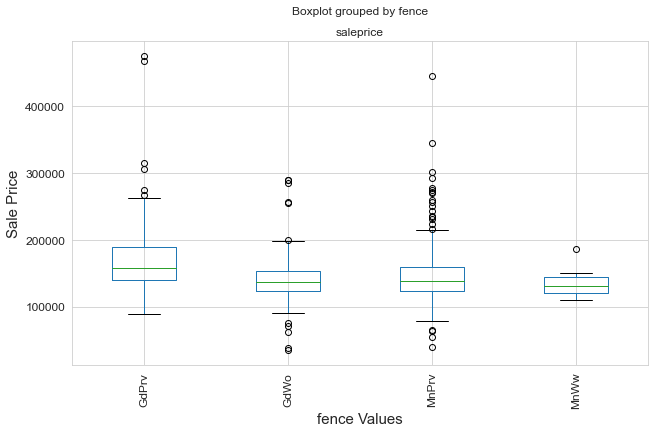

In [255]:
var_boxplot("fence")

In [256]:
train_set['fence'].unique()

array([nan, 'MnPrv', 'GdPrv', 'GdWo', 'MnWw'], dtype=object)

In [257]:
test_set['fence'].unique()

array([nan, 'MnPrv', 'GdPrv', 'GdWo', 'MnWw'], dtype=object)

In [258]:
train_set['fence'].value_counts()

MnPrv    226
GdPrv     83
GdWo      80
MnWw      10
Name: fence, dtype: int64

In [259]:
test_set['fence'].value_counts()

MnPrv    103
GdPrv     35
GdWo      32
MnWw       2
Name: fence, dtype: int64

In [260]:
train_set['fence'].isnull().value_counts()

True     1647
False     399
Name: fence, dtype: int64

In [261]:
test_set['fence'].isnull().value_counts()

True     707
False    172
Name: fence, dtype: int64

In [262]:
train_set[train_set["fence"].isnull()]

id        pid  ms_subclass ms_zoning  lot_area street lot_shape  \
0      109  533352170           60        RL     13517   Pave       IR1   
1      544  531379050           60        RL     11492   Pave       IR1   
2      153  535304180           20        RL      7922   Pave       Reg   
3      318  916386060           60        RL      9802   Pave       Reg   
4      255  906425045           50        RL     14235   Pave       IR1   
...    ...        ...          ...       ...       ...    ...       ...   
2046  1587  921126030           20        RL     11449   Pave       IR1   
2047   785  905377130           30        RL     12342   Pave       IR1   
2048   916  909253010           50        RL      7558   Pave       Reg   
2049   639  535179160           20        RL     10400   Pave       Reg   
2050    10  527162130           60        RL      7500   Pave       Reg   

     land_contour utilities lot_config land_slope neighborhood condition_1  \
0             Lvl    AllPub    CulDSac        Gtl       Sawyer        RRAe   
1             Lvl    AllPub    CulDSac        Gtl      SawyerW        Norm   
2             Lvl    AllPub     Inside        Gtl        NAmes        Norm   
3             Lvl    AllPub     Inside        Gtl       Timber        Norm   
4             Lvl    AllPub     Inside        Gtl      SawyerW        Norm   
...           ...       ...        ...        ...          ...         ...   
2046          HLS    AllPub     Inside        Gtl       Timber        Norm   
2047          Lvl    AllPub     Inside        Gtl      Edwards        Norm   
2048          Bnk    AllPub     Inside        Gtl      Crawfor        Norm   
2049          Lvl    AllPub     Corner        Gtl        NAmes        Norm   
2050          Lvl    AllPub     Inside        Gtl      Gilbert        Norm   

     condition_2 bldg_type house_style  overall_qual  overall_cond  \
0           Norm      1Fam      2Story             6             8   
1           Norm      1Fam      2Story             7             5   
2           Norm      1Fam      1Story             5             7   
3           Norm      1Fam      2Story             5             5   
4           Norm      1Fam      1.5Fin             6             8   
...          ...       ...         ...           ...           ...   
2046        Norm      1Fam      1Story             8             5   
2047        Norm      1Fam      1Story             4             5   
2048        Norm      1Fam      1.5Fin             6             6   
2049        Norm      1Fam      1Story             4             5   
2050        Norm      1Fam      2Story             7             5   

      year_built  year_remod/add roof_style roof_matl exterior_1st  \
0           1976            2005      Gable   CompShg      HdBoard   
1           1996            1997      Gable   CompShg      VinylSd   
2           1953            2007      Gable   CompShg      VinylSd   
3           2006            2007      Gable   CompShg      VinylSd   
4           1900            1993      Gable   CompShg      Wd Sdng   
...          ...             ...        ...       ...          ...   
2046        2007            2007      Gable   CompShg      VinylSd   
2047        1940            1950      Gable   CompShg      VinylSd   
2048        1928            1950      Gable   CompShg      BrkFace   
2049        1956            1956      Gable   CompShg      Plywood   
2050        1999            1999      Gable   CompShg      VinylSd   

     exterior_2nd mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation  \
0         Plywood      BrkFace         289.0         Gd         TA     CBlock   
1         VinylSd      BrkFace         132.0         Gd         TA      PConc   
2         VinylSd         None           0.0         TA         Gd     CBlock   
3         VinylSd         None           0.0         TA         TA      PConc   
4         Plywood         None           0.0         TA         TA      PConc   
..

In [263]:
test_set[test_set["fence"].isnull()]

id        pid  ms_subclass ms_zoning  lot_area street lot_shape  \
0    2658  902301120          190        RM      9142   Pave       Reg   
1    2718  905108090           90        RL      9662   Pave       IR1   
2    2414  528218130           60        RL     17104   Pave       IR1   
3    1989  902207150           30        RM      8520   Pave       Reg   
4     625  535105100           20        RL      9500   Pave       IR1   
..    ...        ...          ...       ...       ...    ...       ...   
871  1746  528231010           20        RL     14572   Pave       IR3   
872   368  527254020           20        RL     11844   Pave       IR1   
873  2806  907401050           20        RL      8810   Pave       Reg   
874  1662  527377110           60        RL      8000   Pave       Reg   
876  1373  904100040           20        RL      8250   Pave       Reg   

    land_contour utilities lot_config land_slope neighborhood condition_1  \
0            Lvl    AllPub     Inside        Gtl      OldTown        Norm   
1            Lvl    AllPub     Inside        Gtl       Sawyer        Norm   
2            Lvl    AllPub     Inside        Gtl      Gilbert        Norm   
3            Lvl    AllPub     Inside        Gtl      OldTown        Norm   
4            Lvl    AllPub     Inside        Gtl        NAmes        Norm   
..           ...       ...        ...        ...          ...         ...   
871          Lvl    AllPub     Corner        Gtl      Gilbert        Norm   
872          Lvl    AllPub     Inside        Gtl      StoneBr        Norm   
873          Lvl    AllPub     Inside        Gtl      CollgCr        Norm   
874          Lvl    AllPub     Inside        Gtl       NWAmes        PosN   
876          Lvl    AllPub     Inside        Gtl       Sawyer       Feedr   

    condition_2 bldg_type house_style  overall_qual  overall_cond  year_built  \
0          Norm    2fmCon      2Story             6             8        1910   
1          Norm    Duplex      1Story             5             4        1977   
2          Norm      1Fam      2Story             7             5        2006   
3          Norm      1Fam      1Story             5             6        1923   
4          Norm      1Fam      1Story             6             5        1963   
..          ...       ...         ...           ...           ...         ...   
871        Norm      1Fam      1Story             7             5        2004   
872        Norm      1Fam      1Story             8             5        2008   
873        Norm      1Fam      1Story             7             5        2003   
874        Norm      1Fam      2Story             6             6        1974   
876        Norm      1Fam      1Story             5             5        1968   

     year_remod/add roof_style roof_matl exterior_1st exterior_2nd  \
0              1950      Gable   CompShg      AsbShng      AsbShng   
1              1977      Gable   CompShg      Plywood      Plywood   
2              2006      Gable   CompShg      VinylSd      VinylSd   
3              2006      Gable   CompShg      Wd Sdng      Wd Sdng   
4              1963      Gable   CompShg      Plywood      Plywood   
..              ...        ...       ...          ...          ...   
871            2004        Hip   CompShg      VinylSd      VinylSd   
872            2008        Hip   CompShg      VinylSd      VinylSd   
873            2003      Gable   CompShg      VinylSd      VinylSd   
874            1974      Gable   CompShg      HdBoard      HdBoard   
876            1968        Hip   CompShg      HdBoard      HdBoard   

    mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation bsmt_qual  \
0           None           0.0         TA         Fa      Stone        Fa   
1           None           0.0         TA         TA     CBlock        Gd   
2           None           0.0         Gd         TA      PConc        Gd   
3           None           0.0         Gd         TA     CBlock        

In [264]:
# replace nulls to None
train_set['fence'] = train_set['fence'].map(lambda cell: "None" if pd.isnull(cell) else cell)
test_set['fence'] = test_set['fence'].map(lambda cell: "None" if pd.isnull(cell) else cell)

## <font color='green'>misc_feature: Miscellaneous feature not covered in other categories</font>

#### <font color='green'>Train & Test sets have close to 97% null</font>
#### <font color='green'>We can replace null with NA, which matches row where misc_val = 0</font>

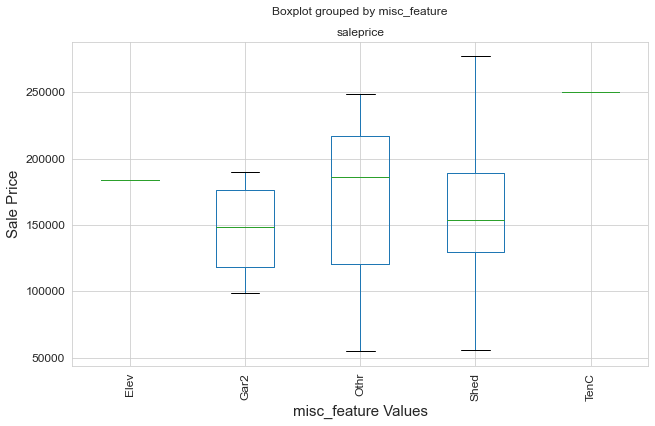

In [265]:
var_boxplot("misc_feature")

In [266]:
train_set['misc_feature'].unique()

array([nan, 'Shed', 'TenC', 'Gar2', 'Othr', 'Elev'], dtype=object)

In [267]:
test_set['misc_feature'].unique()

array([nan, 'Shed', 'Othr', 'Gar2'], dtype=object)

In [268]:
train_set['misc_feature'].value_counts()

Shed    56
Gar2     4
Othr     3
Elev     1
TenC     1
Name: misc_feature, dtype: int64

In [269]:
test_set['misc_feature'].value_counts()

Shed    39
Othr     1
Gar2     1
Name: misc_feature, dtype: int64

In [270]:
train_set['misc_feature'].isnull().value_counts()

True     1981
False      65
Name: misc_feature, dtype: int64

In [271]:
test_set['misc_feature'].isnull().value_counts()

True     838
False     41
Name: misc_feature, dtype: int64

In [272]:
train_set[train_set["misc_feature"].isnull()]

id        pid  ms_subclass ms_zoning  lot_area street lot_shape  \
0      109  533352170           60        RL     13517   Pave       IR1   
1      544  531379050           60        RL     11492   Pave       IR1   
2      153  535304180           20        RL      7922   Pave       Reg   
3      318  916386060           60        RL      9802   Pave       Reg   
4      255  906425045           50        RL     14235   Pave       IR1   
...    ...        ...          ...       ...       ...    ...       ...   
2046  1587  921126030           20        RL     11449   Pave       IR1   
2047   785  905377130           30        RL     12342   Pave       IR1   
2048   916  909253010           50        RL      7558   Pave       Reg   
2049   639  535179160           20        RL     10400   Pave       Reg   
2050    10  527162130           60        RL      7500   Pave       Reg   

     land_contour utilities lot_config land_slope neighborhood condition_1  \
0             Lvl    AllPub    CulDSac        Gtl       Sawyer        RRAe   
1             Lvl    AllPub    CulDSac        Gtl      SawyerW        Norm   
2             Lvl    AllPub     Inside        Gtl        NAmes        Norm   
3             Lvl    AllPub     Inside        Gtl       Timber        Norm   
4             Lvl    AllPub     Inside        Gtl      SawyerW        Norm   
...           ...       ...        ...        ...          ...         ...   
2046          HLS    AllPub     Inside        Gtl       Timber        Norm   
2047          Lvl    AllPub     Inside        Gtl      Edwards        Norm   
2048          Bnk    AllPub     Inside        Gtl      Crawfor        Norm   
2049          Lvl    AllPub     Corner        Gtl        NAmes        Norm   
2050          Lvl    AllPub     Inside        Gtl      Gilbert        Norm   

     condition_2 bldg_type house_style  overall_qual  overall_cond  \
0           Norm      1Fam      2Story             6             8   
1           Norm      1Fam      2Story             7             5   
2           Norm      1Fam      1Story             5             7   
3           Norm      1Fam      2Story             5             5   
4           Norm      1Fam      1.5Fin             6             8   
...          ...       ...         ...           ...           ...   
2046        Norm      1Fam      1Story             8             5   
2047        Norm      1Fam      1Story             4             5   
2048        Norm      1Fam      1.5Fin             6             6   
2049        Norm      1Fam      1Story             4             5   
2050        Norm      1Fam      2Story             7             5   

      year_built  year_remod/add roof_style roof_matl exterior_1st  \
0           1976            2005      Gable   CompShg      HdBoard   
1           1996            1997      Gable   CompShg      VinylSd   
2           1953            2007      Gable   CompShg      VinylSd   
3           2006            2007      Gable   CompShg      VinylSd   
4           1900            1993      Gable   CompShg      Wd Sdng   
...          ...             ...        ...       ...          ...   
2046        2007            2007      Gable   CompShg      VinylSd   
2047        1940            1950      Gable   CompShg      VinylSd   
2048        1928            1950      Gable   CompShg      BrkFace   
2049        1956            1956      Gable   CompShg      Plywood   
2050        1999            1999      Gable   CompShg      VinylSd   

     exterior_2nd mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation  \
0         Plywood      BrkFace         289.0         Gd         TA     CBlock   
1         VinylSd      BrkFace         132.0         Gd         TA      PConc   
2         VinylSd         None           0.0         TA         Gd     CBlock   
3         VinylSd         None           0.0         TA         TA      PConc   
4         Plywood         None           0.0         TA         TA      PConc   
..

In [273]:
test_set[test_set["misc_feature"].isnull()]

id        pid  ms_subclass ms_zoning  lot_area street lot_shape  \
0    2658  902301120          190        RM      9142   Pave       Reg   
1    2718  905108090           90        RL      9662   Pave       IR1   
2    2414  528218130           60        RL     17104   Pave       IR1   
3    1989  902207150           30        RM      8520   Pave       Reg   
4     625  535105100           20        RL      9500   Pave       IR1   
..    ...        ...          ...       ...       ...    ...       ...   
874  1662  527377110           60        RL      8000   Pave       Reg   
875  1234  535126140           60        RL     14670   Pave       Reg   
876  1373  904100040           20        RL      8250   Pave       Reg   
877  1672  527425140           20        RL      9000   Pave       Reg   
878  1939  535327160           20        RL      8400   Pave       Reg   

    land_contour utilities lot_config land_slope neighborhood condition_1  \
0            Lvl    AllPub     Inside        Gtl      OldTown        Norm   
1            Lvl    AllPub     Inside        Gtl       Sawyer        Norm   
2            Lvl    AllPub     Inside        Gtl      Gilbert        Norm   
3            Lvl    AllPub     Inside        Gtl      OldTown        Norm   
4            Lvl    AllPub     Inside        Gtl        NAmes        Norm   
..           ...       ...        ...        ...          ...         ...   
874          Lvl    AllPub     Inside        Gtl       NWAmes        PosN   
875          Lvl    AllPub     Inside        Gtl        NAmes        Norm   
876          Lvl    AllPub     Inside        Gtl       Sawyer       Feedr   
877          Lvl    AllPub        FR2        Gtl        NAmes        Norm   
878          Lvl    AllPub     Corner        Gtl        NAmes        Norm   

    condition_2 bldg_type house_style  overall_qual  overall_cond  year_built  \
0          Norm    2fmCon      2Story             6             8        1910   
1          Norm    Duplex      1Story             5             4        1977   
2          Norm      1Fam      2Story             7             5        2006   
3          Norm      1Fam      1Story             5             6        1923   
4          Norm      1Fam      1Story             6             5        1963   
..          ...       ...         ...           ...           ...         ...   
874        Norm      1Fam      2Story             6             6        1974   
875        Norm      1Fam      2Story             6             7        1966   
876        Norm      1Fam      1Story             5             5        1968   
877        Norm      1Fam      1Story             4             6        1971   
878        Norm      1Fam      1Story             5             5        1955   

     year_remod/add roof_style roof_matl exterior_1st exterior_2nd  \
0              1950      Gable   CompShg      AsbShng      AsbShng   
1              1977      Gable   CompShg      Plywood      Plywood   
2              2006      Gable   CompShg      VinylSd      VinylSd   
3              2006      Gable   CompShg      Wd Sdng      Wd Sdng   
4              1963      Gable   CompShg      Plywood      Plywood   
..              ...        ...       ...          ...          ...   
874            1974      Gable   CompShg      HdBoard      HdBoard   
875            1999      Gable   CompShg      VinylSd      VinylSd   
876            1968        Hip   CompShg      HdBoard      HdBoard   
877            1971      Gable   CompShg      HdBoard      HdBoard   
878            1955      Gable   CompShg      MetalSd      MetalSd   

    mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation bsmt_qual  \
0           None           0.0         TA         Fa      Stone        Fa   
1           None           0.0         TA         TA     CBlock        Gd   
2           None           0.0         Gd         TA      PConc        Gd   
3           None           0.0         Gd         TA     CBlock        

In [274]:
# replace nulls to None
train_set['misc_feature'] = train_set['misc_feature'].map(lambda cell: "None" if pd.isnull(cell) else cell)
test_set['misc_feature'] = test_set['misc_feature'].map(lambda cell: "None" if pd.isnull(cell) else cell)

# <font color='green'>Sanity Check</font>

In [275]:
train_set.isnull().sum().max()

0

In [276]:
test_set.isnull().sum().max()

0

## <font color='green'>Summary of data handling</font>

|Column|Type|Description|Distribution|Correlation to Sale Price|Null Handling %|Outlier Handling %%|Feature Handling|
|---|---|---|---|---|---|---|---|
|Id|int|Property Id|random|None|||exclude from model features|
|pid|int|Parcel identification number|con't, nominal|None|||exclude from model features|
|ms_subclass|int|Identifies the type of dwelling involved in the sale|discrete, nominal|Higher price for newer||||
|ms_zoning|object|Identifies the general zoning classification of the sale|nominal|Higher price for some zones||||
|lot_frontage|float|Linear feet of street connected to property|con't, Normal|+ve|insufficient domain knowledge to conduct null imputation||exclude from model features|
|lot_area|int|Lot size in square feet|con't, right skewed|+ve||||
|street|object|Type of road access to property|nominal|higher price for paved||||
|alley|object|Type of alley access to property|nominal|higher price for paved|insufficient domain knowledge to conduct null imputation||exclude from model features|
|lot_shape|object|General shape of property|ordinal|none||||
|land_contour|object|Flatness of the property|nominal|Higher price for some cat||||
|utilities|object|Type of utilities available|ordinal|Higher price for some cat||||
|lot_config|object|Lot configuration|nominal|None||||
|land_slope|object|Slope of property|ordinal|None||||
|neighborhood|object|Physical locations within Ames city limits|nominal|Higher prices for some cat||||
|condition_1|object|Proximity to various conditions|nominal|Higher prices for some cat||||
|condition_2|object|Proximity to various conditions (if more than one is present)|nominal|Higher prices for some cat||||
|bldg_type|object|Type of dwelling|nominal|Higher prices for some cat||||
|house_style|object|Style of dwelling|nominal|Higher prices for some cat||||
|overall_qual|int|Rates the overall material and finish of the house|discrete, ordinal|+ve||||
|overall_cond|int|Rates the overall condition of the house|discrete, ordinal|weak +ve||||
|year_built|int|Original construction date|discrete, left skewed|+ve||||
|year_remod/add|int|Remodel date (same as construction date if no remodeling or additions)|discrete, left/right skewed|+ve||||
|roof_style|object|Type of roof|nominal|Higher prices for some cat||||
|roof_matl|object|Roof material|nominal|Higher prices for some cat||||
|exterior_1st|object|Exterior covering on house|nominal|Higher prices for some cat||||
|exterior_2nd|object|Exterior covering on house (if more than one material)|nominal|Higher prices for some cat||||
|mas_vnr_type|object|Masonry veneer type|nominal|Higher prices for some cat|Null to None|||
|mas_vnr_area|float|Masonry veneer area in square feet|con't, many Zeros for none|+ve|Null to 0|||
|exter_qual|object|Evaluates the quality of the material on the exterior|ordinal|Higher prices for some cat||||
|exter_cond|object|Evaluates the present condition of the material on the exterior|ordinal|Higher prices for some cat||||
|foundation|object|Type of foundation|nominal|Higher prices for some cat||||
|bsmt_qual|object|Evaluates the height of the basement|ordinal|Higher prices for some cat|Null to NA|||
|bsmt_cond|object|Evaluates the general condition of the basement|ordinal|Higher prices for some cat|Null to NA|||
|bsmt_exposure|object|Refers to walkout or garden level walls|ordinal|Higher prices for some cat|Null to NA|||
|bsmtfin_type_1|object|Rating of basement finished area|ordinal|Higher prices for some cat|Null to NA|||
|bsmtfin_sf_1|float, int|Type 1 finished square feet|con't, many Zeros for none|+ve|Null to 0|||
|bsmtfin_type_2|object|Rating of basement finished area (if multiple types)|ordinal|Higher prices for some cat|Null to NA|||
|bsmtfin_sf_2|float, int|Type 2 finished square feet|con't, many Zeros for none|weak +ve|Null to 0|||
|bsmt_unf_sf|float, int|Unfinished square feet of basement area|con't, right skewed|weak +ve|Null to 0|||
|total_bsmt_sf|float, int|Total square feet of basement area|con't, normal|+ve|Null to 0|||
|heating|object|Type of heating|nominal|Higher prices for some cat||||
|heating_qc|object|Heating quality and condition|ordinal|Higher prices for some cat||||
|central_air|object|Central air conditioning|nominal|Higher prices for some cat||||
|electrical|object|Electrical system|ordinal|Higher prices for some cat|delete Null row|||
|1st_flr_sf|int|First Floor square feet|con't, normal|+ve||||
|2nd_flr_sf|int|Second floor square feet|con't, many zeros|+ve||||
|low_qual_fin_sf|int|Low quality finished square feet (all floors)|con't, many zeros|weak +ve||||
|gr_liv_area|int|Above grade (ground) living area square feet|con't, normal|+ve||||
|bsmt_full_bath|float, int|Basement full bathrooms|discrete, ordinal|Higher prices for some cat|Null to 0|||
|bsmt_half_bath|float, int|Basement half bathrooms|discrete, ordinal|Higher prices for some cat|Null to 0|||
|full_bath|int|Full bathrooms above grade|discrete, ordinal|Higher prices for some cat||||
|half_bath|int|Half baths above grade|discrete, ordinal|Higher prices for some cat||||
|bedroom_abvgr|int|Bedrooms above grade (does NOT include basement bedrooms)|discrete, ordinal|Higher prices for some cat||||
|kitchen_abvgr|int|Kitchens above grade|discrete, ordinal|Higher prices for some cat||||
|kitchen_qual|object|Kitchen quality|ordinal|Higher prices for some cat||||
|totrms_abvgrd|int|Total rooms above grade (does not include bathrooms)|discrete, ordinal|Higher prices for some cat||||
|functional|object|Home functionality (Assume typical unless deductions are warranted)|ordinal|Higher prices for some cat||||
|fireplaces|int|Number of fireplaces|discrete, ordinal|Higher prices for some cat||||
|fireplace_qu|object|Fireplace quality|ordinal|Higher prices for some cat|Null to NA|||
|garage_type|object|Garage location|nominal|Higher prices for some cat|Null to NA|||
|garage_yr_blt|float|Year garage was built|discrete, ordinal|Higher prices for some cat|Null to 0|||
|garage_finish|object|Interior finish of the garage|ordinal|Higher prices for some cat|Null to NA|||
|garage_cars|float, int|Size of garage in car capacity|discrete, ordinal|Higher prices for some cat|Null to 0|||
|garage_area|float, int|Size of garage in square feet|con't, normal|+ve|Null to 0|||
|garage_qual|object|Garage quality|ordinal|Higher prices for some cat|Null to NA|||
|garage_cond|object|Garage condition|ordinal|Higher prices for some cat|Null to NA|||
|paved_drive|object|Paved driveway|ordinal|Higher prices for some cat||||
|wood_deck_sf|int|Wood deck area in square feet|con't, normal|+ve||||
|open_porch_sf|int|Open porch area in square feet|con't, normal|+ve||||
|enclosed_porch|int|Enclosed porch area in square feet|con't, normal|+ve||||
|3ssn_porch|int|Three season porch area in square feet|con't, normal|weak +ve||||
|screen_porch|int|Screen porch area in square feet|con't, normal|weak +ve||||
|pool_area|int|Pool area in square feet|con't, many zeros|weak +ve||||
|pool_qc|object|Pool quality|ordinal|Higher prices for some cat|Null to NA|||
|fence|object|Fence quality|ordinal|Higher prices for some cat|Null to NA|||
|misc_feature|object|Miscellaneous feature not covered in other categories|nominal|Higher prices for some cat|Null to NA|||
|misc_val|int|$Value of miscellaneous feature|con't, many zeros|weak +ve||||
|mo_sold|int|Month Sold (MM)|discrete, uniform|||||
|yr_sold|int|Year Sold (YYYY)|discrete, uniform|||||
|sale_type|object|Type of sale|nominal|Higher prices for some cat||||
|saleprice|int|Sale price $$|con't, normal|||||

% Blank indicates no null values<br>
%% Blank indicates no outliers values

# <font color='green'>Export No Null datasets</font> 

In [277]:
# Export partially cleaned train and test sets to data folder
train_set.to_csv('../datasets/Output Data/train_noNull.csv', index=False)
test_set.to_csv('../datasets/Output Data/test_noNull.csv', index=False)